# Project 04-04: Kmeans Clustering
*by Thorge Dobbertin, Julia Köberle, Marilena Wittmaack und Benedict Wolf*


In [6]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import sklearn.cluster as sk

## WWDK Package

We created a Package divided into three modules. The first module *Data* preprocesses our data to make clustering easier. The next module *Cluster* allows to choose a clustering method to cluster the data. The third module *Utilities* contains useful functions to present the data and compare our Clustering methods against the sklearn implementations

In [2]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import utilities as u

## Kmeans

The Kmeans class uses the sklearn estimators and contains the following methods:

In [ ]:
Kmeans(inits=10, k=8, maxit=300, method="++", tol = 1e-3)

##### inits : int, optional, default:10
Number of random initializations that are tried. (Each time new initial centroids are picked and in the end the result with the lowest inertia is picked)
##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### maxit : int, optional, default:300
Maximal amount of iterations to move the centroids to their new barycentre.
##### method : {‘++’ or ‘rng’}, default: ‘++’
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: choose x points at random from data for the initial centroids.
##### tol : float, optional, default:1e-3
Control early stopping based on the difference between the old and new centroids' positions. 


In [ ]:
Kmeans.fit(data)

Fits the data into k clusters, returns:

cluster_centers_ = centroids

labels_ = assignments to centroids

inertia_ = best_clust

In [ ]:
Kmeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

In [ ]:
Kmeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

## Minibatch Kmeans

Different to Kmeans, MiniBatchKMeans uses not all data points at once to cluster the data, but uses randomly chosen batches from data.
The MiniBatchKMeans class contains the following methods:

In [ ]:
MiniBatchKMeans(k=8, inits=10, max_iterations=300, tol=1e-3, batch_size=100, method = "++")

##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### inits : int, optional, default:10
Not included to increase speed.
##### max_iterations : int, optional, default:300
Maximal amount of iterations from creation of a minibatch to moving the centroids to new position.
##### tol : float, optional, default:1e-3
Control early stopping based on the difference between the old and new centroids' positions. 
##### batch_size : int, optional, default:100
Size of the mini batches. 
  
**method : {‘++’ or ‘rng’}, default: ‘++’**  
  
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: choose x points at random from data for the initial centroids.

In [ ]:
MiniBatchKMeans.create_batch(data)

Chooses random points from data.

In [ ]:
MiniBatchKMeans.initialize(data)

Sets centroid points from data randomly(‘rng’) or with k++ method (‘++’).

In [ ]:
MiniBatchKMeans.expectation(data, centroids)

Measures the euclidean distance between each point of data and each centroid.

In [ ]:
MiniBatchKMeans.maximization(data, assignments, centroids, centroid_count)

Assigns datapoints to centroids and counts the assigned points to calculate a learning rate. The centroids are moved to newly determined centroids according to learning rate.

In [ ]:
MiniBatchKMeans.final_assignments(data, centroids)

Assigns all datapoints of data to centroids.

In [ ]:
MiniBatchKMeans.fit(data)

Fits the data into k clusters, using the methods explained before. Returns:

labels_ = assignments to centroids

cluster_centers_ = centroids

In [ ]:
MiniBatchKMeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

In [ ]:
MiniBatchKMeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

## WWDK vs sklearn

First we have a look at a random training data set. The 8 cluster are already clearly visible in this case.
We use this data to compare our algorithm (WWDK) and the sklearn implementation.

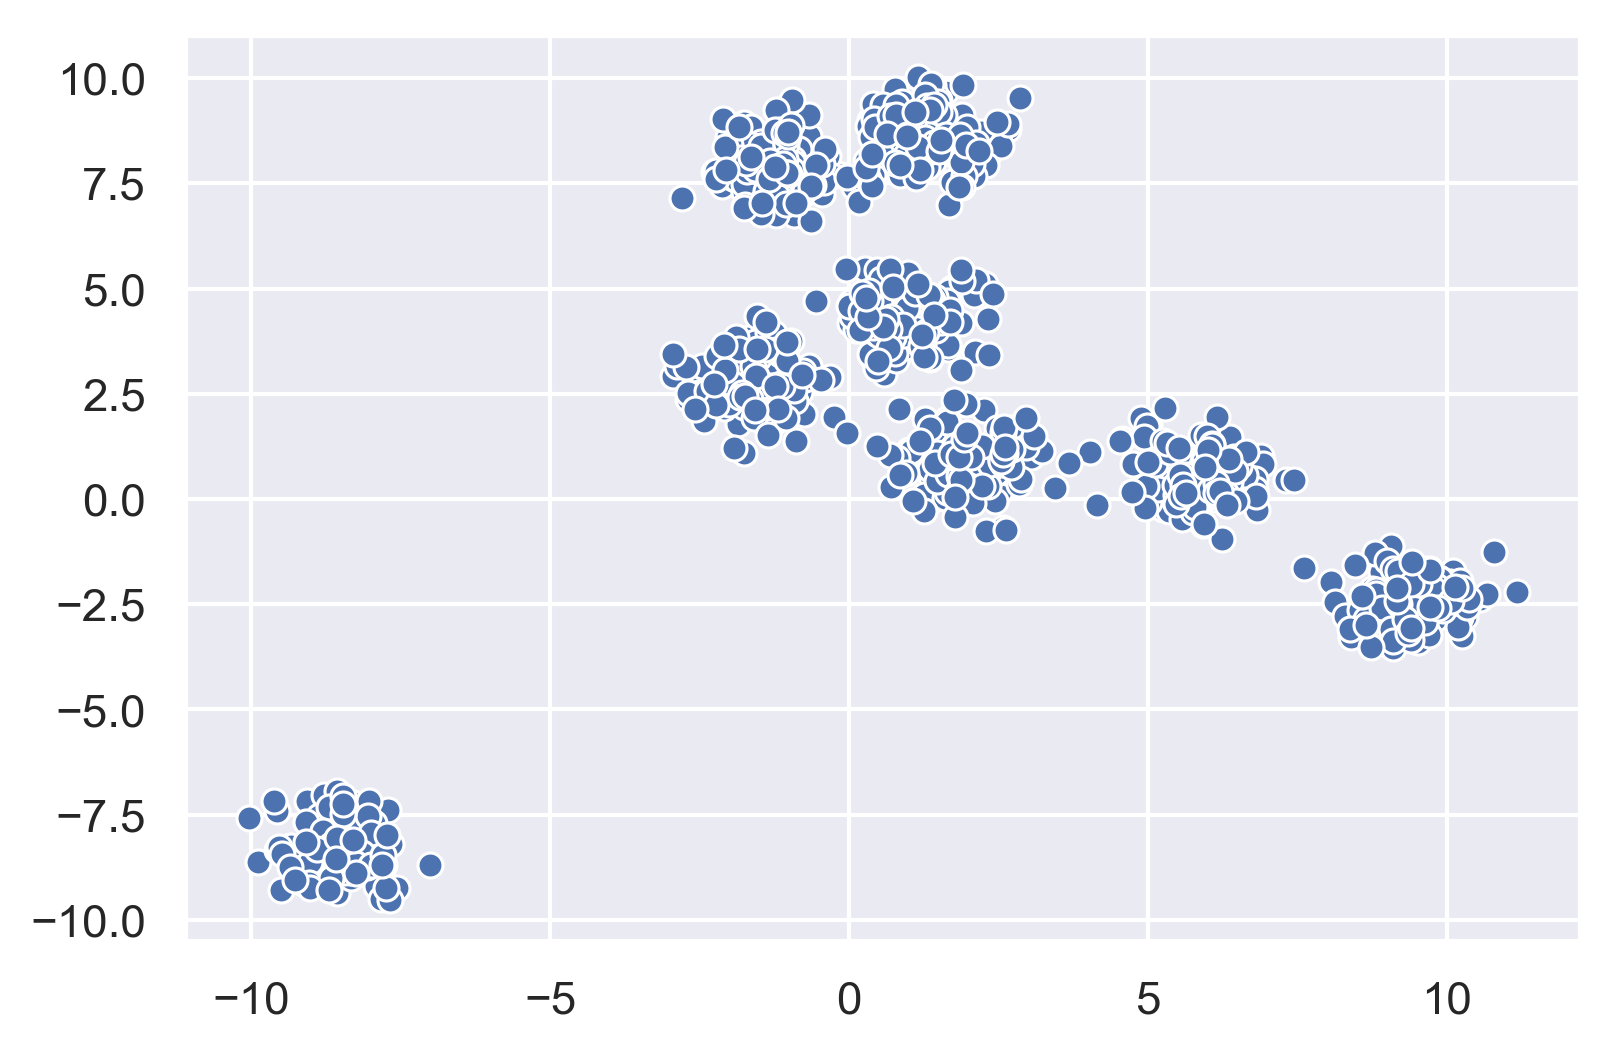

In [7]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X[:, 0], X[:, 1]);

Looking at an elbow plot, its difficult to determine the best number of centroids k. The global distribution of the data is challenging as some clusters are really close together and we have an outlier. 

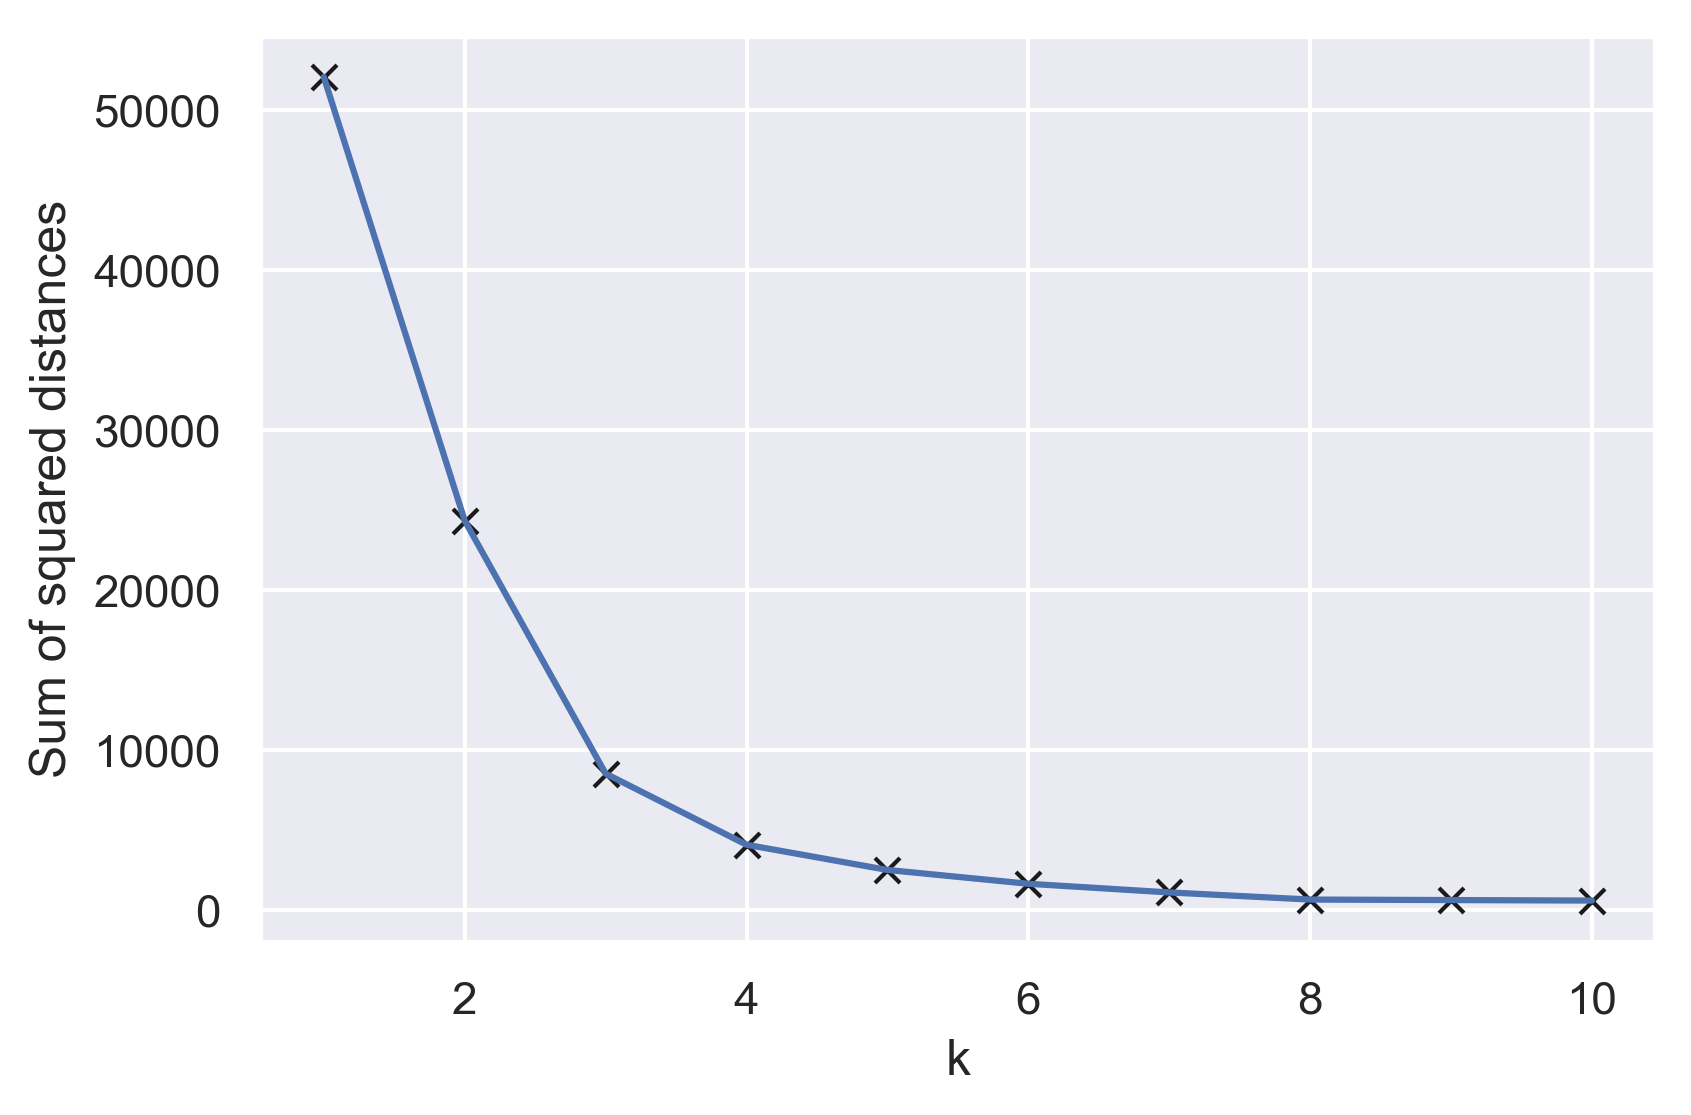

In [8]:
u.elbow_plot(X, max_k=10) 

#uses our WWDK vanilla code with set parameters to calculate the inertia

As we know what to expect, we choose the number of clusters k=8. 

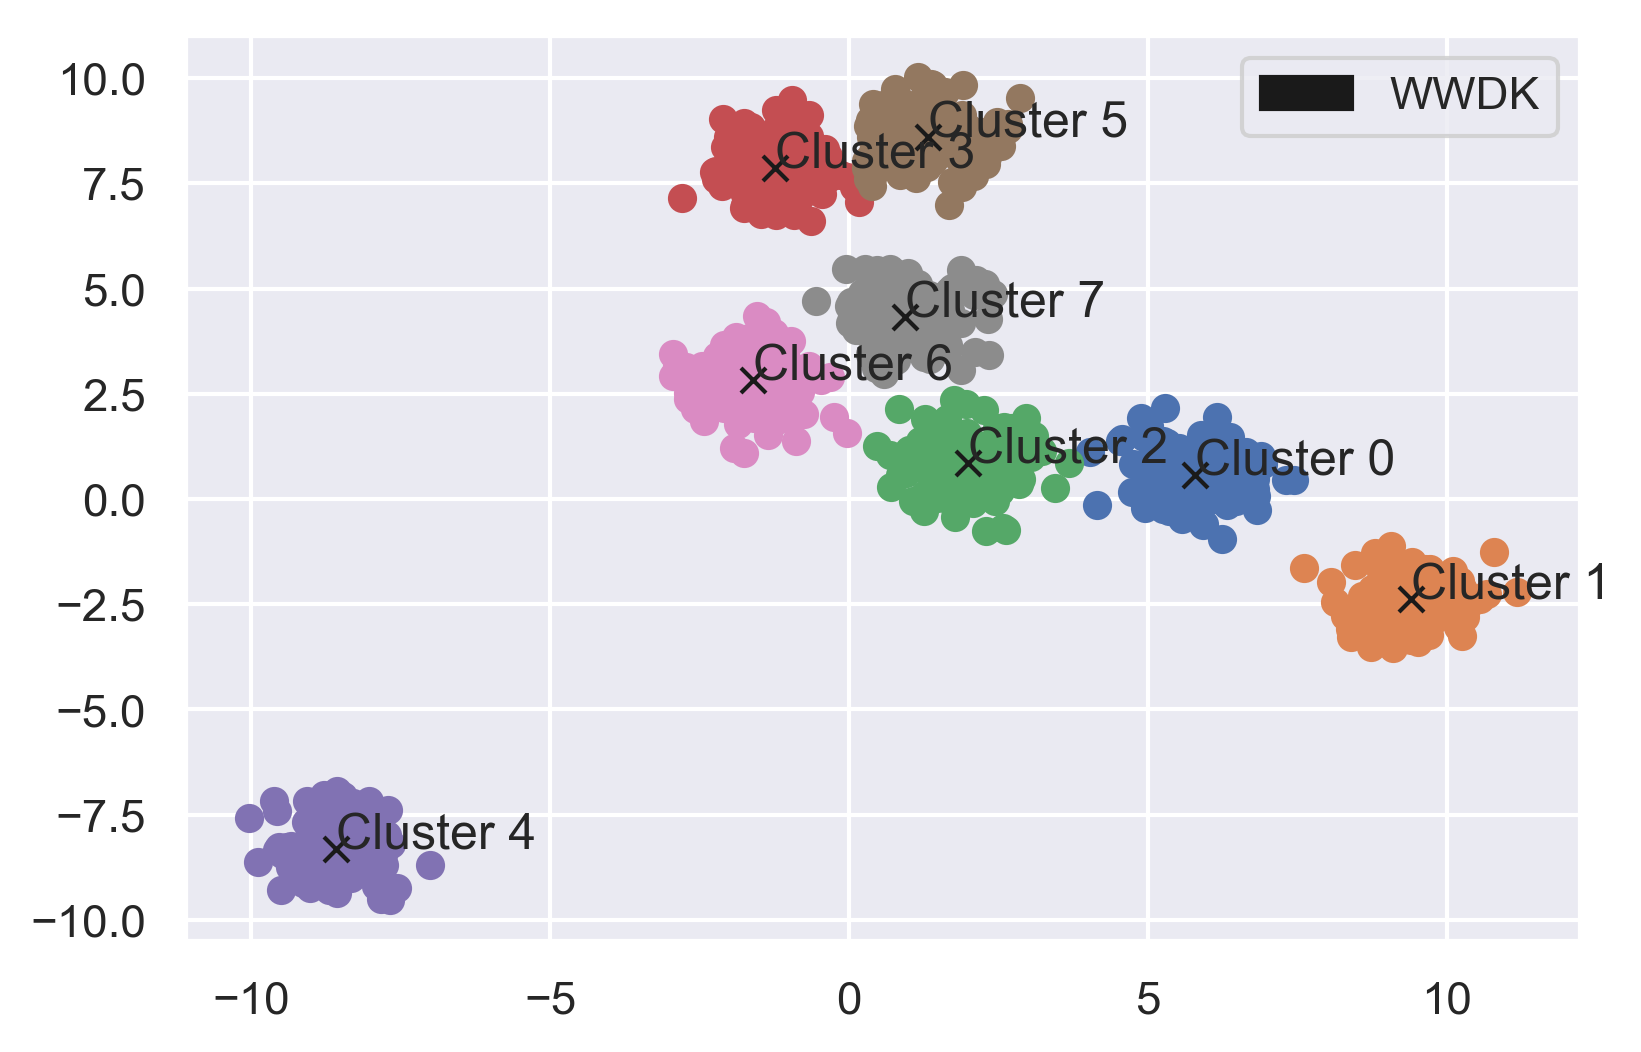

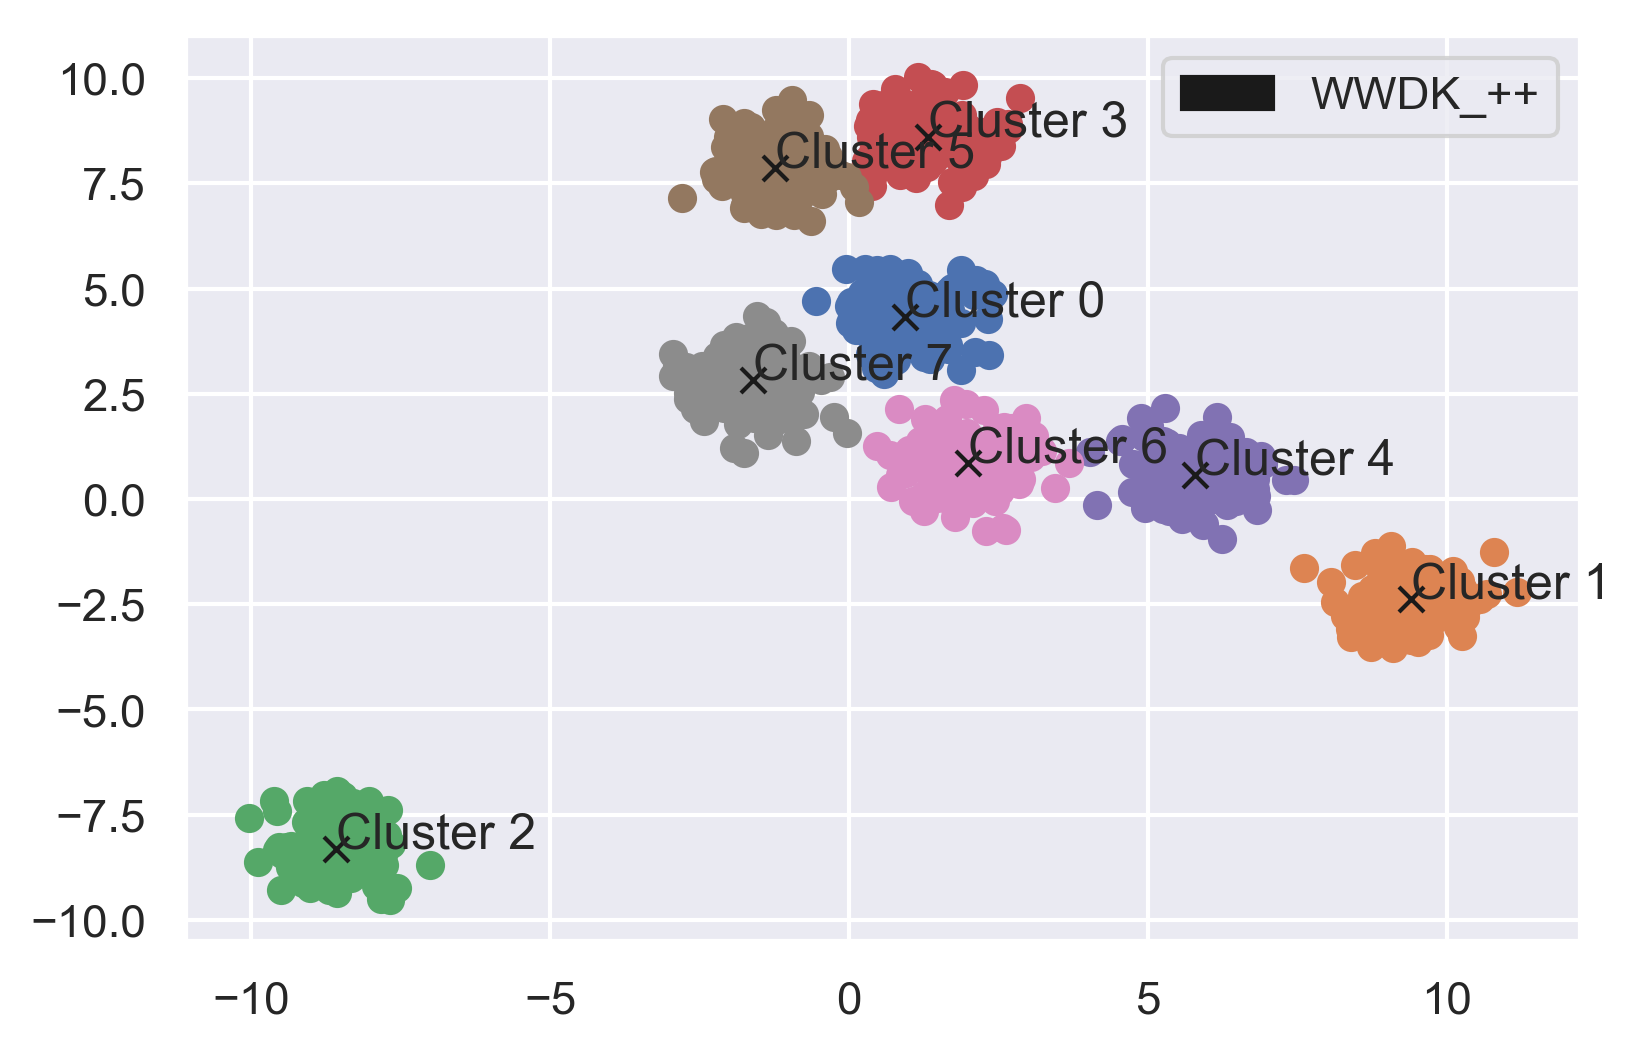

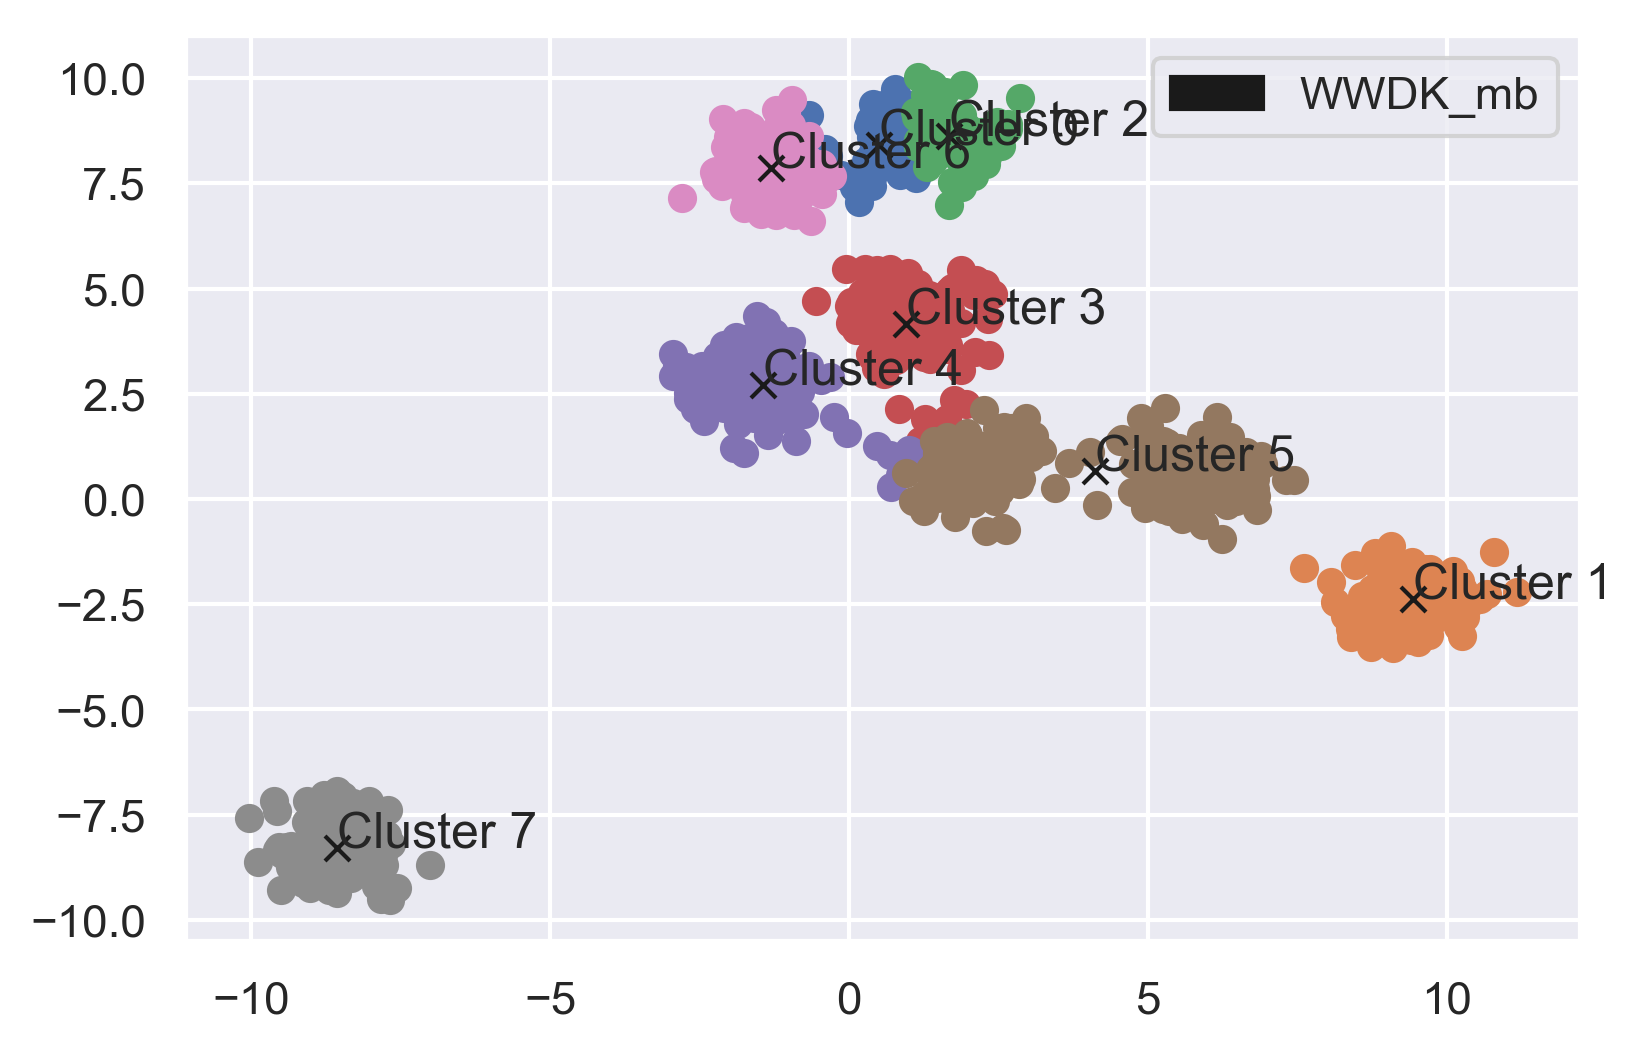

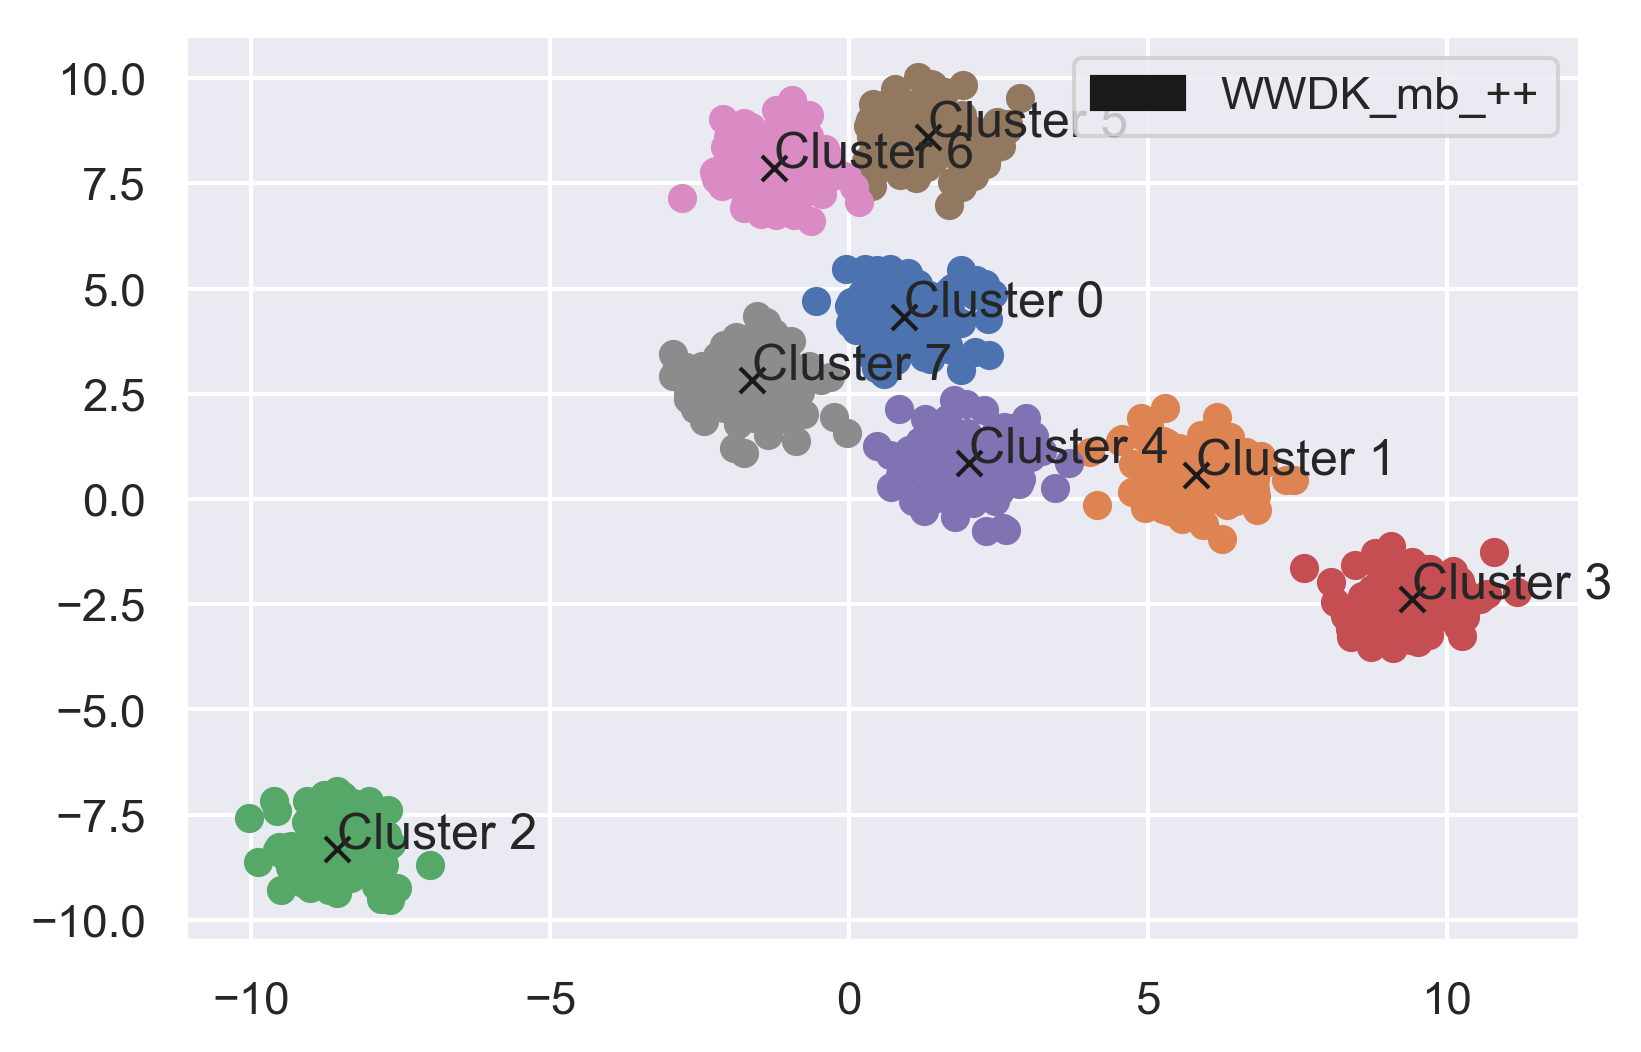

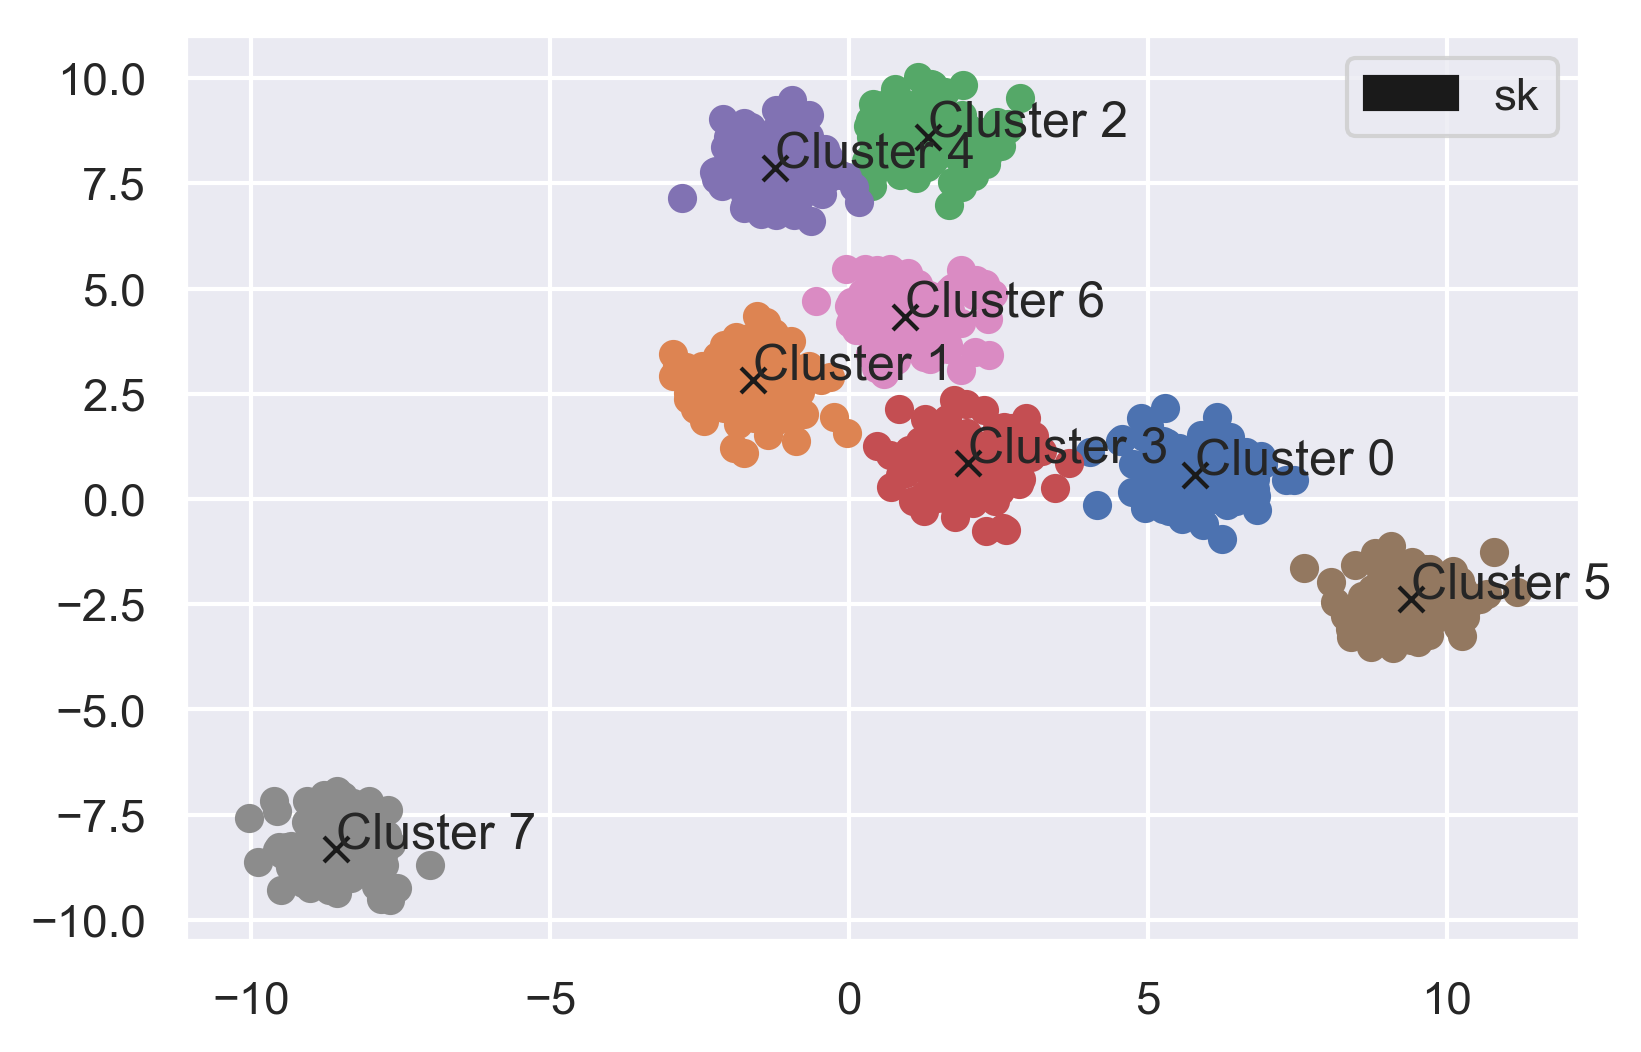

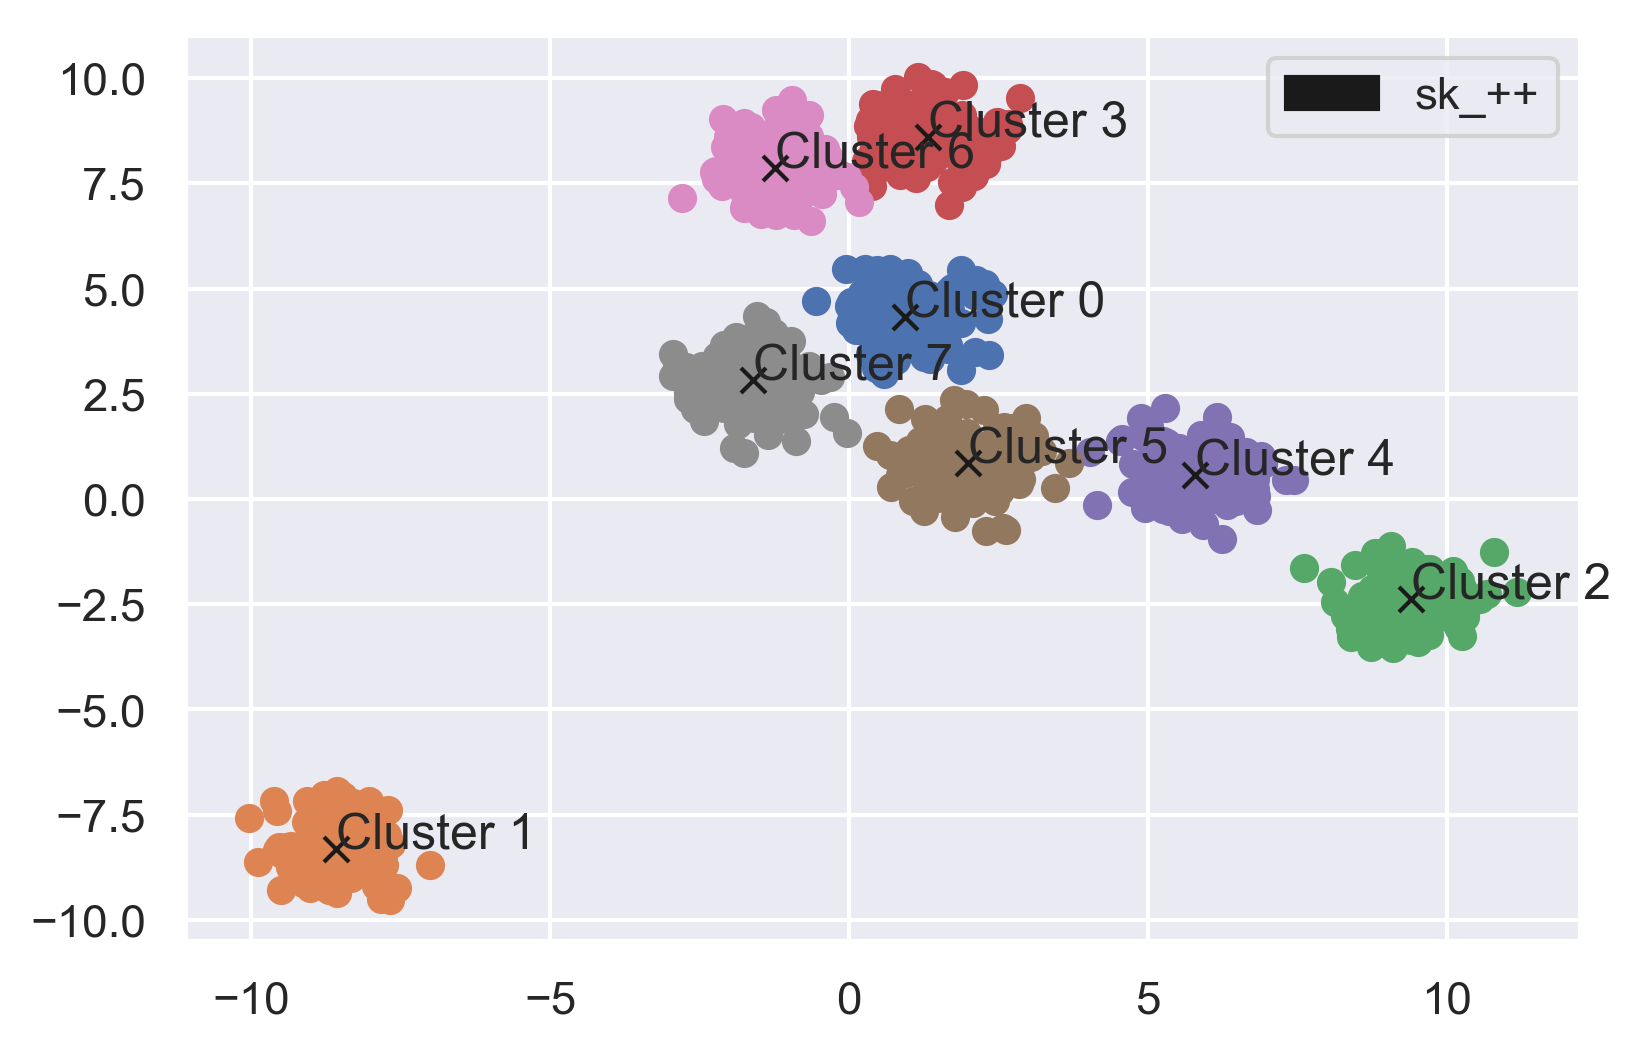

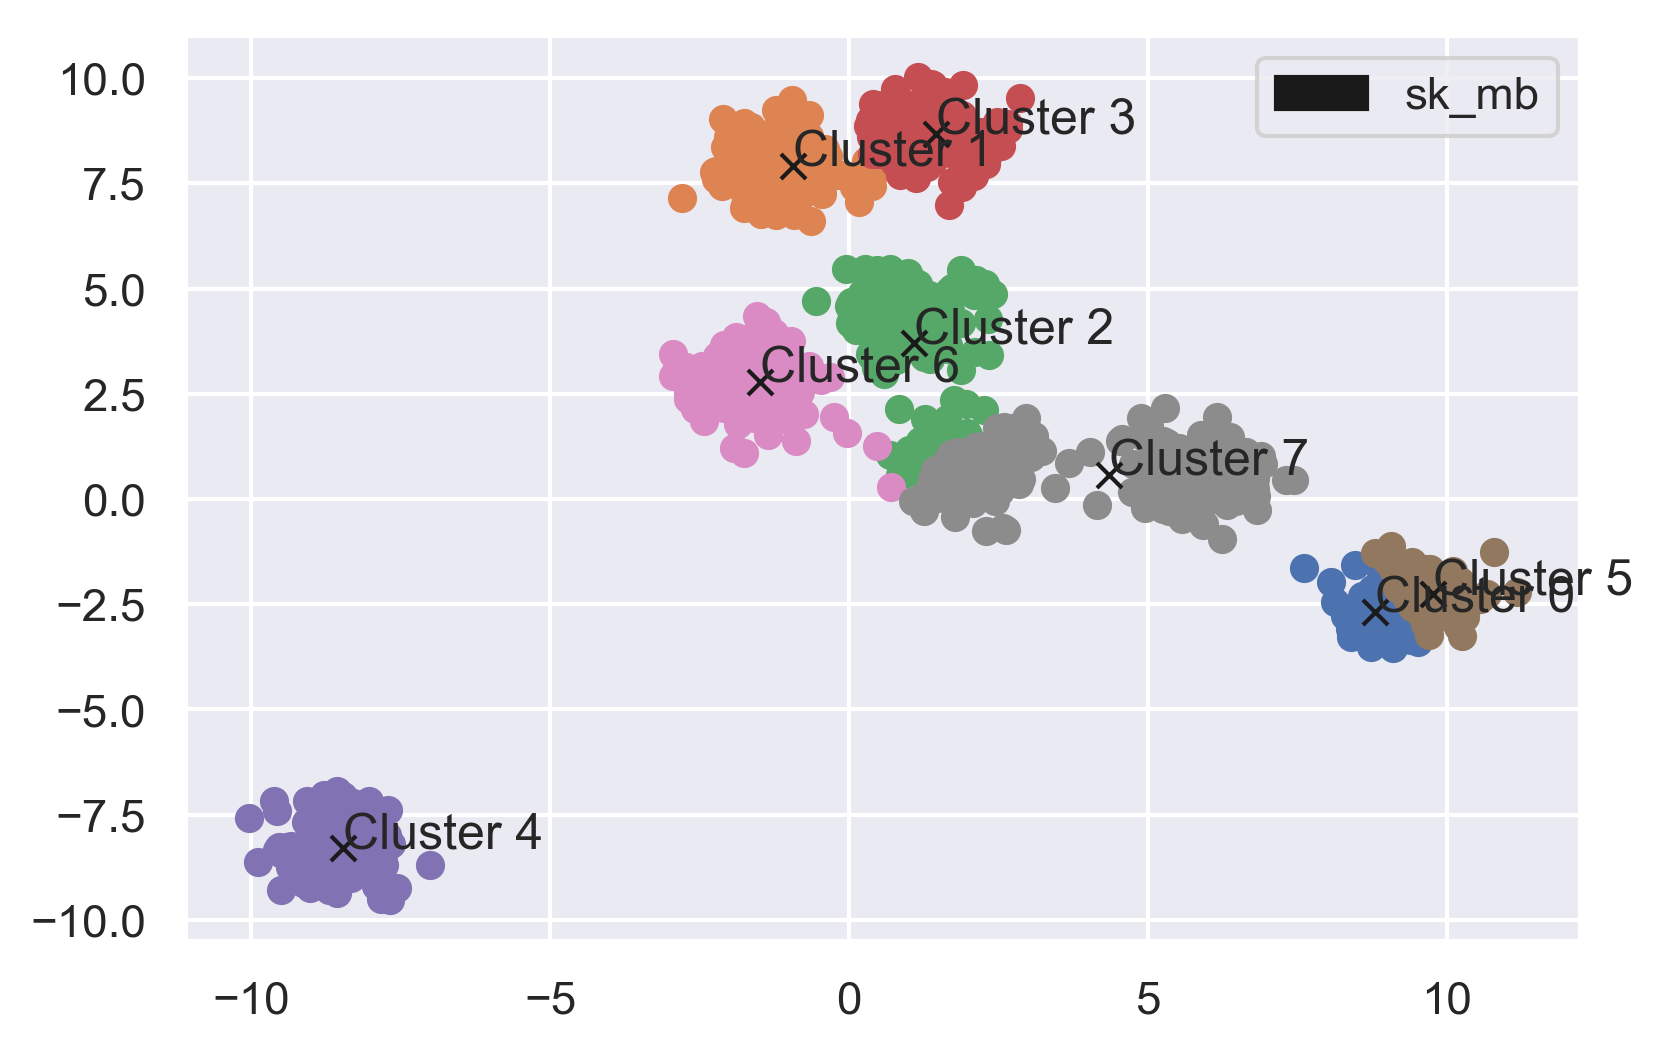

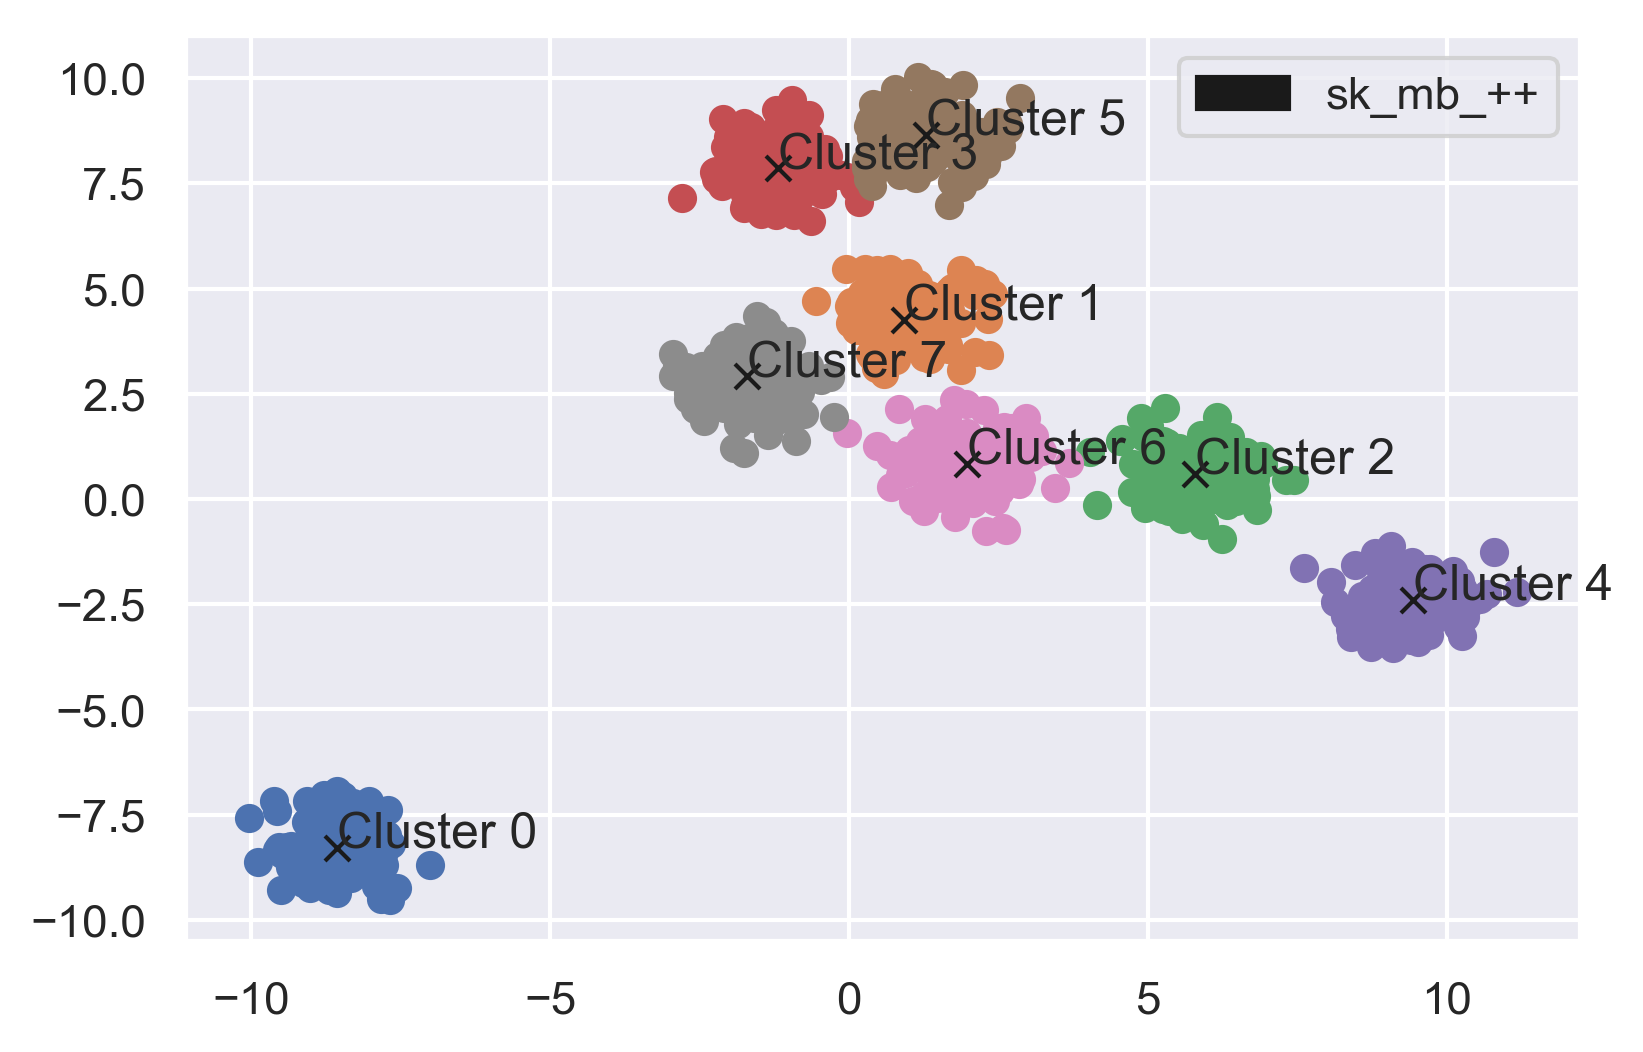

In [9]:
WWDK = cl.Kmeans(method="rng", k=8)
X1 = WWDK.fit(X)

WWDKplus = cl.Kmeans(k=8)
X2 = WWDKplus.fit(X)

WWDKmb = cl.MiniBatchKMeans(method="rng", k=8)
X3 = WWDKmb.fit(X)

WWDKmbplus = cl.MiniBatchKMeans(k=8)
X4 = WWDKmbplus.fit(X)

SK = sk.KMeans(init="random", n_clusters=8)
X5 = SK.fit(X)

skplus = sk.KMeans(n_clusters=8)
X6 = skplus.fit(X)

skmb = sk.MiniBatchKMeans(init="random", n_clusters=8)
X7 = skmb.fit(X)

skmbplus = sk.MiniBatchKMeans(n_clusters=8)
X8 = skmbplus.fit(X)

#useful definition from our utilities module to quickly plot clustering, k=8 had to be defined for labeling
u.plot_compare(X,WWDK.labels_, WWDK.cluster_centers_, 8, title="WWDK")
u.plot_compare(X,WWDKplus.labels_, WWDKplus.cluster_centers_, 8, title="WWDK_++")
u.plot_compare(X,WWDKmb.labels_, WWDKmb.cluster_centers_, 8, title="WWDK_mb")
u.plot_compare(X,WWDKmbplus.labels_, WWDKmbplus.cluster_centers_, 8, title="WWDK_mb_++")
u.plot_compare(X,SK.labels_, SK.cluster_centers_, 8, title="sk")
u.plot_compare(X,skplus.labels_, skplus.cluster_centers_, 8, title="sk_++")
u.plot_compare(X,skmb.labels_, skmb.cluster_centers_, 8, title="sk_mb")
u.plot_compare(X,skmbplus.labels_,skmbplus.cluster_centers_, 8, title="sk_mb_++")

Most of the time all algorithms seem to give us a reasonable clustering. Only our minibatch implementation seems to have difficulties, which is often fixed with the ++ implementation.

Comparing our package to sklearn we find our algorithm to be slower (regarding different number of centroids k and several runs/ inits) but of very similiar cluster quality.

For better understanding: our utility functions contain 2 parameters without defaults

time_k_plot(data, iterations, runs)

time_k_plot_mb(data, iterations, runs)

inertia_k_plot(data, iterations, runs)

time_init_plot(data, iterations, runs)

##### iterations
Maximal number of x variable which is tested against (k or inits)

##### runs
Number of repetitions for the whole code (for each x parameter which we test against). Takes the mean in the end. This is to avoid random fluctuations inherent to the algorithm itself.


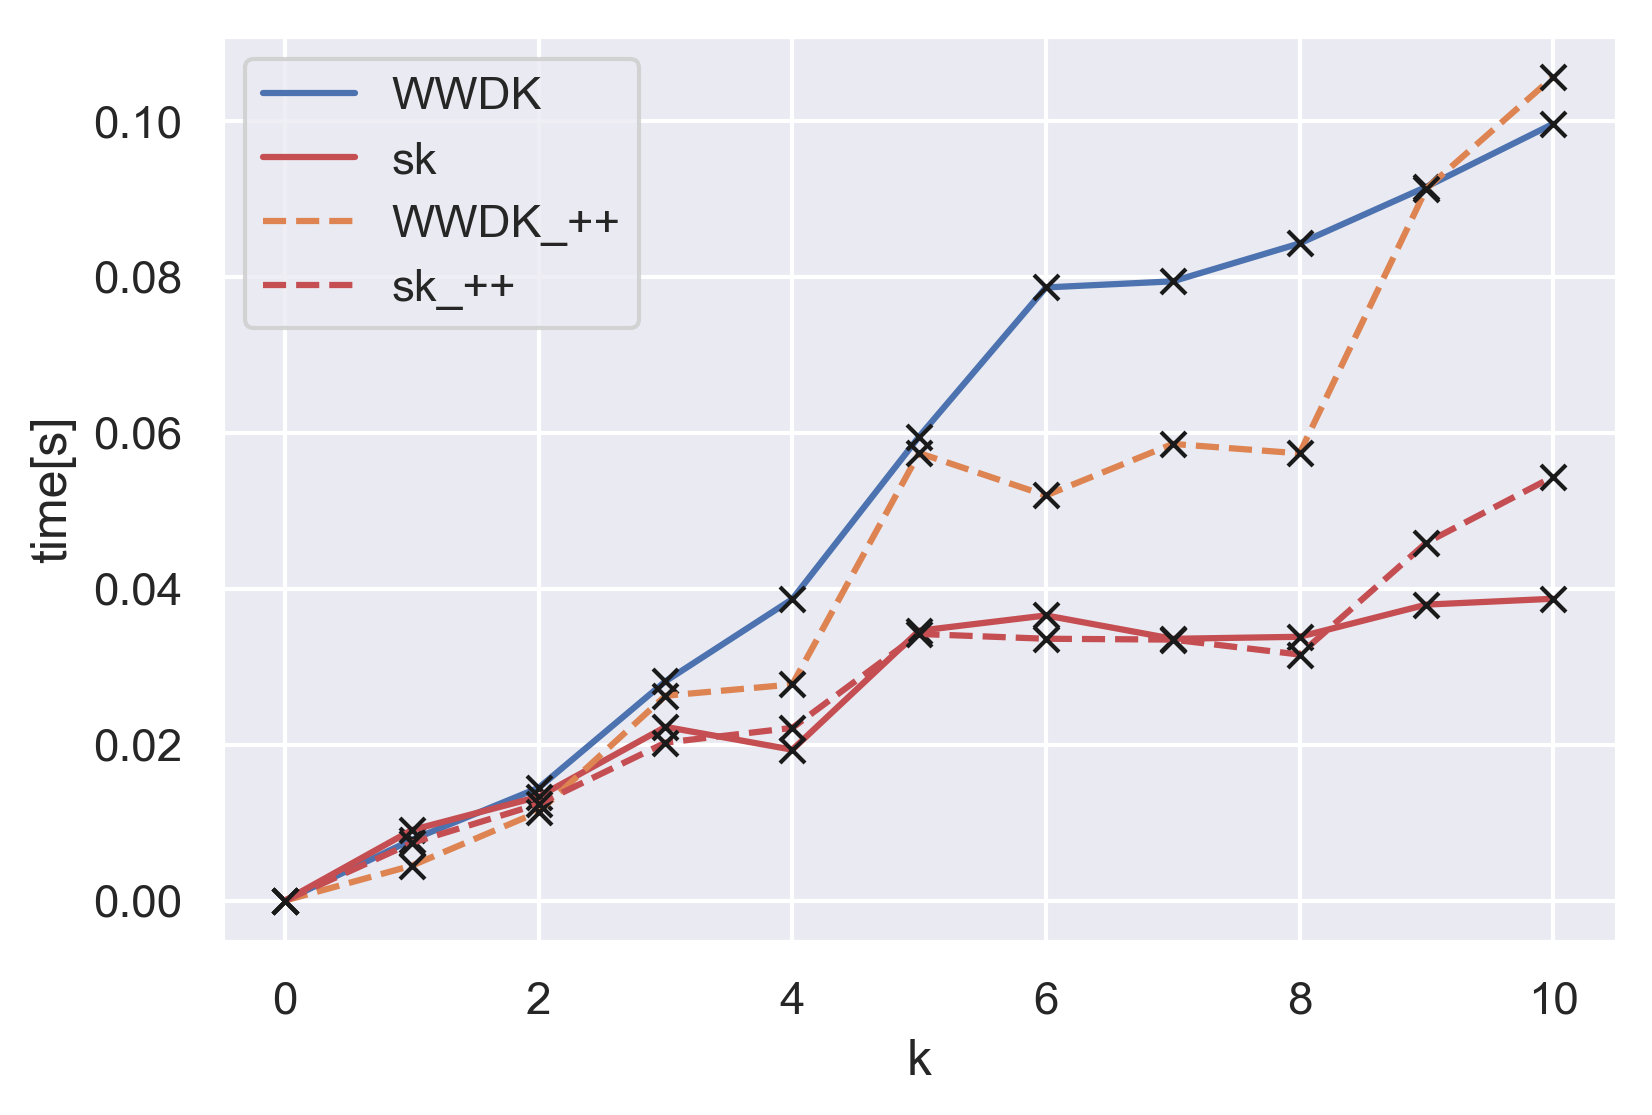

In [10]:
u.time_k_plot(X, iterations=10, runs=10)

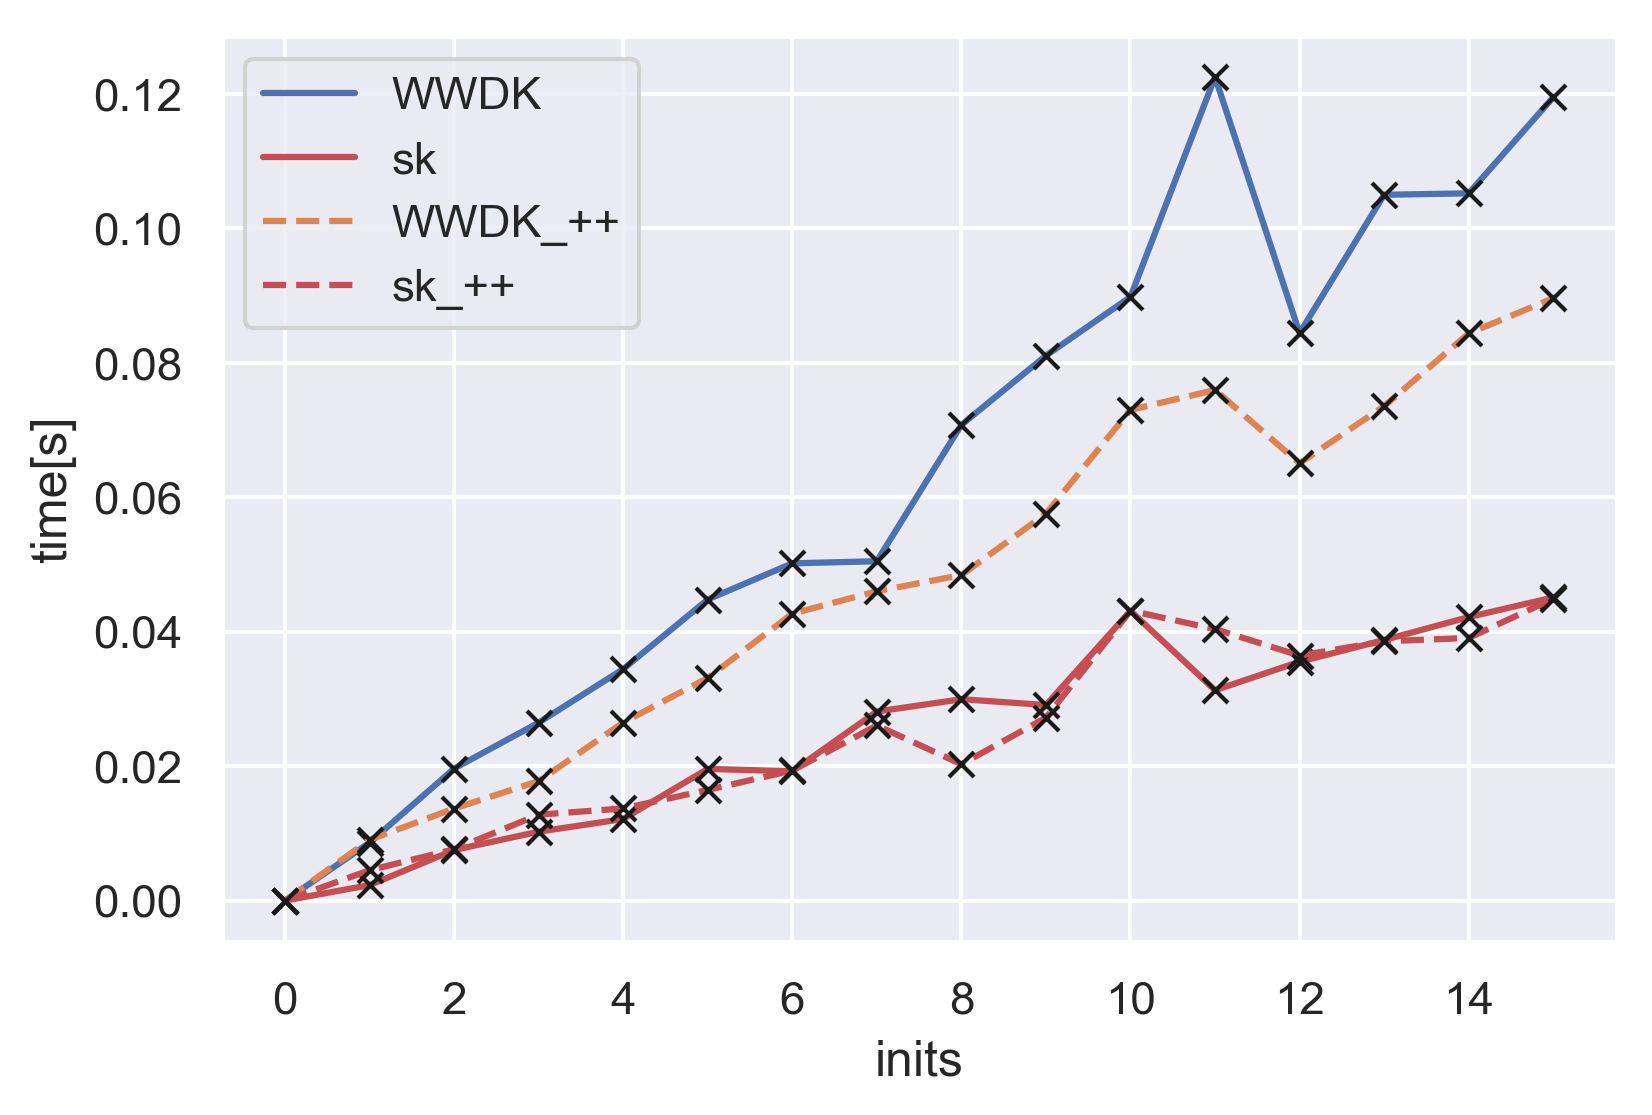

In [11]:
u.time_init_plot(X, iterations=15, runs=10)

The difference between WWDK and sklearn becomes more eveident for higher k and inits. Nontheless it is notable that our ++ implementation can be even faster than our vanilla initiation.

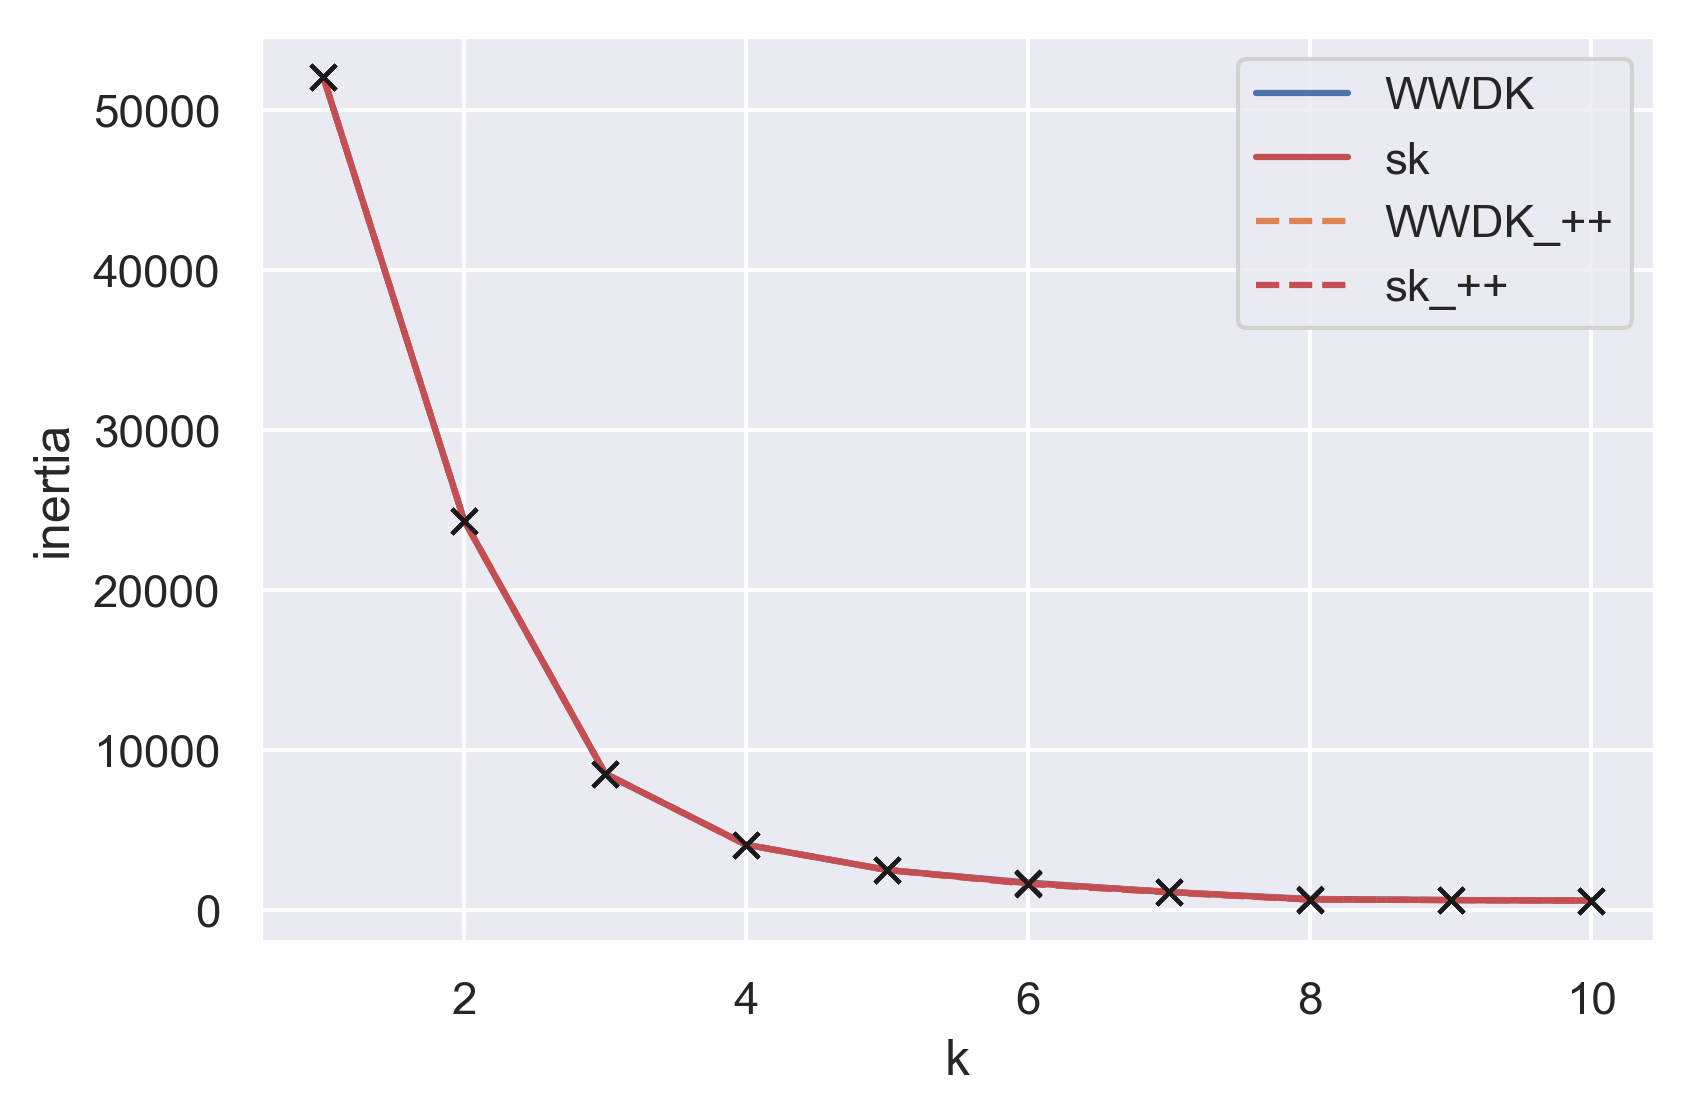

In [12]:
u.inertia_k_plot(X, iterations=10, runs=10) #inertia... Sum of squared distances of samples to their closest cluster center

Slower but WWDK minimises the inertia as well as sklearn without notable difference between ++ and random initiation.

#### Now we test the MiniBatch:

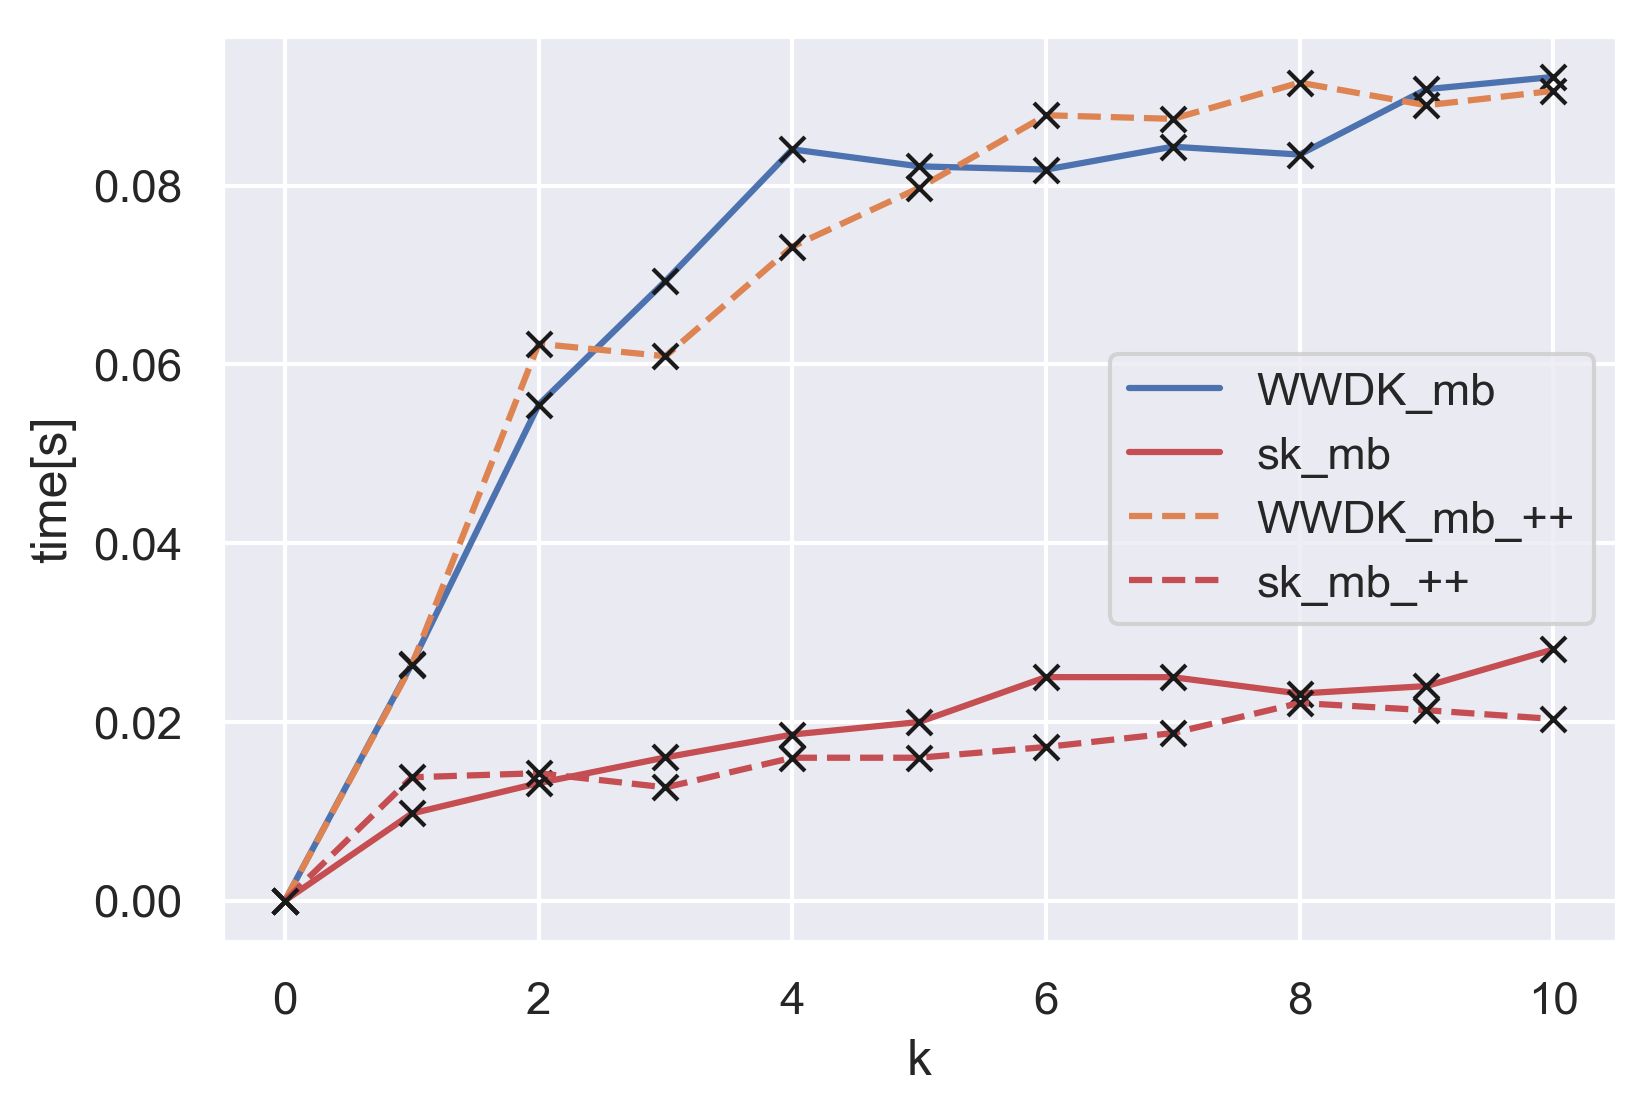

In [13]:
u.time_k_plot_mb(X, iterations=10, runs=10)

The time difference between WWDK and sklearn is more evedient than before, especially for smaller k.

We compare our minibatch against our fullbatch approach:

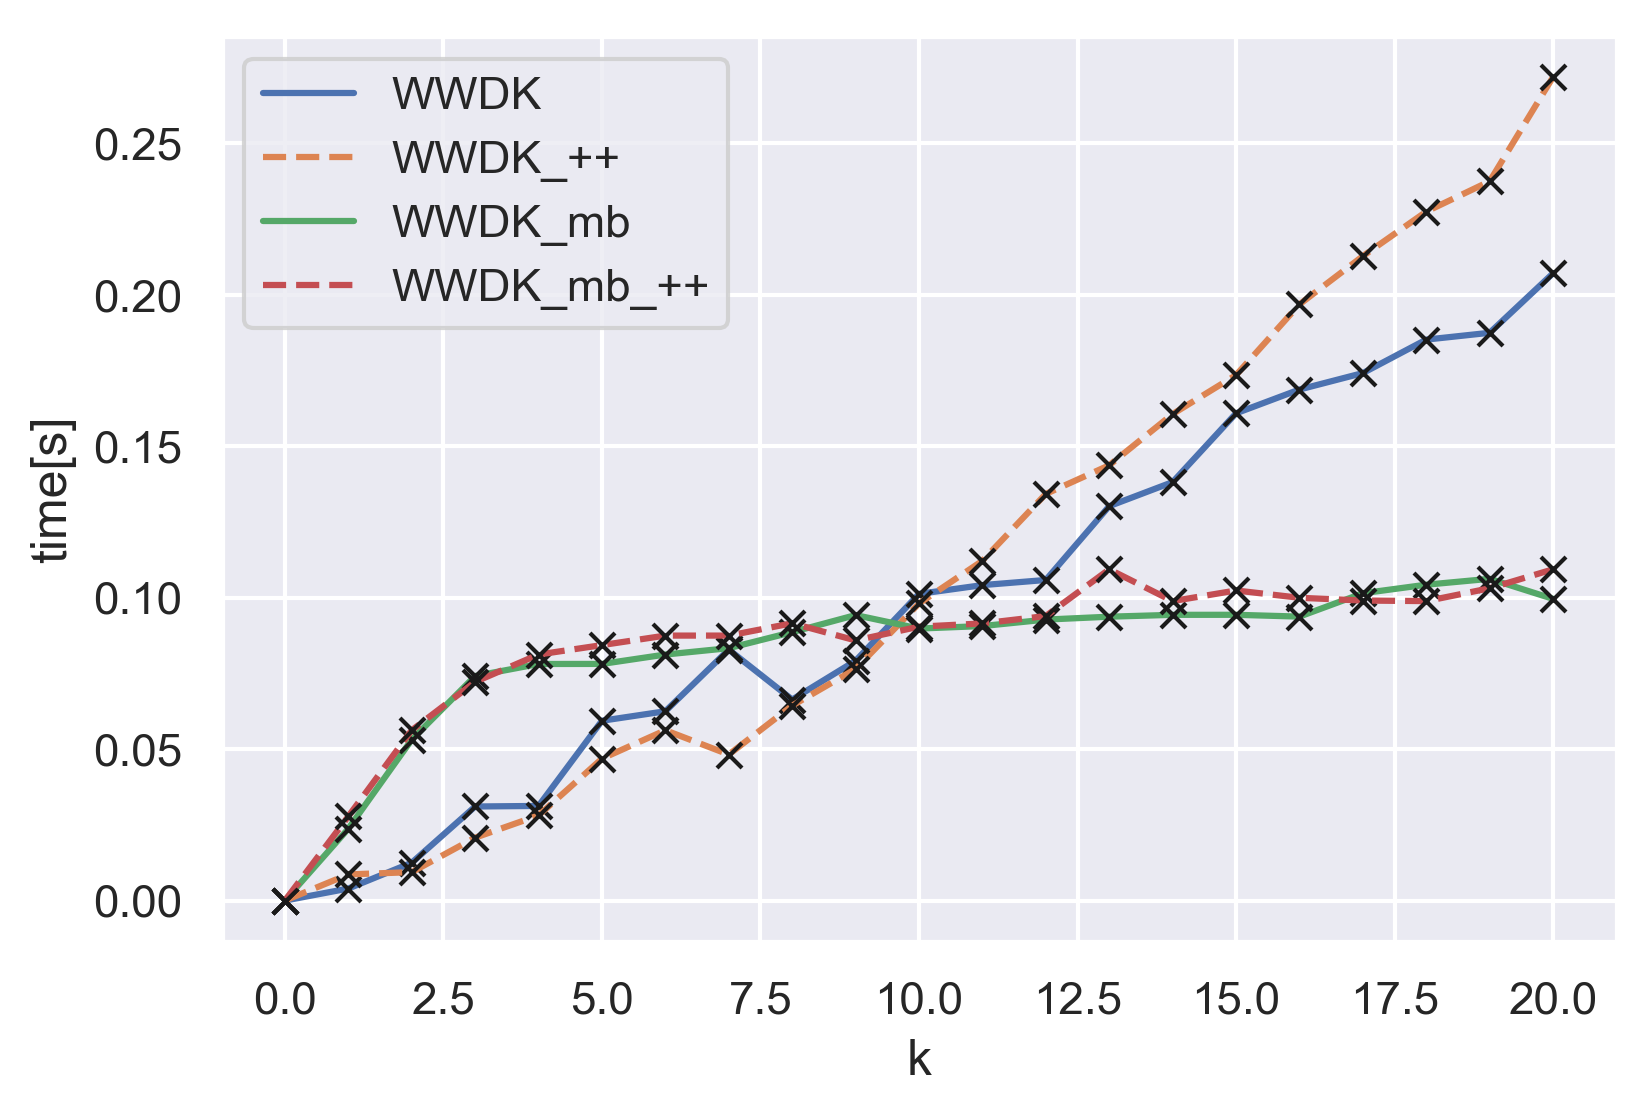

In [14]:
u.time_k_wwdk_compare(X, iterations=20, runs=5, batchsize=100) #another parameter batchsize to increase comparison possibilities

Minibatch only becomes faster for larger k. As minibatch is designed for bigger datasets, we can better see its advantage looking at one:

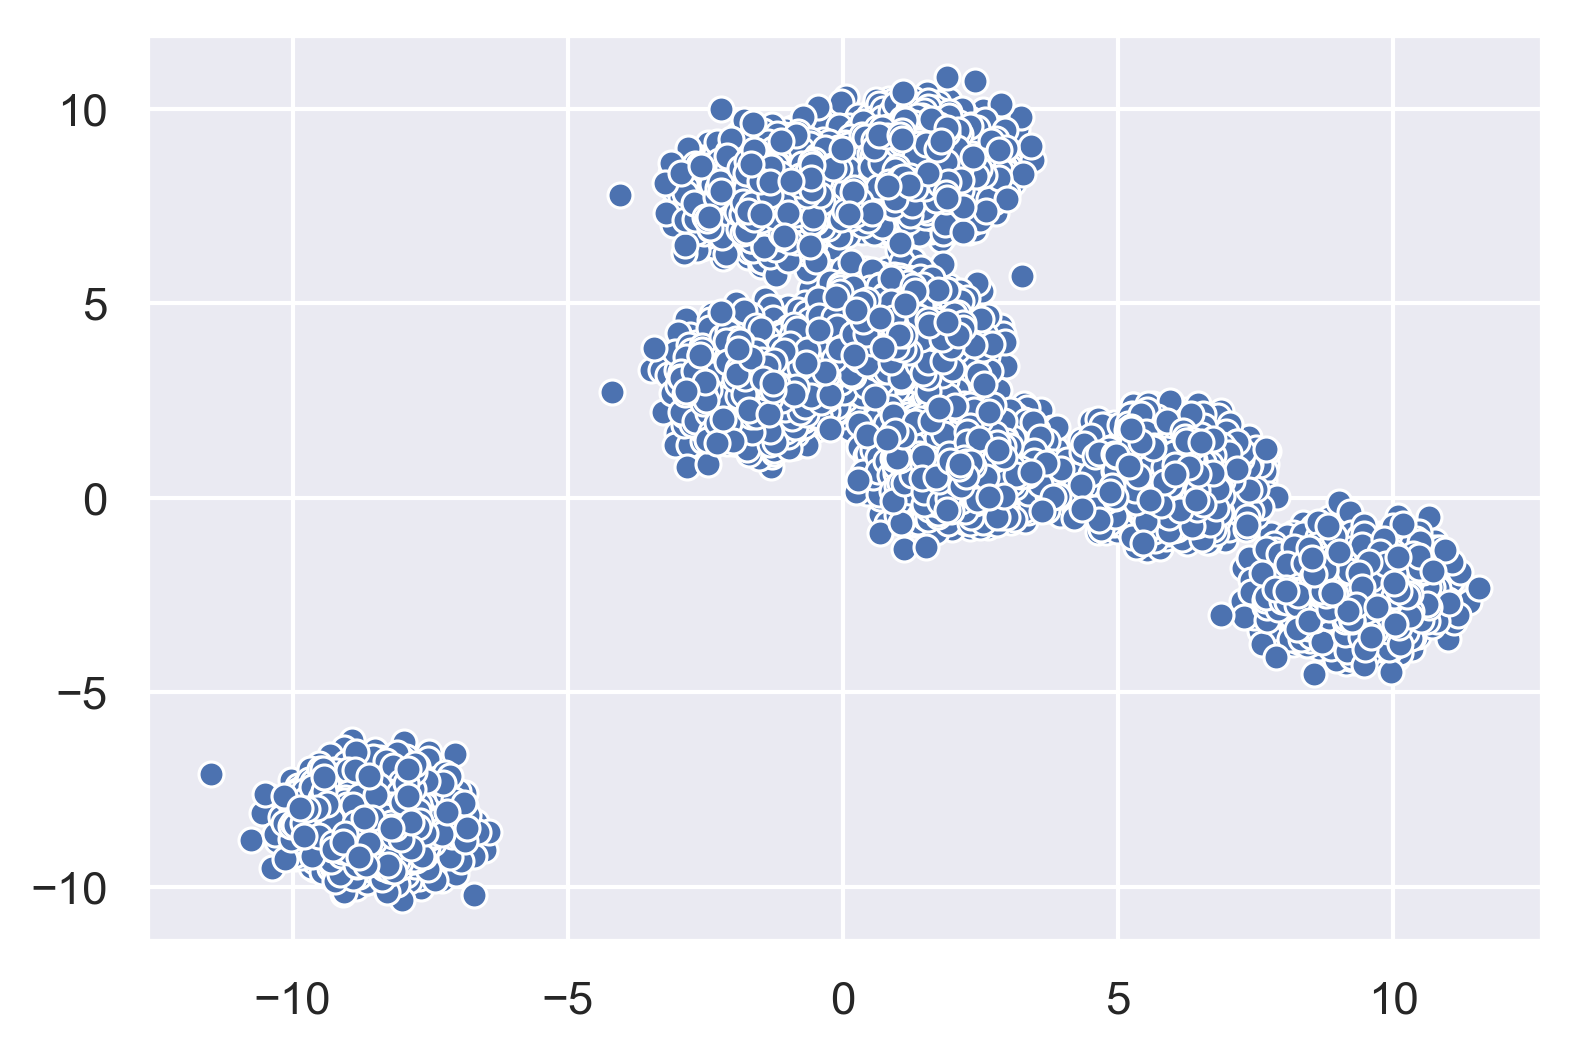

In [15]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X2, y_true = make_blobs(n_samples=30000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X2[:, 0], X2[:, 1]);

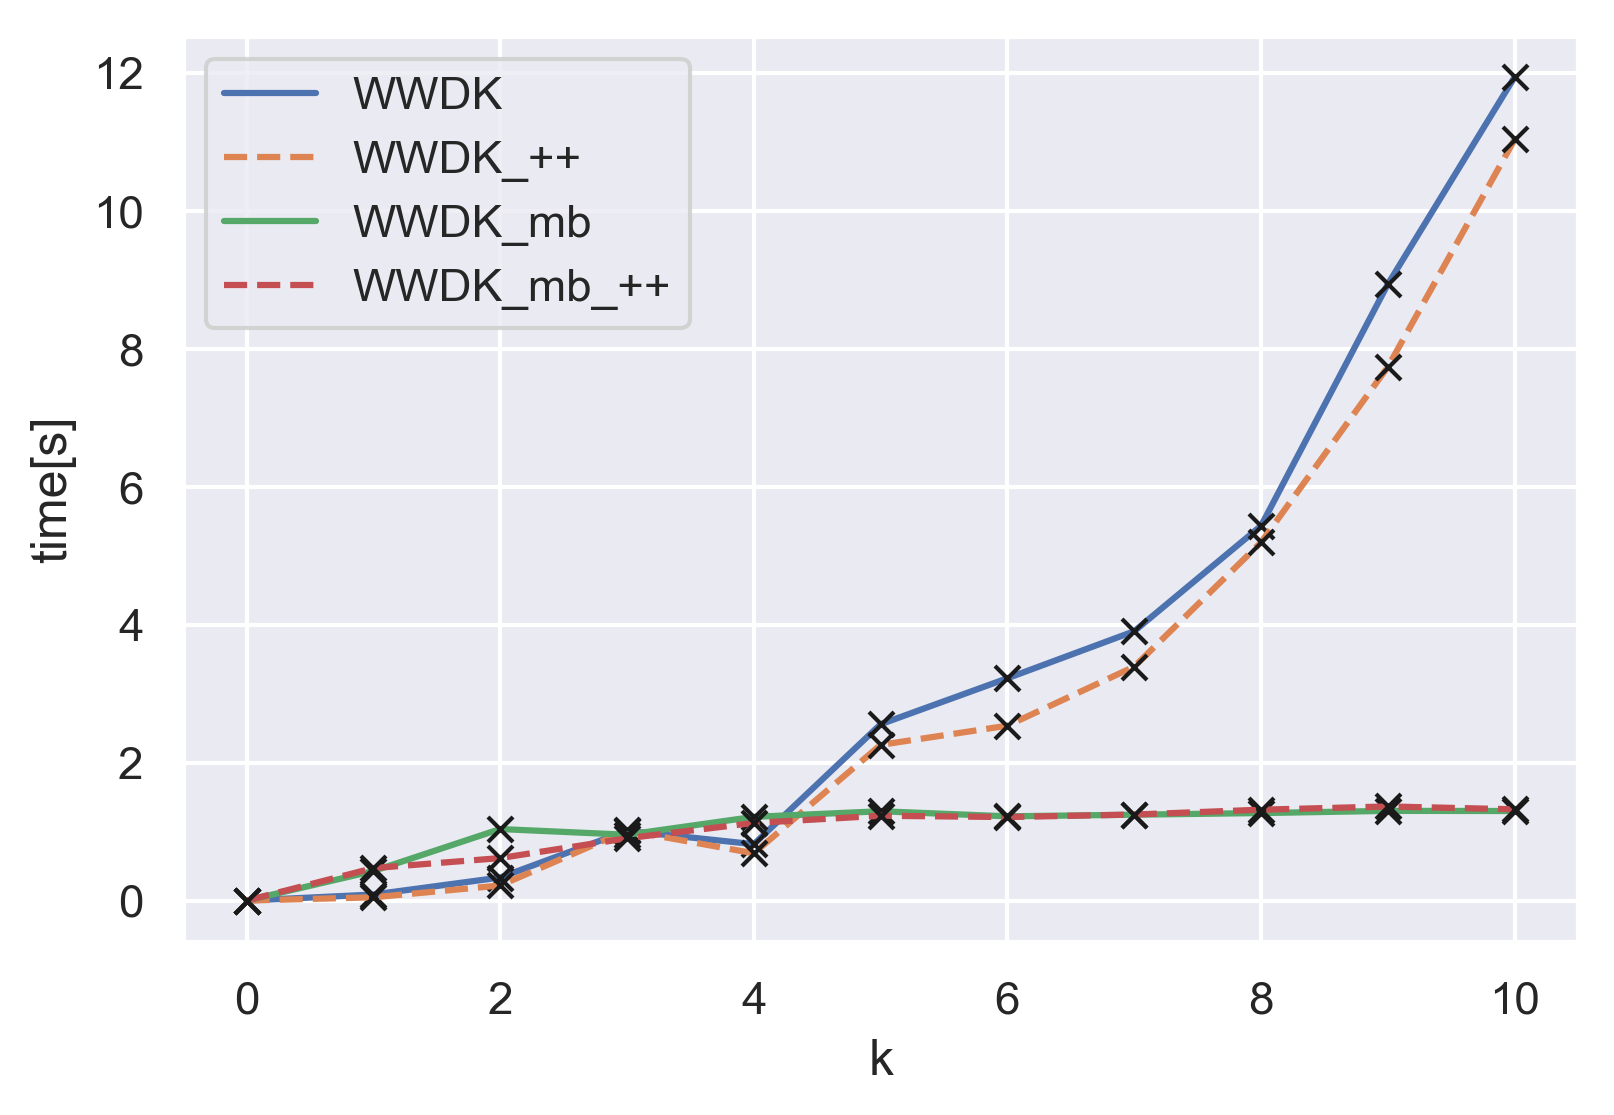

In [16]:
u.time_k_wwdk_compare(X2, iterations=10, runs=5, batchsize=100)

Instead of 1000 we now look at 30000 datapoints. Here it becomes evident why Minibatch is useful.

### Limitations of kmeans - why to look at the assumptions

Next we look at a datset with a more difficult geometric shape

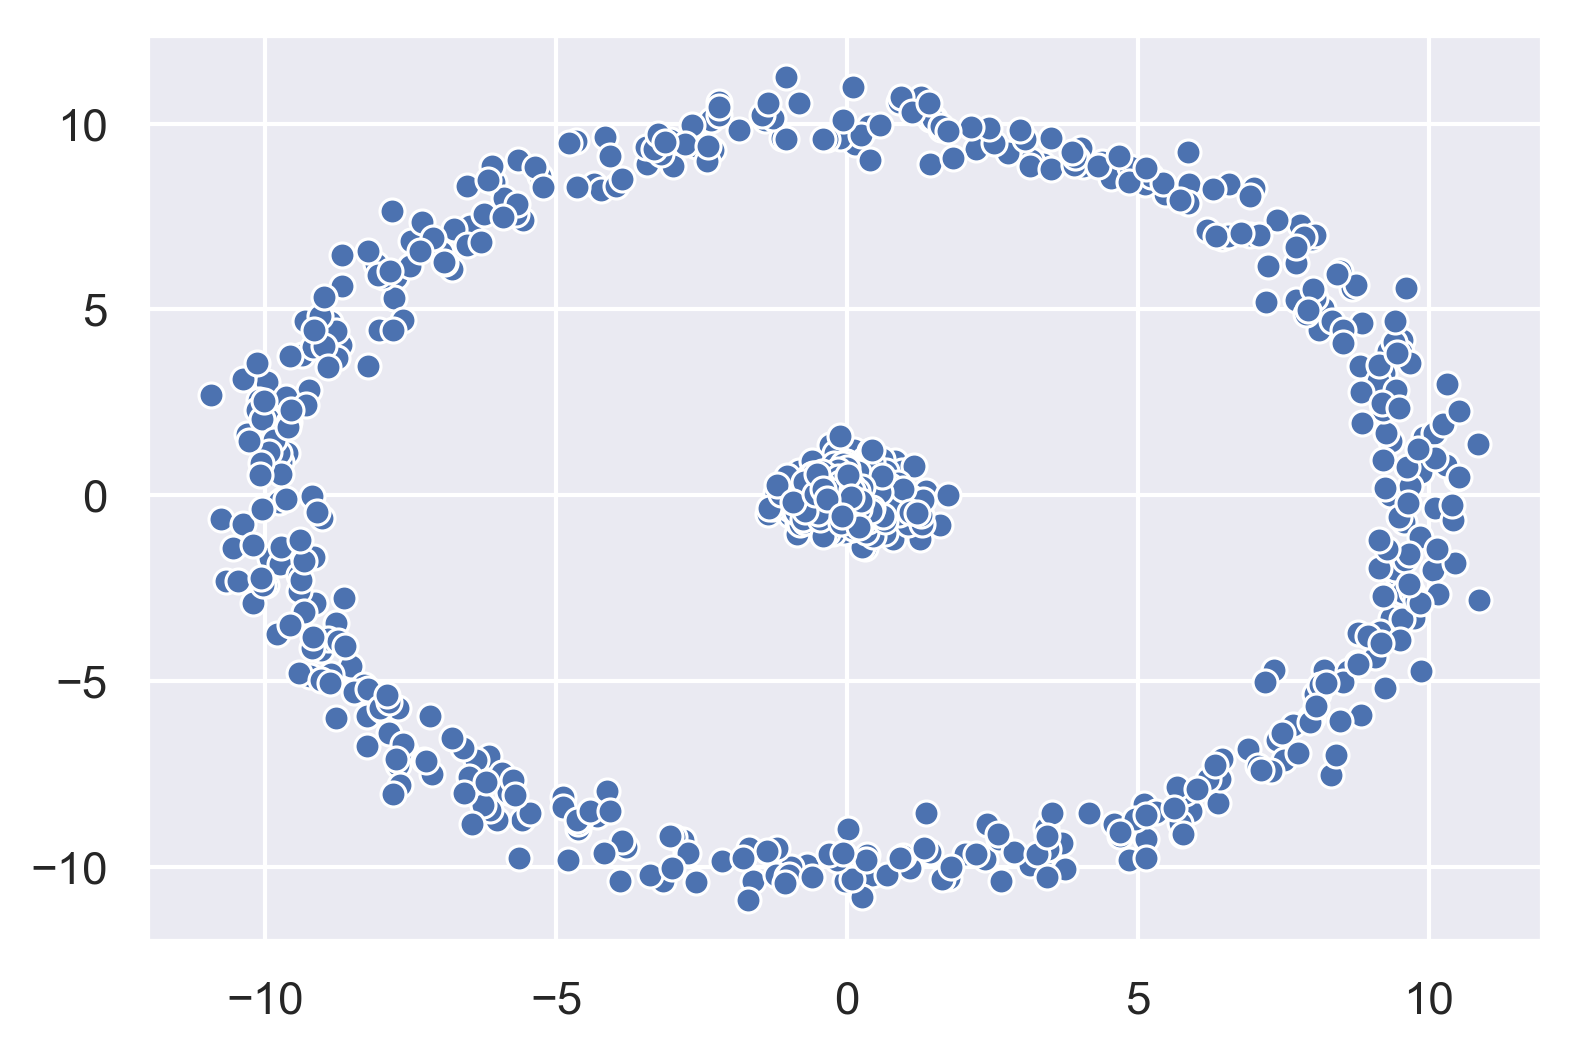

In [17]:
from sklearn import datasets
my_tuple = x, y_true = datasets.make_circles(n_samples=1000, factor=0,
                                      noise=.05)
x= x*10
sns.scatterplot(x[:, 0], x[:, 1]);

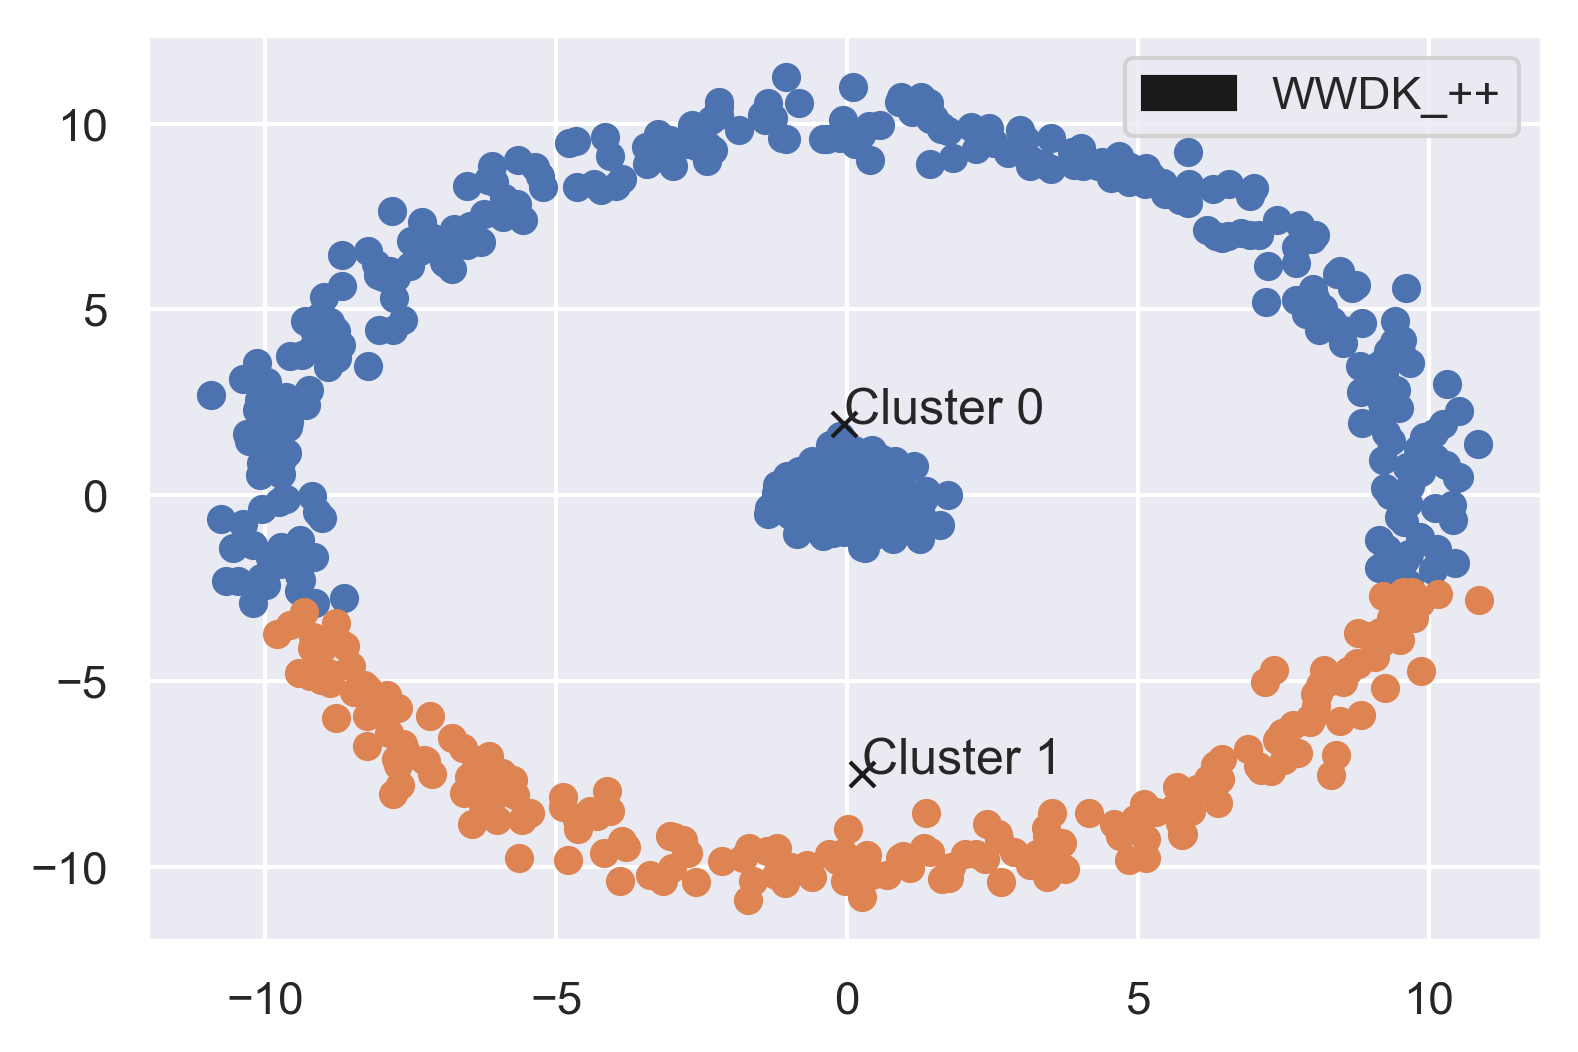

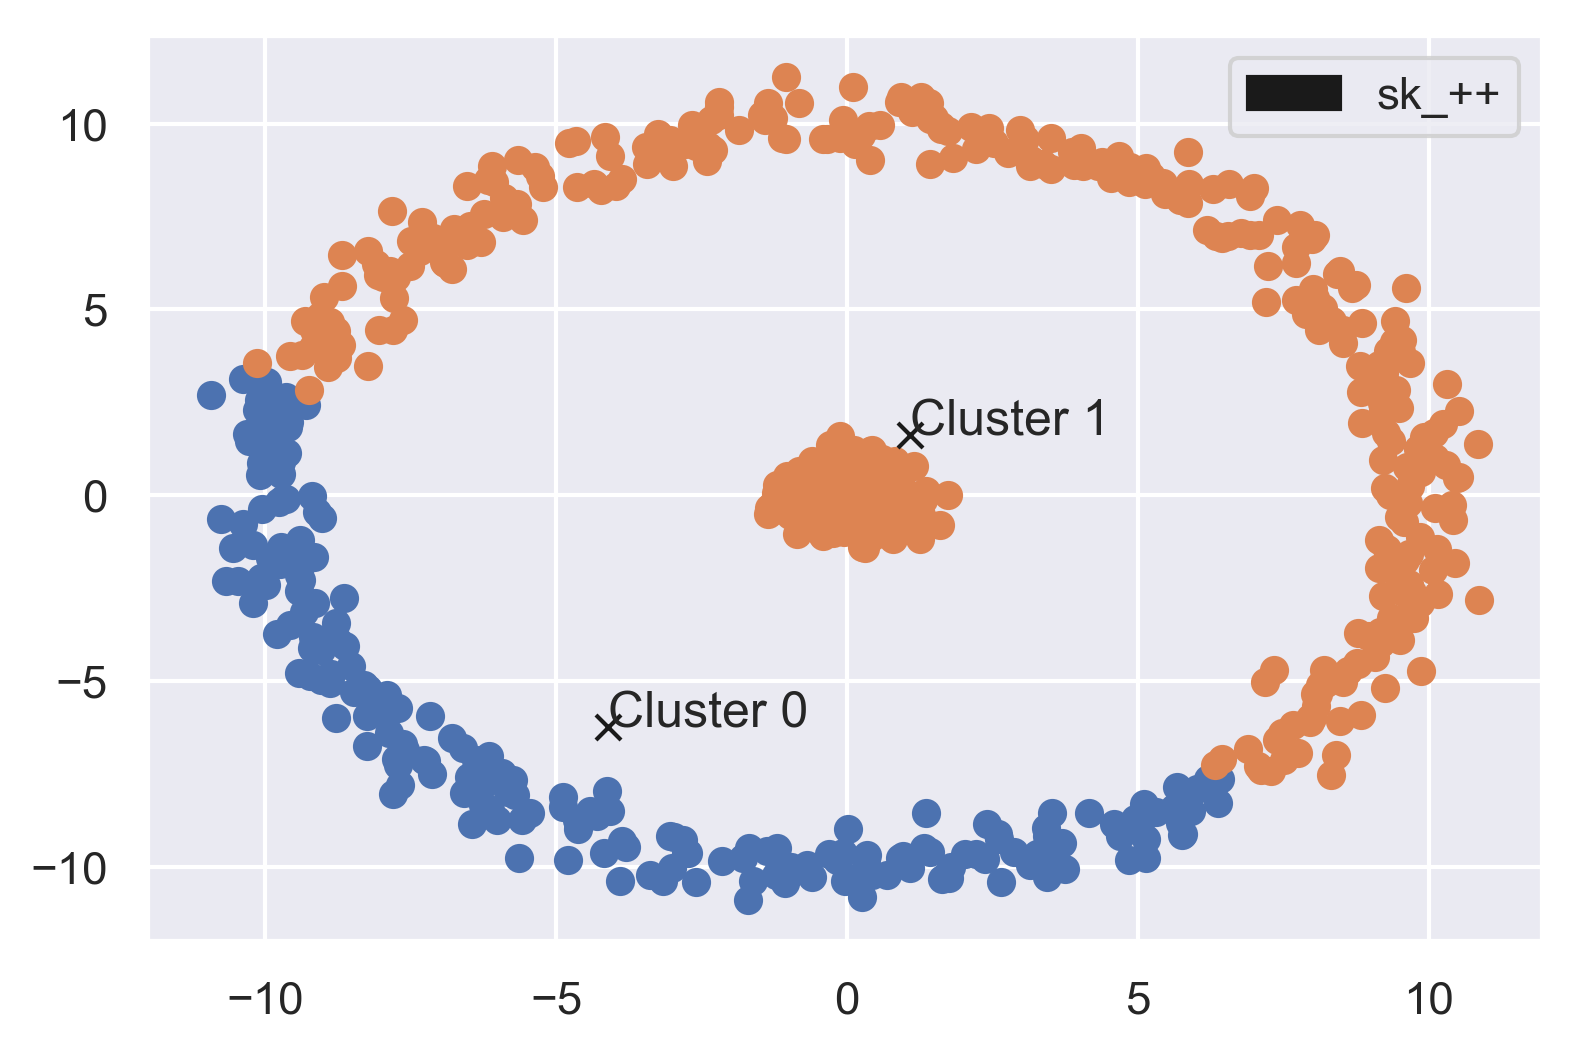

In [18]:
wwdk1 = cl.Kmeans(inits=10, method="rng", k=2)
x1 = wwdk1.fit(x)
sk1 = sk.KMeans(n_init=10, init="random", n_clusters=2)
x2 = sk1.fit(x)

u.plot_compare(x, wwdk1.labels_, wwdk1.cluster_centers_, 2, title="WWDK_++")
u.plot_compare(x, sk1.labels_, sk1.cluster_centers_, 2, title="sk_++")

The algorithms still minimize the within square distance perfectly fine and thereby find clusters. But the minimization assumes spheric clusters. For non-spherical clusters we can either use other algorithms or in some cases (if we know what kind of clusters to expect) we can transform our data beforehand. In this case we can run the algorithms on polar cooridnates instead.


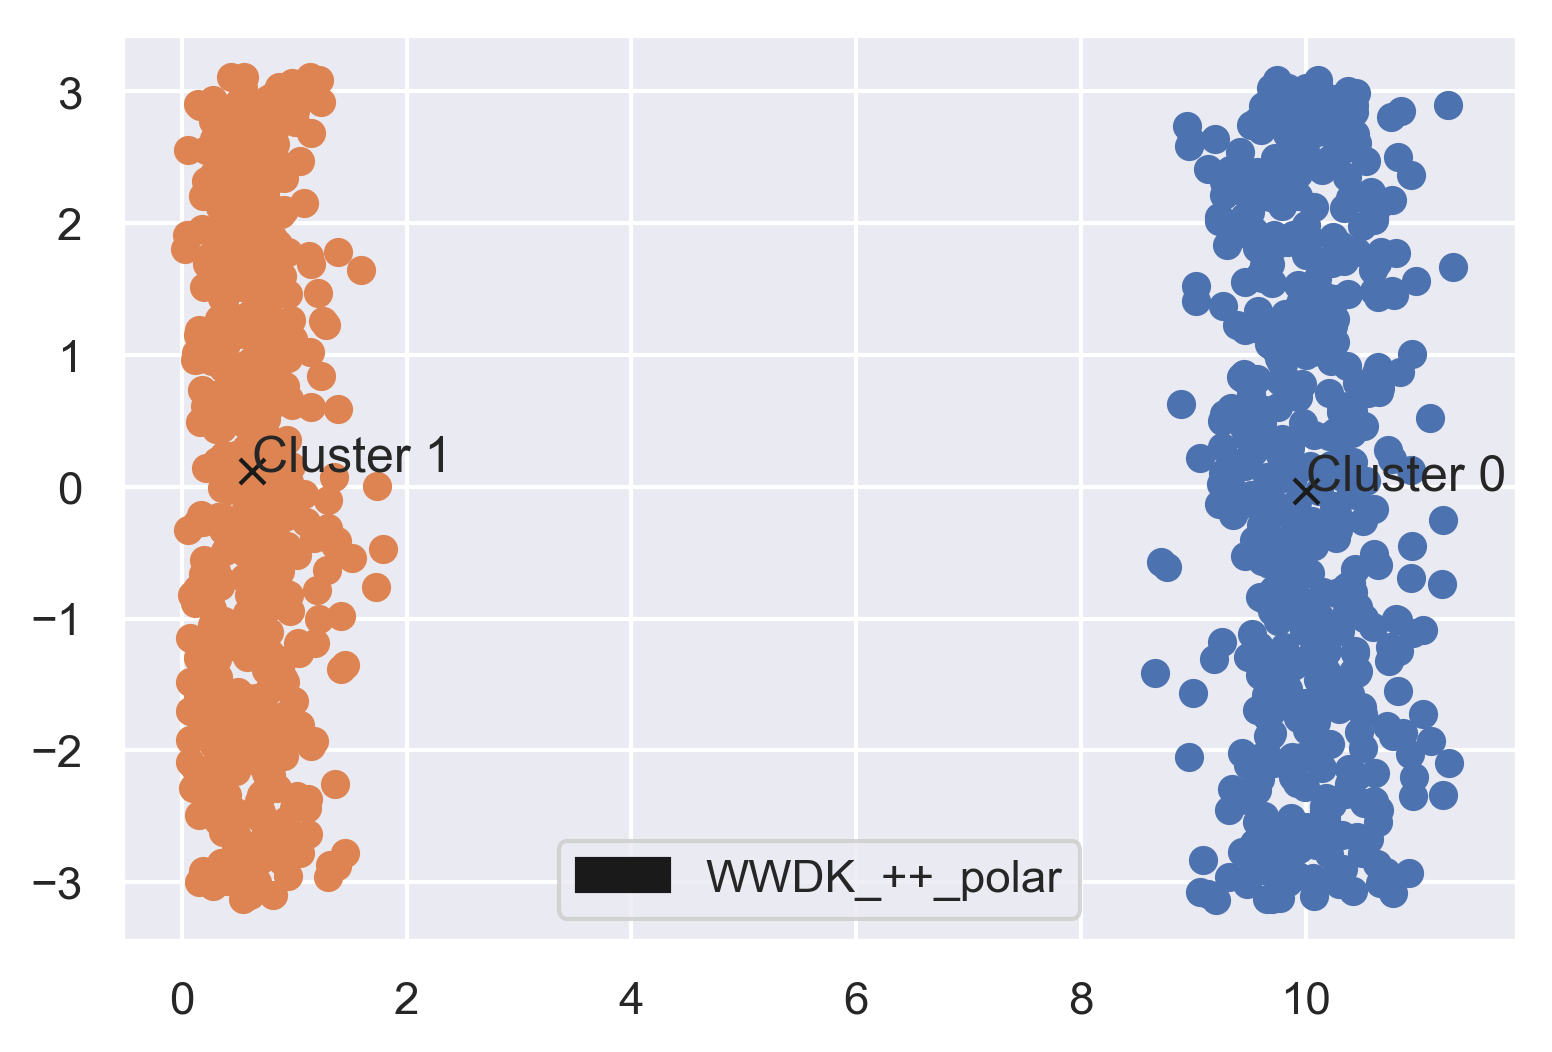

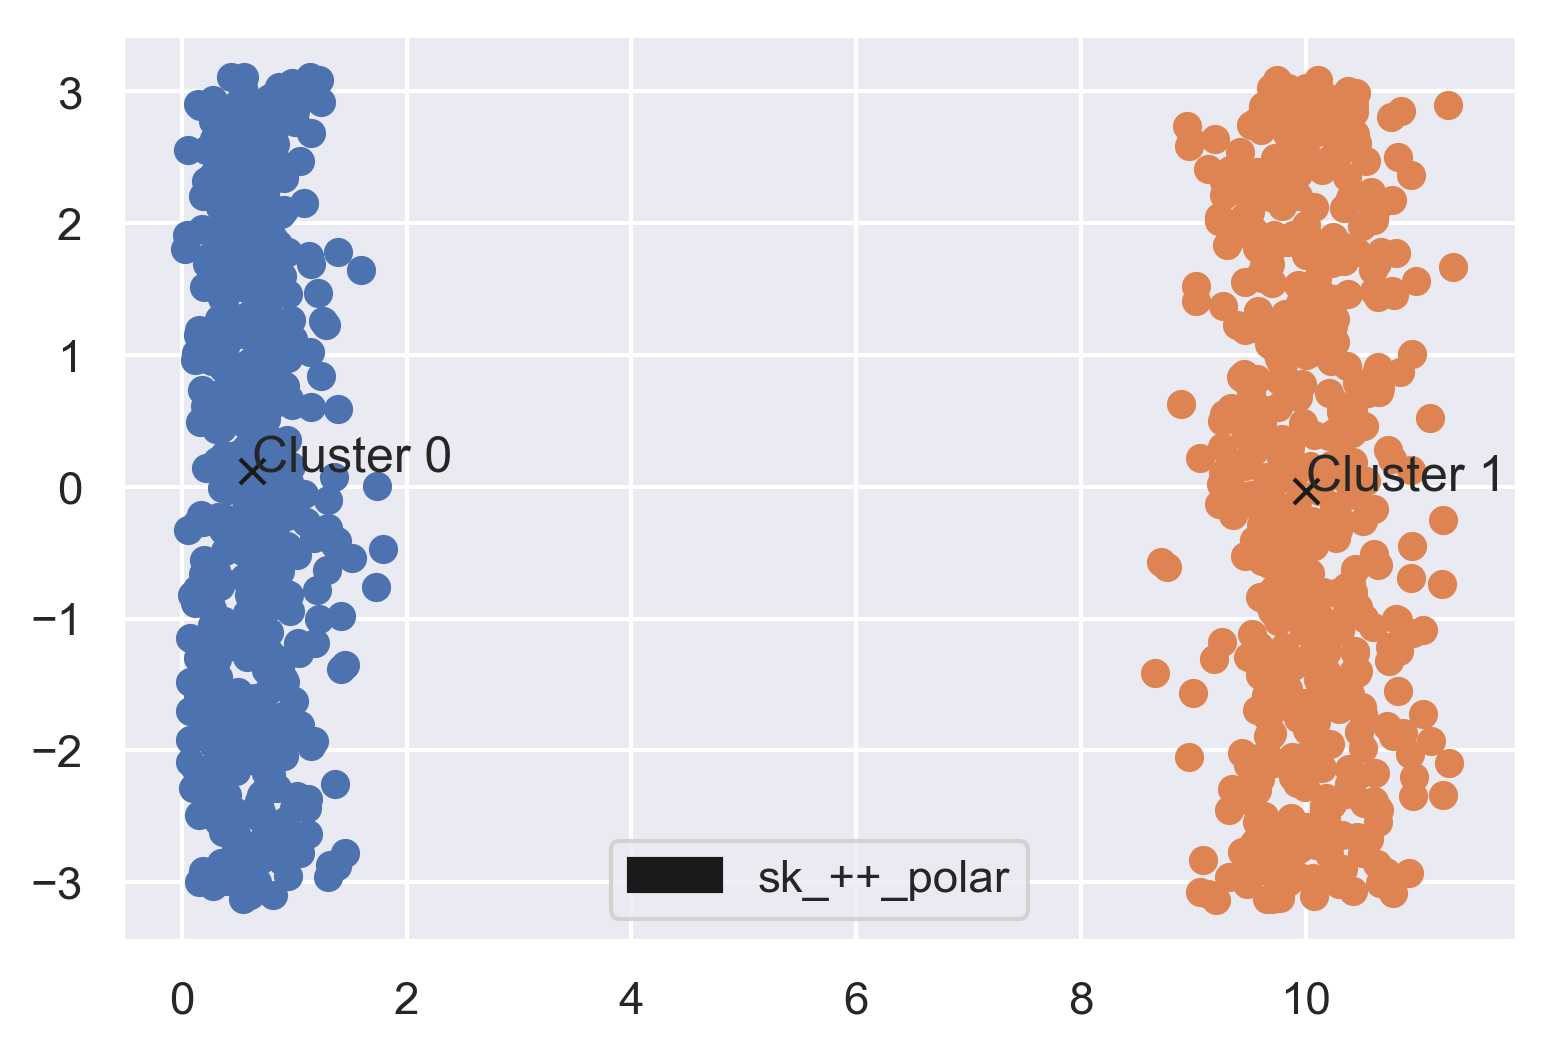

In [19]:
import numpy as np
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2) 
    phi = np.arctan2(y, x)
    points = np.column_stack((rho,phi))
    return (points)
    #return ([rho,phi])

pol = cart2pol(x[:, 0], x[:, 1])

wwdk2 = cl.Kmeans(k=2)
x1 = wwdk2.fit(pol)
sk2 = sk.KMeans(n_clusters=2)
x2 = sk2.fit(pol)

u.plot_compare(pol, wwdk2.labels_, wwdk2.cluster_centers_, 2, title="WWDK_++_polar")
u.plot_compare(pol, sk2.labels_, sk2.cluster_centers_, 2, title="sk_++_polar")


Now we can use this labels to plot the cartesian data. Of course for a correct display the centers would need to be transformed back to cartesian coordinates, too (was not done here because they hold no useful information as cartesian).

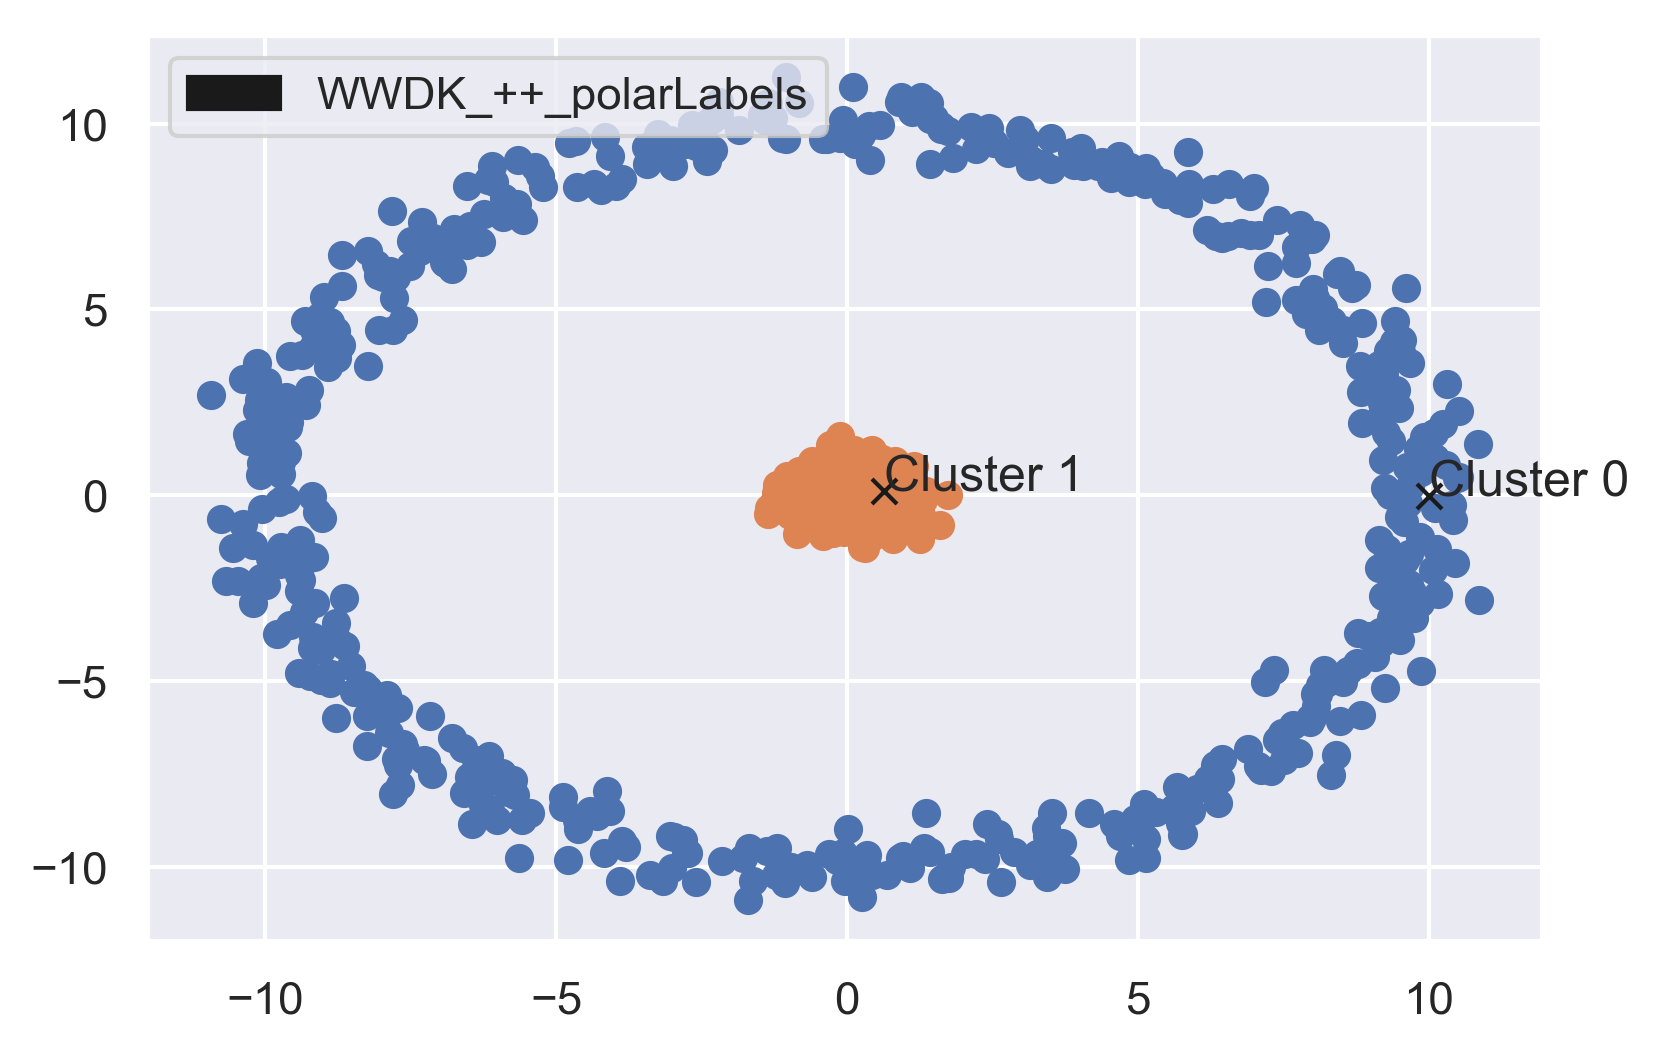

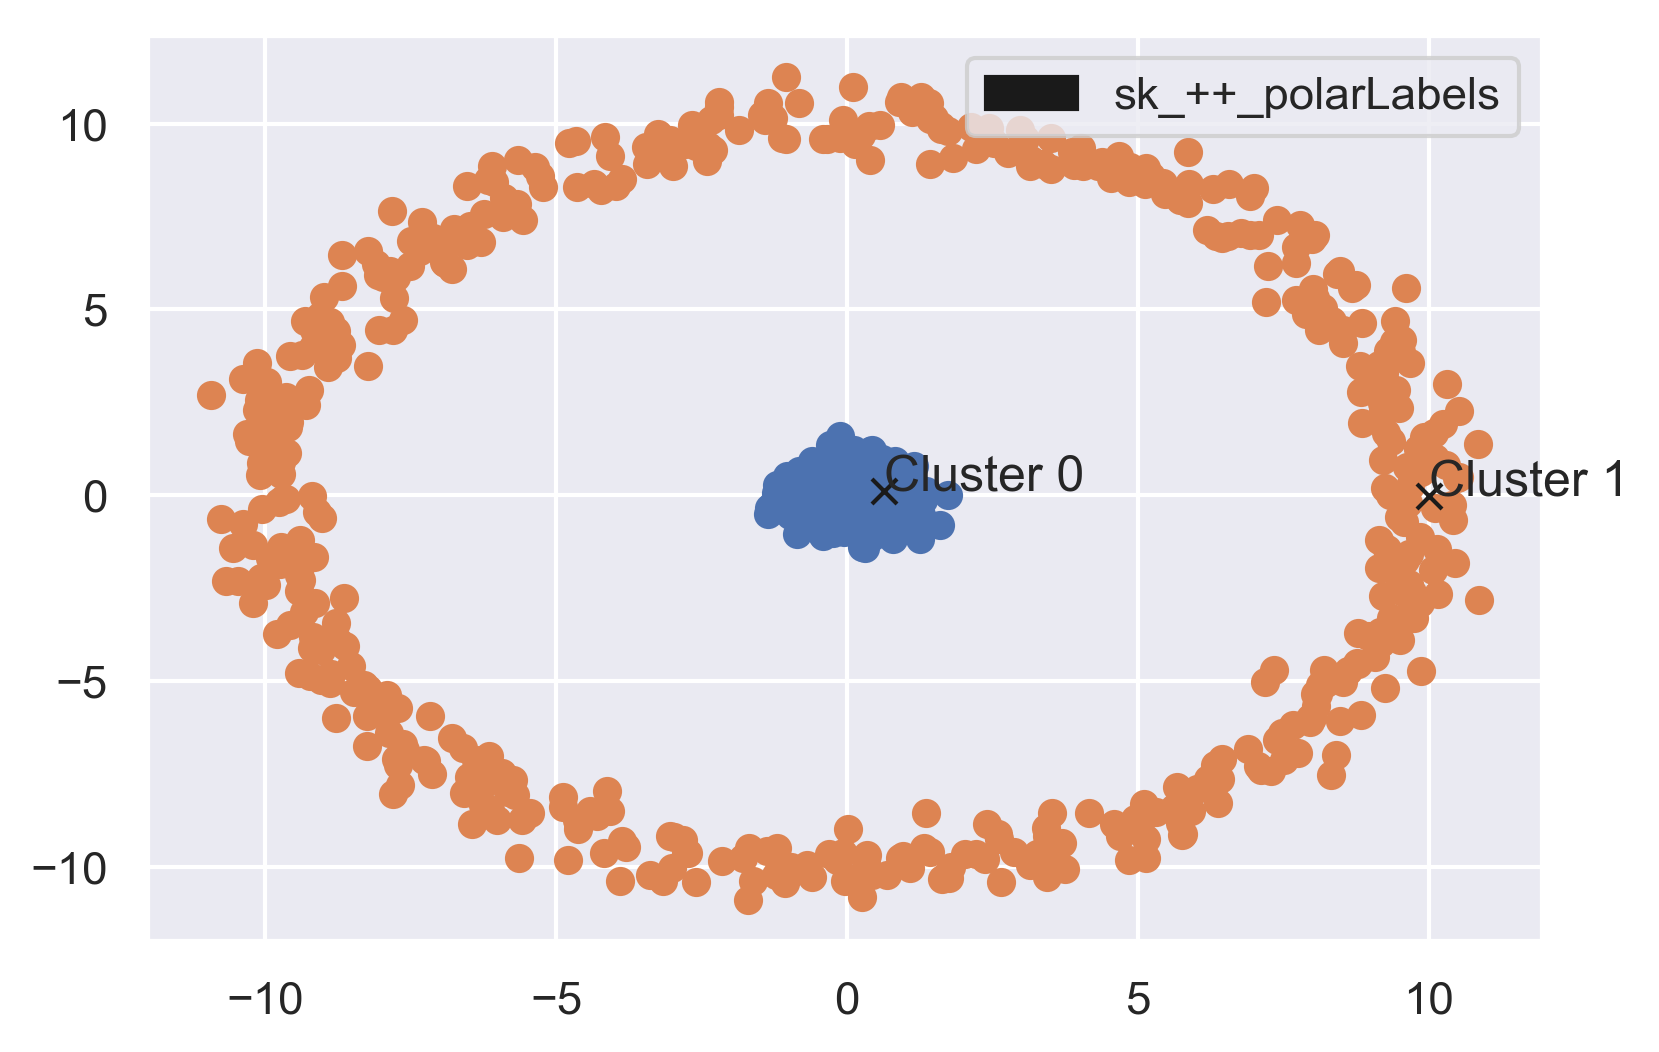

In [20]:
u.plot_compare(x, wwdk2.labels_, wwdk2.cluster_centers_, 2, title = "WWDK_++_polarLabels")
u.plot_compare(x, sk2.labels_, sk2.cluster_centers_, 2, title = "sk_++_polarLabels")

<b> By taking the assumptions our algorithm makes into consideration we can avoid and fix some of its drawbacks.

## Pokemon Dataset

In next step we wanted to analyze a pokemon dataset. This represents an easy to understand and relatively small dataset to test our clustering.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pkmn = pd.read_csv('Pokemon/pokemon.csv', index_col=0)
pkmn.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

As one can see Pokemon all have a type and differ in stats of HP, Attack, Special Attack, Defense, Special Defense and Speed. We dropped Generation and Legendary status as we only wanted to see if we can see how Pokemon compare in these stats.

In [22]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

red_pkmn = pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed", "Type 1"]]
pkmn_array = np.array(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])

### Without Dimensional Reduction

First we took a look at the dataset without any preprocessing at all. This was to test how our Kmeans handles multidimensional data and to see the difference between using dimensional reduction and not using it

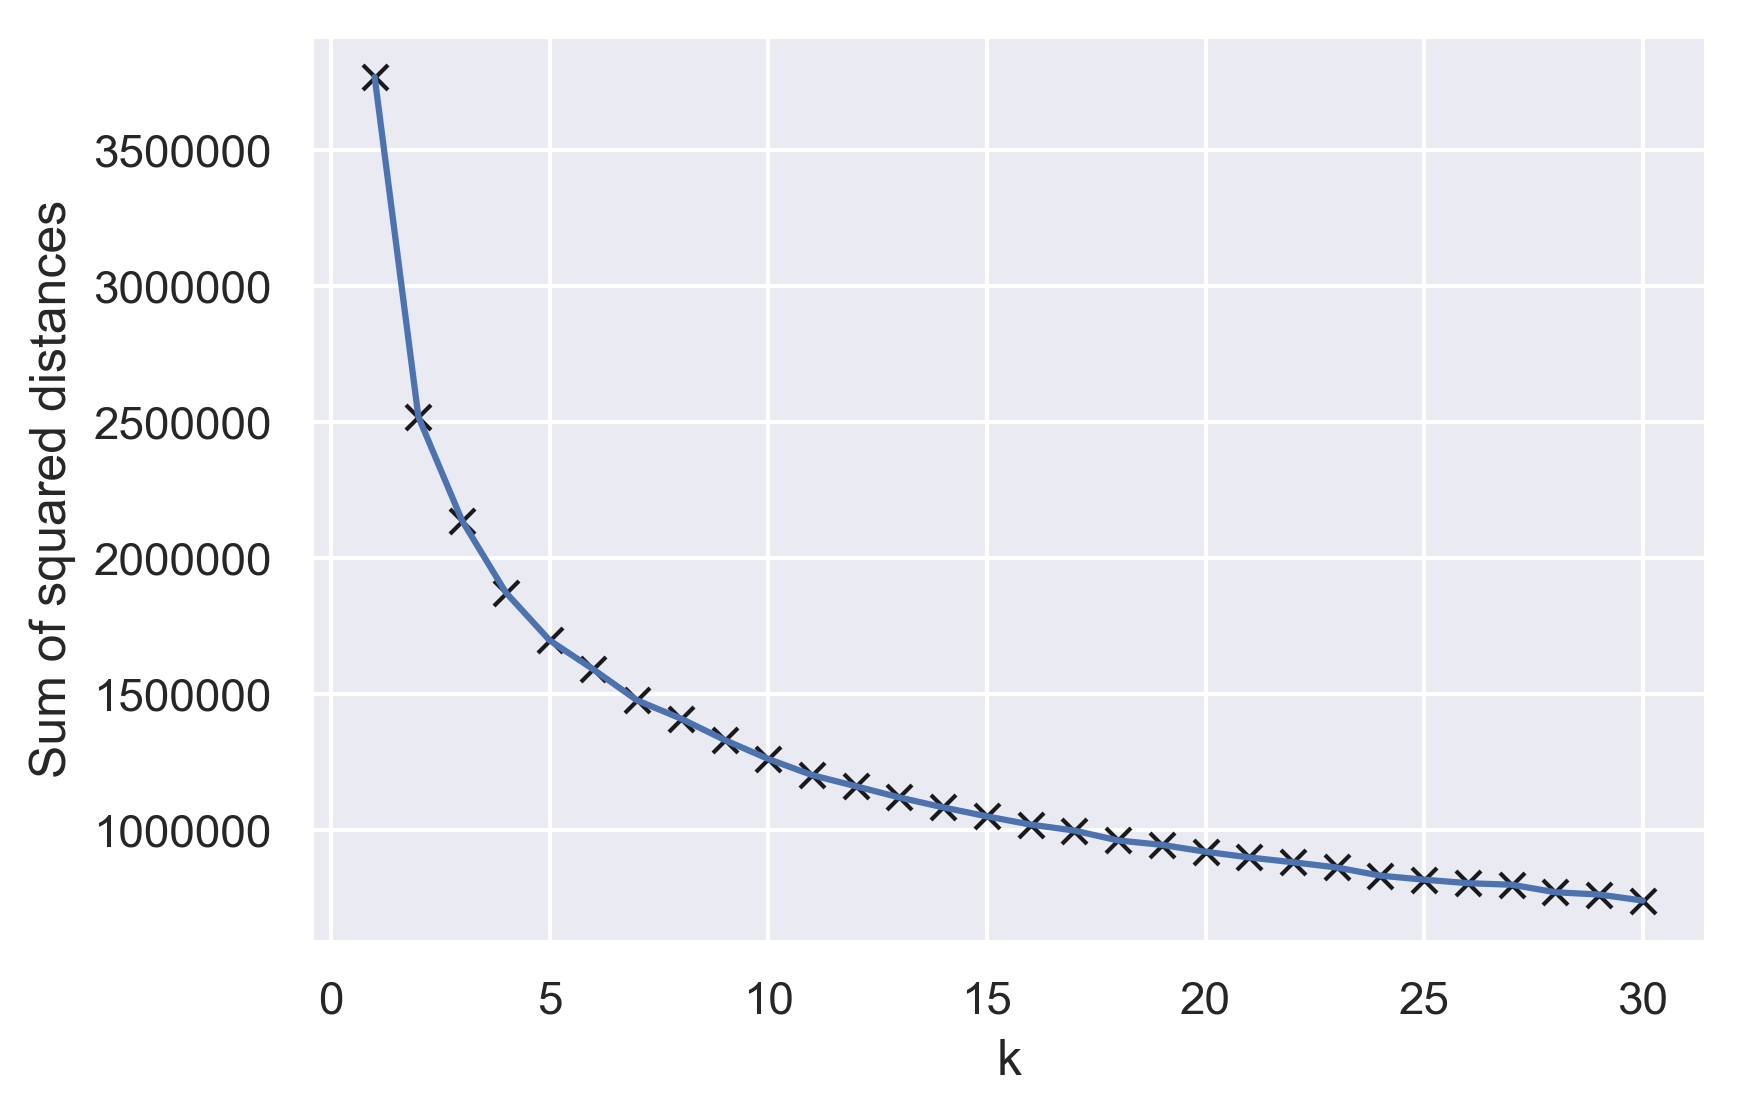

In [23]:
u.elbow_plot(pkmn_array,30)

We decided to choose 10 centroids based on the elbow plot

In [24]:
kmeans_without_dr = cl.Kmeans(k=10)
kmeans_without_dr.fit(pkmn_array)

Kmeans(inits=10, k=10, maxit=300, method='++', tol=0.001)

To further compare the data we used the result from the clustering and used cluster labels as an index for the dataset. Then we sorted the pokemon by cluster and calculated the mean of each cluster to see what kind of strengths and weaknesses each Cluster has.

In [25]:
pkmn_red =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red["Cluster"] = kmeans_without_dr.labels_

In [26]:
pkmn_comparer = pkmn_red[pkmn_red.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)).T)

pkmn_final.set_index("Cluster").sort_values(by="Total")


Total         HP      Attack     Defense     Sp. Atk  \
Cluster                                                              
4.0      259.011236  53.078652   37.471910   41.808989   39.764045   
0.0      334.144000  54.448000   61.072000   45.432000   56.928000   
9.0      338.326316  58.884211   71.105263   73.284211   43.778947   
7.0      458.169811  81.132075   70.905660   77.896226   87.122642   
2.0      461.704225  66.253521   65.098592   61.760563   90.478873   
8.0      487.910891  77.158416  107.544554   71.198020   68.108911   
6.0      497.161765  75.897059  108.897059  117.338235   61.720588   
1.0      535.280000  66.480000   73.600000  153.840000   68.000000   
3.0      577.059701  81.432836   84.477612   90.537313  122.029851   
5.0      653.641509  92.584906  142.867925   94.113208  128.886792   

            Sp. Def       Speed  
Cluster                          
4.0       46.471910   40.415730  
0.0       49.592000   66.672000  
9.0       52.842105   38.431579  
7.0       87.150943   53.962264  
2.0       77.056338  101.056338  
8.0       71.099010   92.801980  
6.0       73.411765   59.897059  
1.0      128.840000   44.520000  
3.0      105.462687   93.119403  
5.0       94.301887  100.886792

One can see that Pokemon vary strongly between clusters when using the not dimensional reduced data. Cluster 6 contains pokemon with overall highest total. If you have a closer look u will find megaevolutions and powerful pokemon like Mewtwo

In [27]:
pkmn_red[pkmn_red.Cluster == 6 ].head()

Name    Type 1    Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                        
28  Sandslash    Ground       NaN    450  75     100      110       45   
62  Poliwrath     Water  Fighting    510  90      95       95       70   
68    Machamp  Fighting       NaN    505  90     130       80       65   
75   Graveler      Rock    Ground    390  55      95      115       45   
76      Golem      Rock    Ground    495  80     120      130       55   

    Sp. Def  Speed  Cluster  
#                            
28       55     65        6  
62       90     70        6  
68       85     55        6  
75       45     35        6  
76       65     45        6

In [28]:
pkmn_red[pkmn_red.Cluster == 1 ].head()

Name Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                               
80   SlowbroMega Slowbro  Water  Psychic    590  95      75      180      130   
197              Umbreon   Dark      NaN    525  95      65      110       60   
208              Steelix  Steel   Ground    510  75      85      200       55   
208  SteelixMega Steelix  Steel   Ground    610  75     125      230       55   
213              Shuckle    Bug     Rock    505  20      10      230       10   

     Sp. Def  Speed  Cluster  
#                             
80        80     30        1  
197      130     65        1  
208       65     30        1  
208       95     30        1  
213      230      5        1

Looking in cluster 1, one can find a lot of pokemons that have not evolved yet and are therefor not strong. they all share a relatively small total

### With TSNE

Now we used dimensional reduction method to see if it yields different results. First the dataset was normalized and then scaled using the inbuilt sklearn preprocessing functions

In [29]:
norm_pkmn = preprocessing.normalize(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
scaled = preprocessing.scale(norm_pkmn)

a TSNE was performend tu reduce dimensions to two

In [30]:
pure_sne = TSNE()
pkmn_pure_sned = pure_sne.fit_transform(scaled)

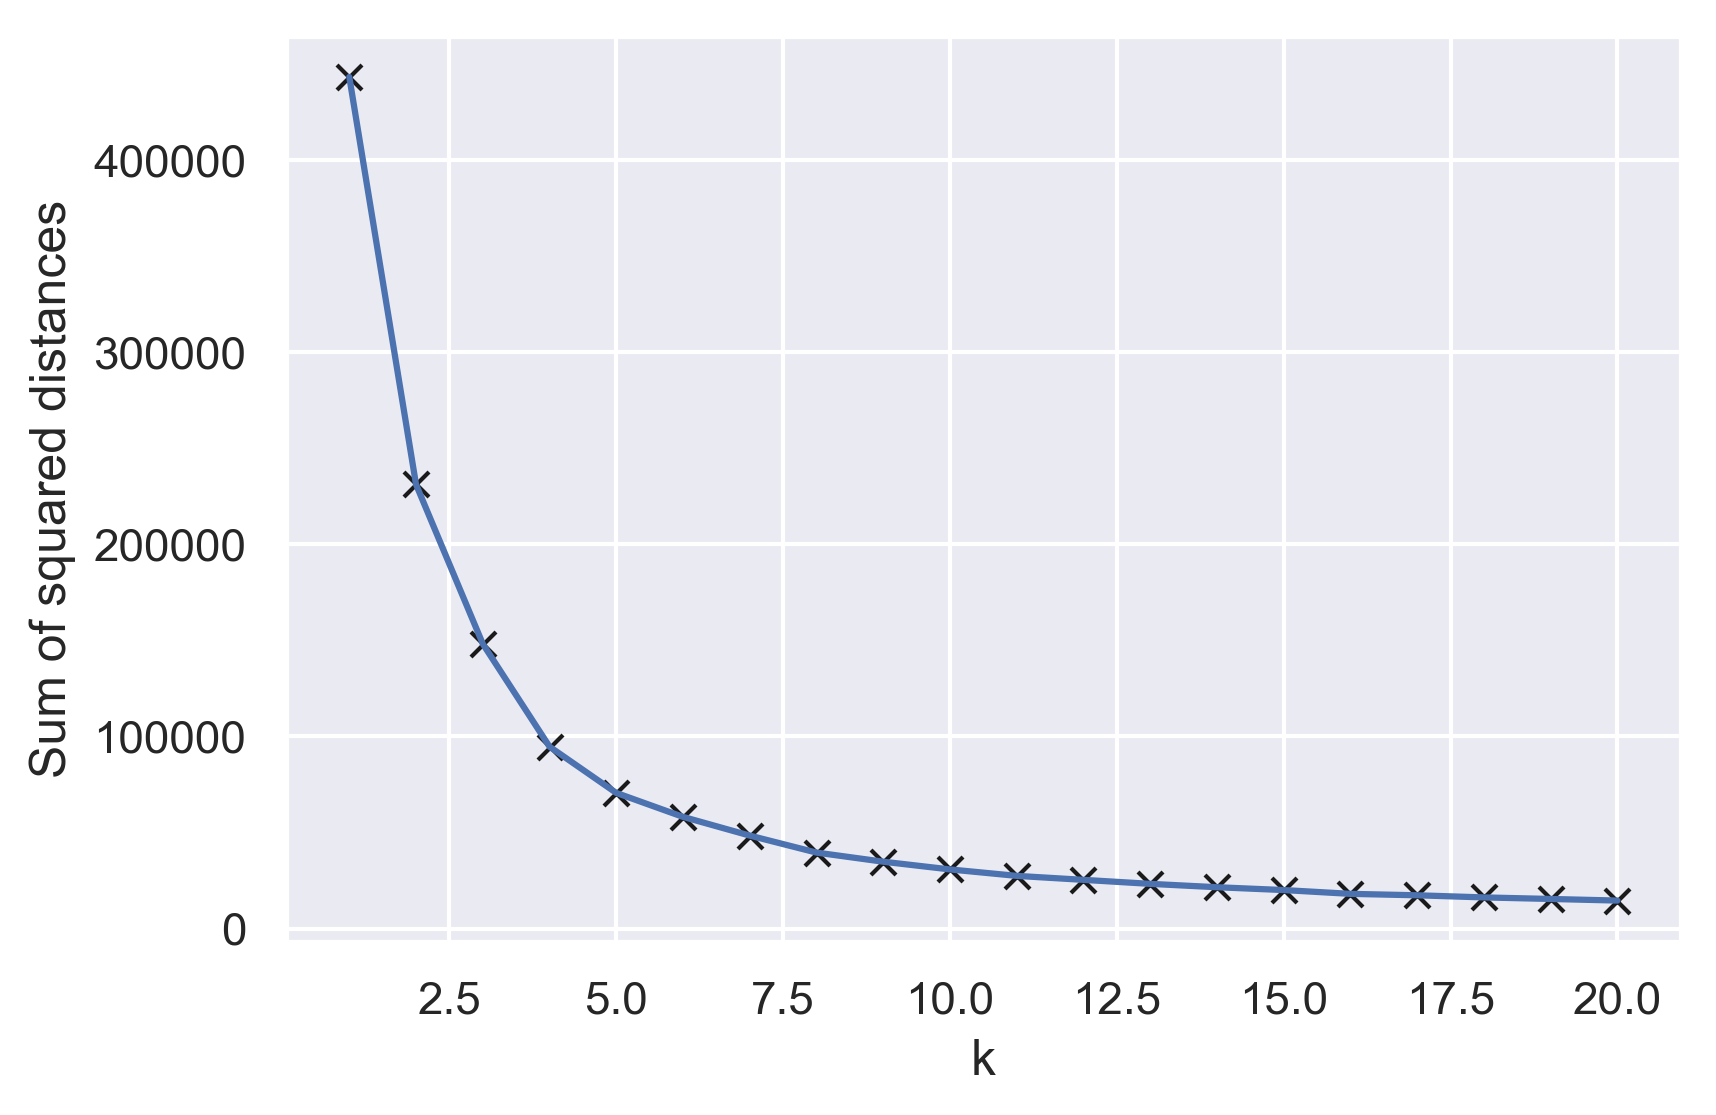

In [31]:
u.elbow_plot(pkmn_pure_sned, 20)

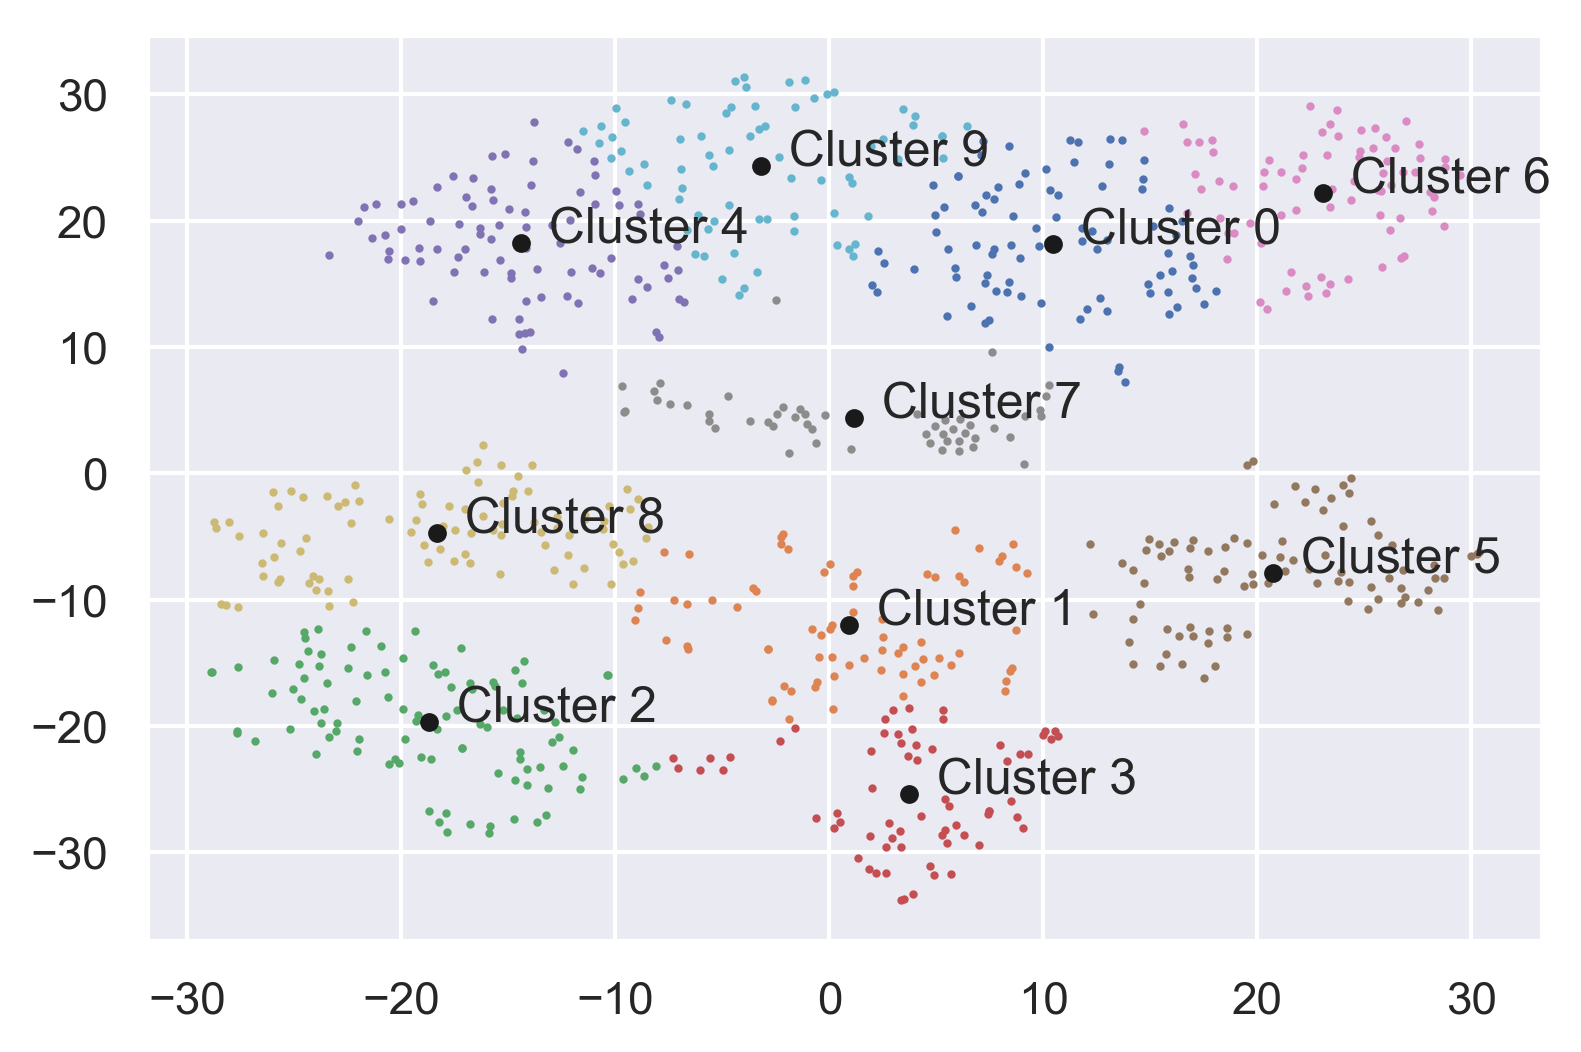

In [32]:
kmean_with_dr = cl.Kmeans(k = 10)
kmean_with_dr.fit(pkmn_pure_sned)
u.plot(kmean_with_dr)

One can see clearly the different clusters in the plot. when we plot the types of pokemon in a second plot we can also see that certain pokemon types cluster together. Normal type pokemon seem 

In [33]:
types = np.array(red_pkmn["Type 1"].drop_duplicates())
type_list = np.array(red_pkmn["Type 1"])
tsned_with_type =pd.DataFrame(pkmn_pure_sned)
tsned_with_type["Type"] = type_list

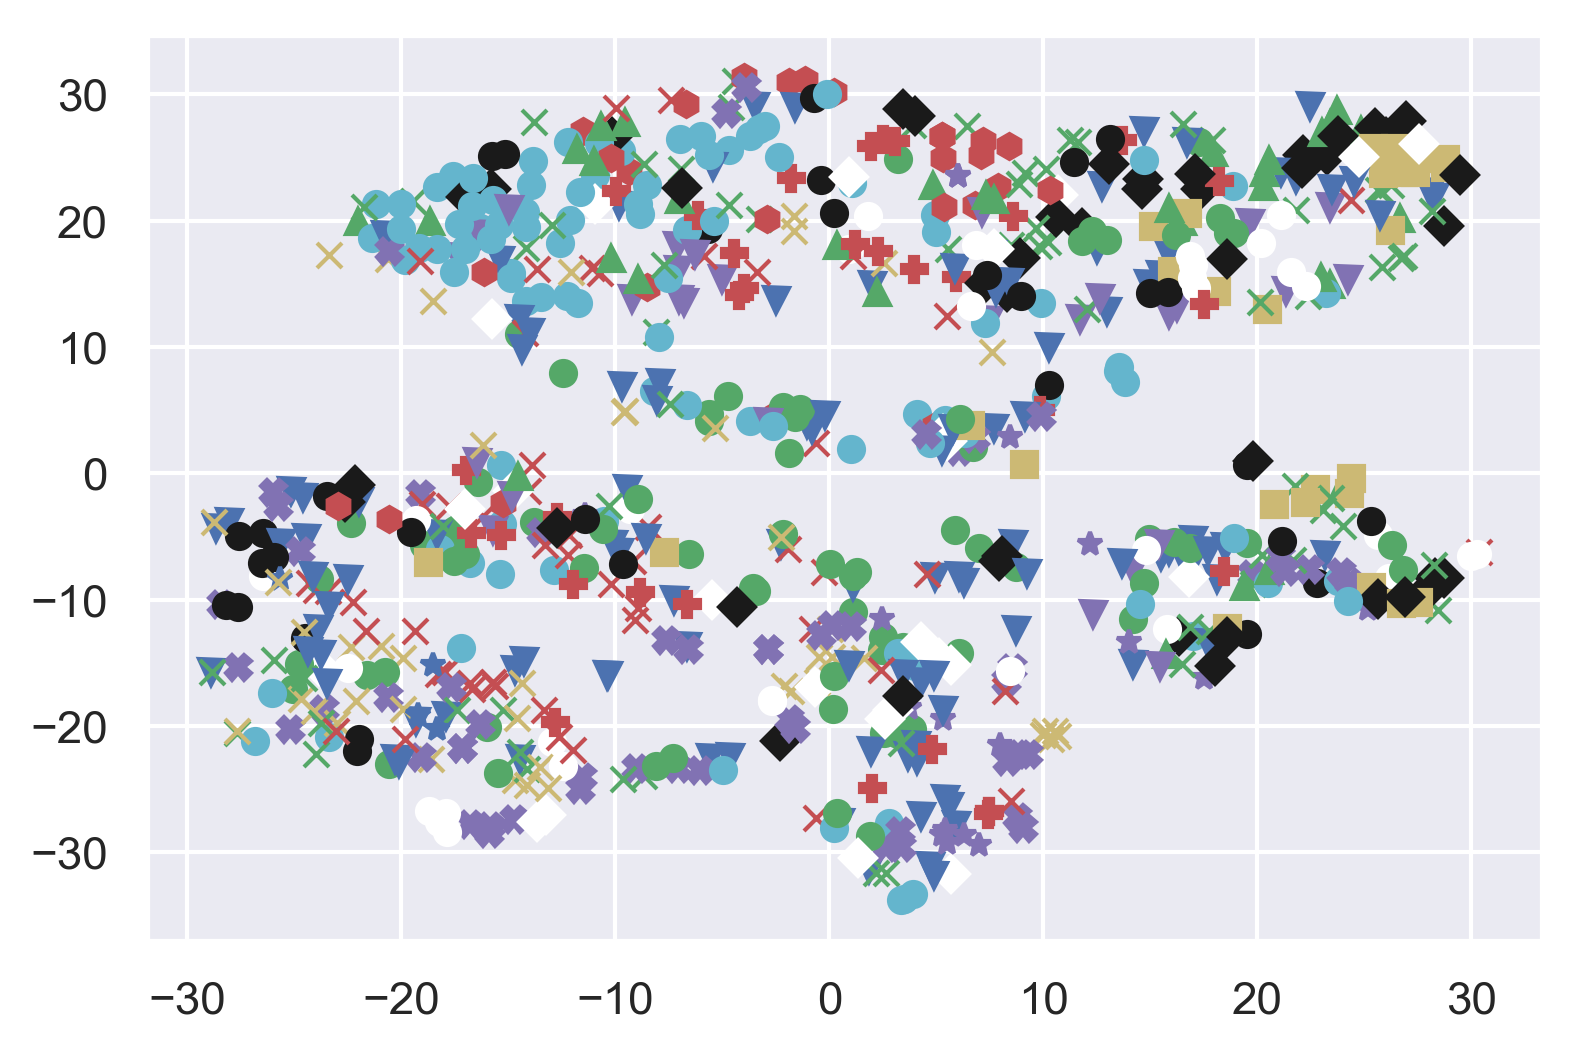

In [34]:
colors_shapes = ["go","rx","bv","gx", "co", "mv","yx","g^","m*","rh","mX","kD","wo","wD","rP","ko","ys","b*"]
dict_type_color = dict(zip(types,colors_shapes))
for i in range(tsned_with_type.shape[0]):
    color = dict_type_color[tsned_with_type.iloc[i,2]]
    plt.plot(tsned_with_type.iloc[i,0],tsned_with_type.iloc[i,1],color)
plt.show()

When we plot the types of pokemon in a second plot we can also see that certain pokemon types cluster together. Normal type pokemon seem to be all in Cluster 1 (blue dots). And also ground pokemon seem to be mainly in cluster 2 and 0. (yellow squares)

In [35]:
pkmn_red_with_dr =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red_with_dr["Cluster"] = kmean_with_dr.labels_

In [36]:
pkmn_comparer = pkmn_red_with_dr[pkmn_red_with_dr.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)).T)
pkmn_final.set_index("Cluster")

Total         HP      Attack     Defense     Sp. Atk  \
Cluster                                                              
0.0      435.629213  73.426966   98.494382   79.910112   61.651685   
1.0      468.960526  75.552632   74.776316   80.921053  106.000000   
2.0      439.554455  62.168317   62.415842   57.881188   94.762376   
3.0      440.208955  73.626866   54.567164   61.373134   83.134328   
4.0      389.188235  58.541176   76.058824   56.694118   51.341176   
5.0      423.193182  66.545455   60.170455   96.022727   59.954545   
6.0      406.986842  64.855263   84.315789  111.250000   46.842105   
7.0      409.096154  64.384615   63.173077   69.442308   62.711538   
8.0      483.000000  78.967391  102.010870   60.076087   99.597826   
9.0      443.500000  74.918919  107.486486   67.459459   53.351351   

            Sp. Def      Speed  
Cluster                         
0.0       69.235955  52.910112  
1.0       80.842105  50.868421  
2.0       68.881188  93.445545  
3.0      101.149254  66.358209  
4.0       56.223529  90.329412  
5.0       94.613636  45.886364  
6.0       52.210526  47.513158  
7.0       72.365385  77.019231  
8.0       61.532609  80.815217  
9.0       67.364865  72.918919

As we have a better grasp on the clusters now, we see that pokemon in certain cluster specialize in different stats.

In [37]:
pkmn_final.max()

Total      483.000000
HP          78.967391
Attack     107.486486
Defense    111.250000
Sp. Atk    106.000000
Sp. Def    101.149254
Speed       93.445545
Cluster      9.000000
dtype: float64

Cluster 3 contains the strongest overall pokemons with also the most HP. The strongst attackers can be found in Cluster 6 whereas the strongest defenders are in Cluster 2. The strongest special attackers are in Cluster 8 and strongest special Defenders in Cluster 4. If one wants the fastest pokemon, they can be found in Cluster 5.

**Conclusion:** Based on the Clusters one can create a nicely balanced pokemon team. Taking Pokemon from cluster 3 is always recommend because they are the strongest overall. Pokemon from Cluster 0, 1, 7 and 9 seem not to be as strong as the others

## PBMC Dataset

In [40]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import utilities as u
import pandas as pd

In [41]:
data = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")
unprocessed_data = data.process()[2]

C:\Users\Thorged\Miniconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [42]:
unprocessed_data.describe()

MIR1302-10  FAM138A   OR4F5  RP11-34P13.7  RP11-34P13.8   AL627309.1  \
count      2700.0   2700.0  2700.0        2700.0        2700.0  2700.000000   
mean          0.0      0.0     0.0           0.0           0.0     0.003333   
std           0.0      0.0     0.0           0.0           0.0     0.057649   
min           0.0      0.0     0.0           0.0           0.0     0.000000   
25%           0.0      0.0     0.0           0.0           0.0     0.000000   
50%           0.0      0.0     0.0           0.0           0.0     0.000000   
75%           0.0      0.0     0.0           0.0           0.0     0.000000   
max           0.0      0.0     0.0           0.0           0.0     1.000000   

       RP11-34P13.14  RP11-34P13.9   AP006222.2  RP4-669L17.10  ...  \
count         2700.0        2700.0  2700.000000         2700.0  ...   
mean             0.0           0.0     0.001111            0.0  ...   
std              0.0           0.0     0.033321            0.0  ...   
min              0.0           0.0     0.000000            0.0  ...   
25%              0.0           0.0     0.000000            0.0  ...   
50%              0.0           0.0     0.000000            0.0  ...   
75%              0.0           0.0     0.000000            0.0  ...   
max              0.0           0.0     1.000000            0.0  ...   

       KIR3DL2-1  AL590523.1  CT476828.1      PNRC2-1     SRSF10-1  \
count     2700.0      2700.0      2700.0  2700.000000  2700.000000   
mean         0.0         0.0         0.0     0.042963     0.025926   
std          0.0         0.0         0.0     0.213491     0.161258   
min          0.0         0.0         0.0     0.000000     0.000000   
25%          0.0         0.0         0.0     0.000000     0.000000   
50%          0.0         0.0         0.0     0.000000     0.000000   
75%          0.0         0.0         0.0     0.000000     0.000000   
max          0.0         0.0         0.0     2.000000     2.000000   

       AC145205.1   BAGE5  CU459201.1  AC002321.2  AC002321.1  
count      2700.0  2700.0      2700.0      2700.0      2700.0  
mean          0.0     0.0         0.0         0.0         0.0  
std           0.0     0.0         0.0         0.0         0.0  
min           0.0     0.0         0.0         0.0         0.0  
25%           0.0     0.0         0.0         0.0         0.0  
50%           0.0     0.0         0.0         0.0         0.0  
75%           0.0     0.0         0.0         0.0         0.0  
max           0.0     0.0         0.0         0.0         0.0  

[8 rows x 32738 columns]

In [43]:
unprocessed_data.shape

(2700, 32738)

As the PBMC dataset is quite big and as there were a lot of genes in there with only zeros, we had to process the dataset. 

In [44]:
processed_data_umap = data.process()[0]
processed_data_tsne = data.process(method="tsne")[0]

C:\Users\Thorged\Miniconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Our processing algorithm includes quite a few steps:

1) Cells were deleted, which had a fraction of counts of mitochondrial genes versus all genes higher 5%. We did that because: High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

2) Morover genes were deleted, which were only expressed in less than 3 cells. -> After all that data has been deleted, the shape of the dataset was: **2643 cells × 13006 genes**

3) Next the data was normalised. 

4) With the normalised data, Principle Component Analysis was performed. 

5) Lastly either T-SNE or Umap was performed. Umap was setted as a standard. If you want to perform T-SNE, method="tsne" has to be oppted in. 

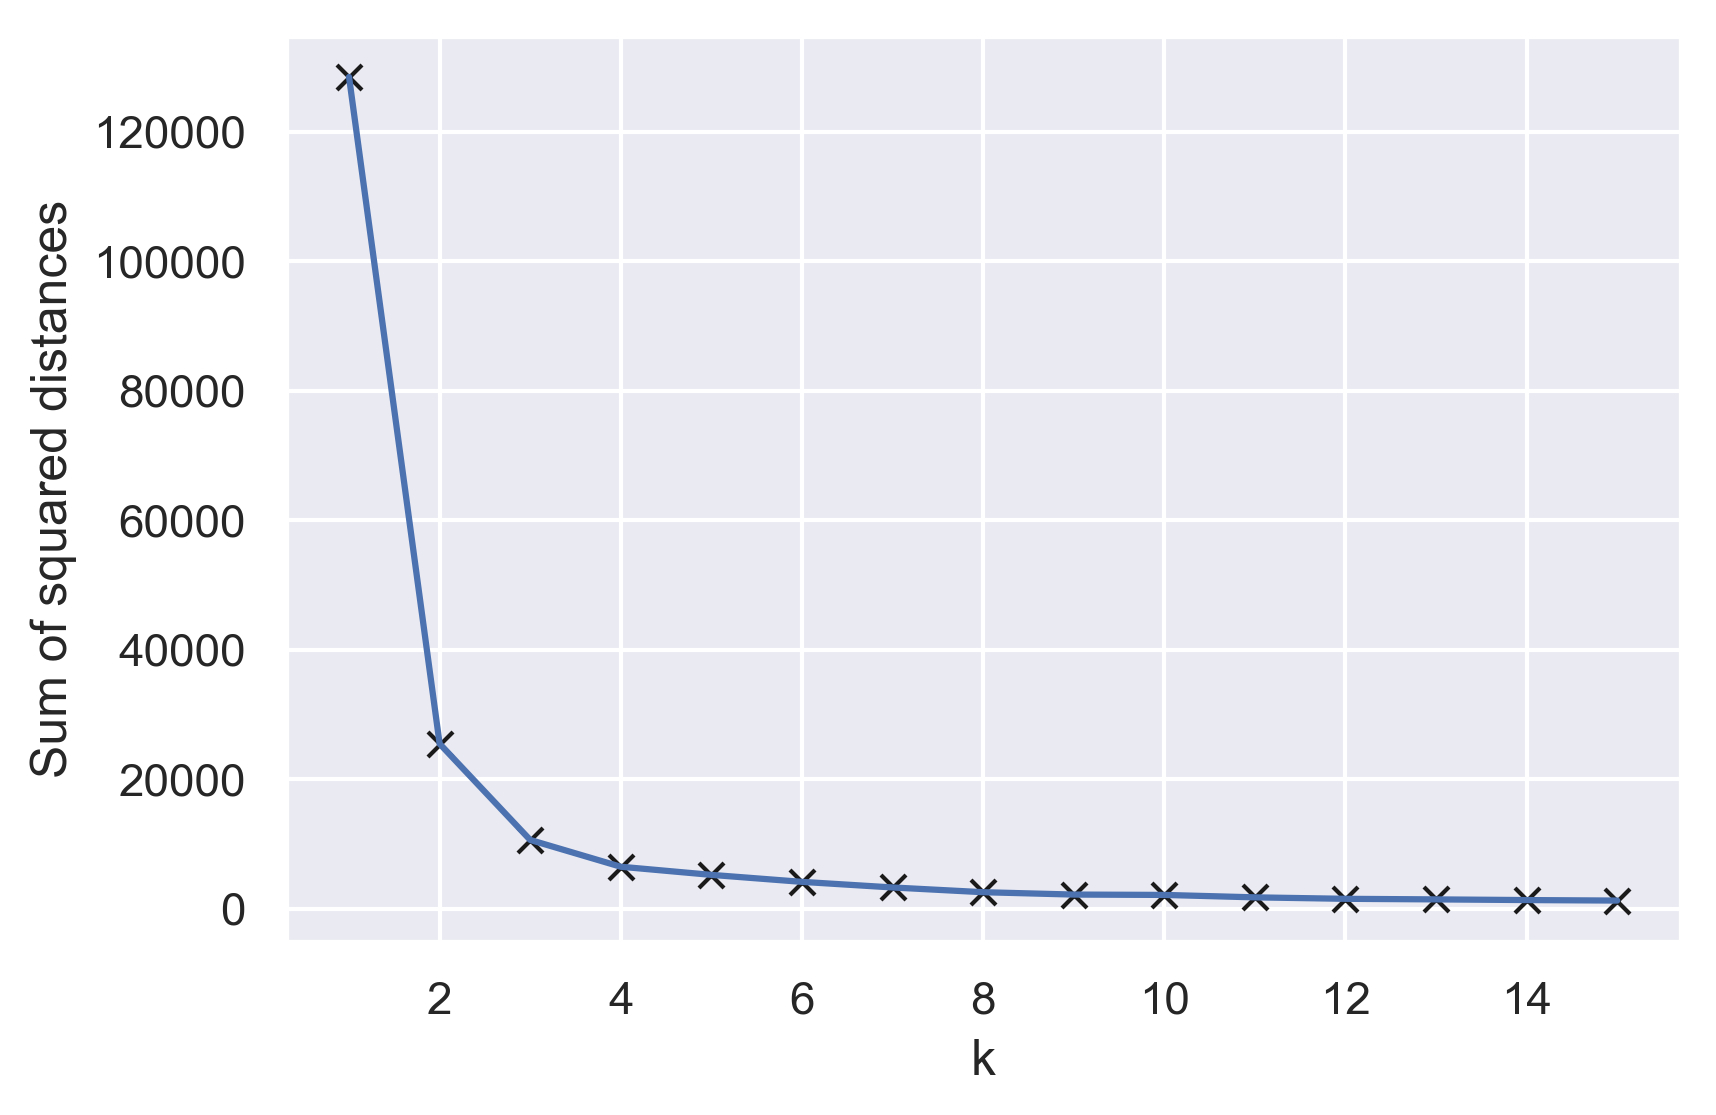

In [45]:
u.elbow_plot(processed_data_umap, max_k=15)

The elbow blot shows that the optimal amount of clusters is 2. Though the amount of 9 clusters delivered better results. 

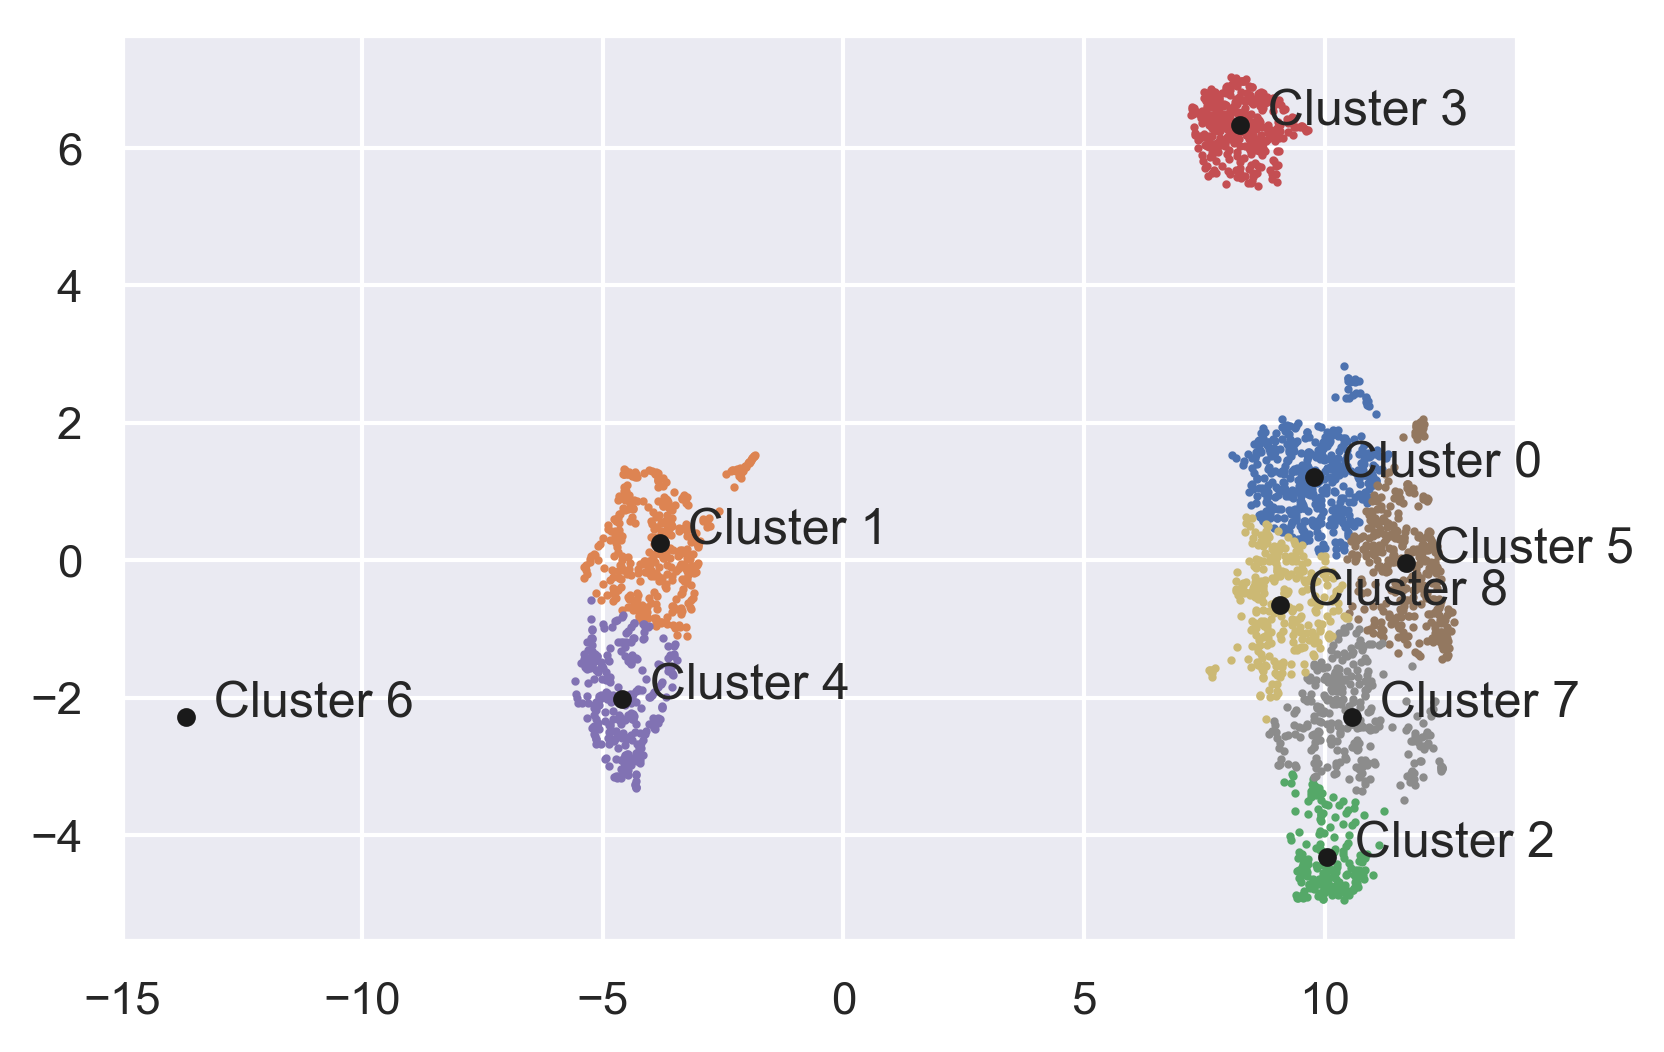

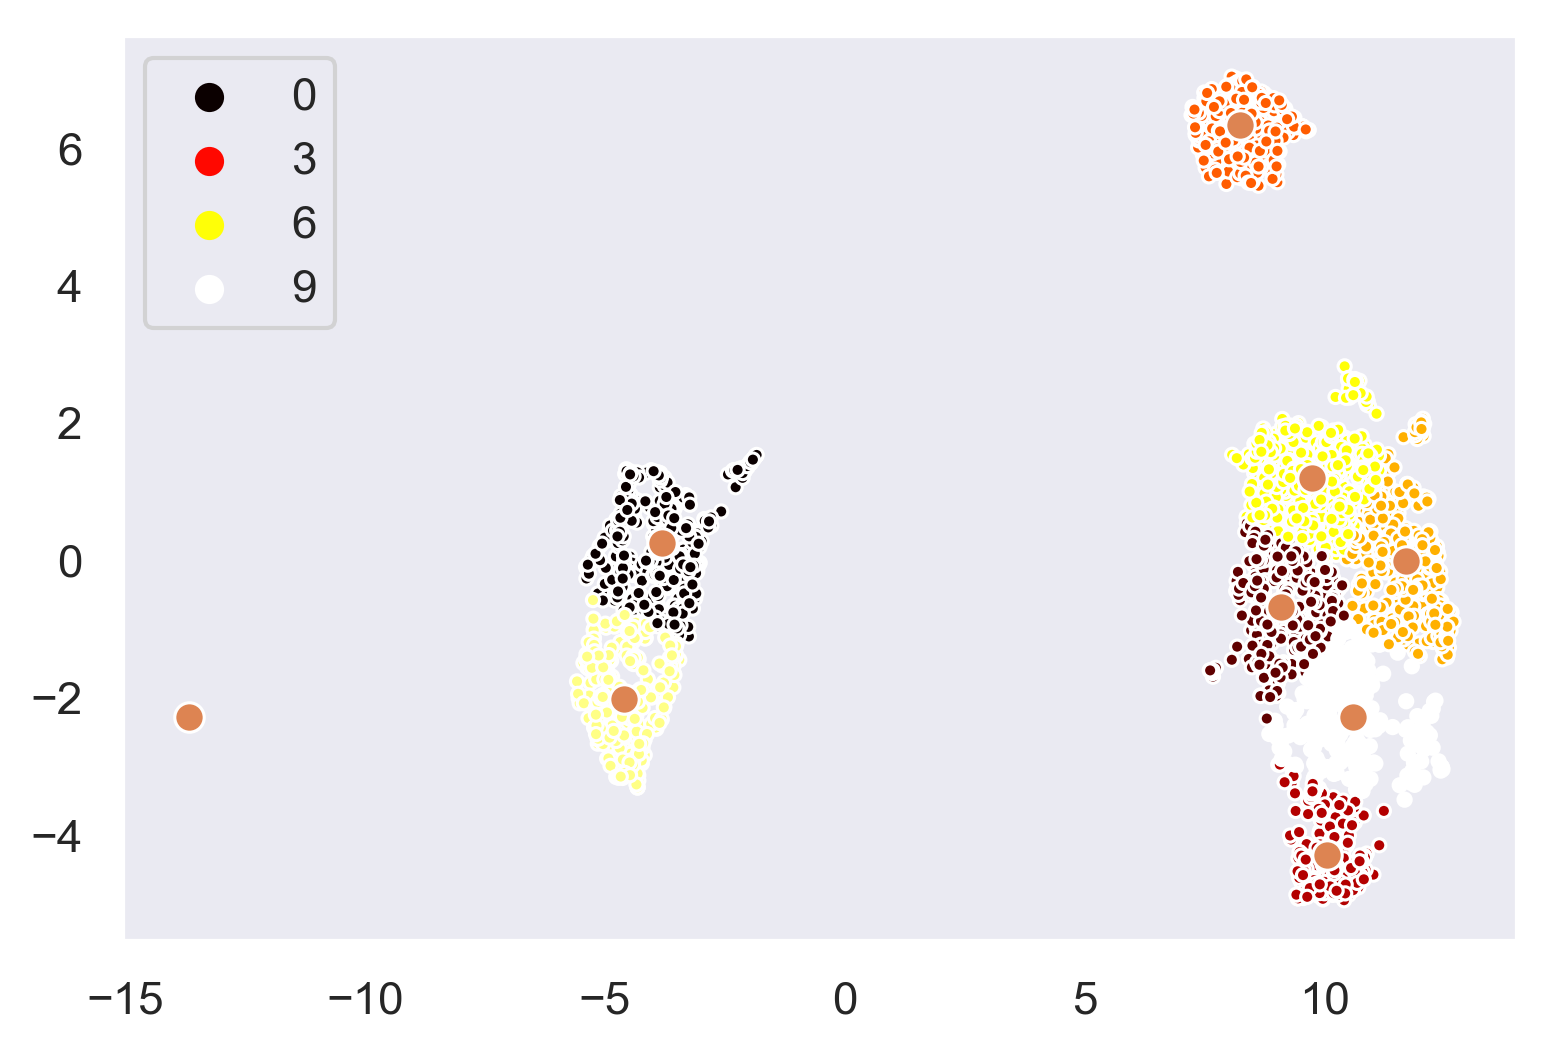

In [46]:
km_umap = cl.Kmeans(k=9).fit(processed_data_umap)
u.plot(km_umap)
u.plot_seaborn(processed_data_umap, ks=9, methods="++")

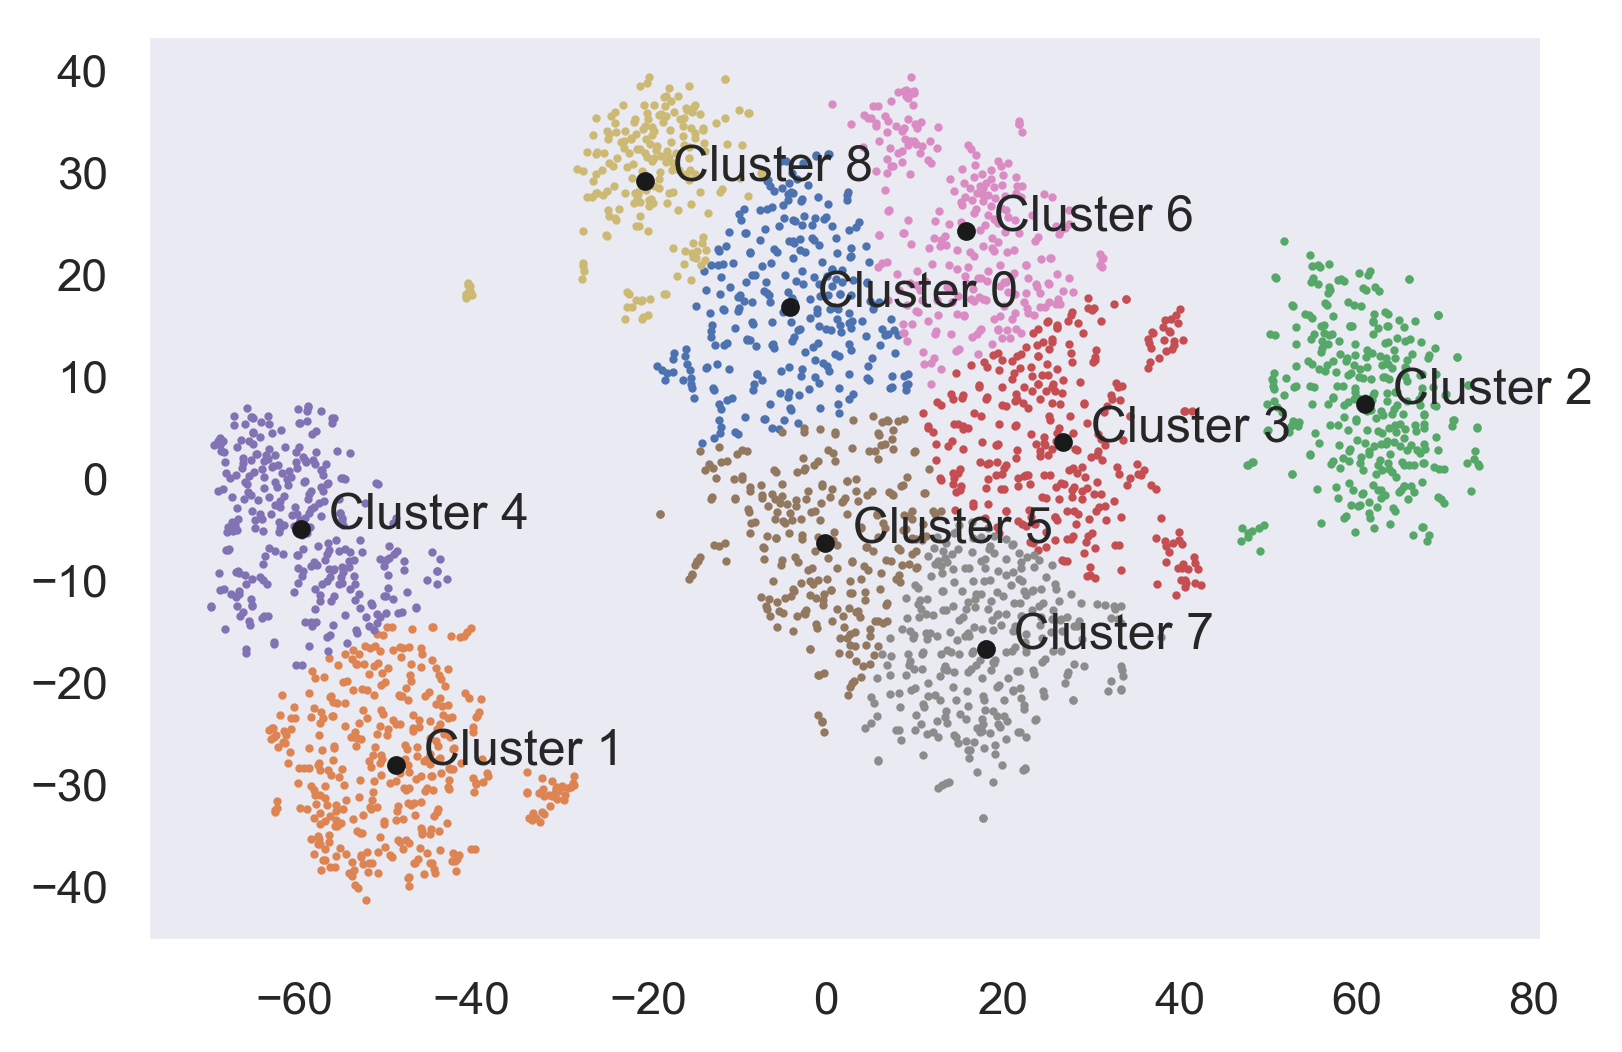

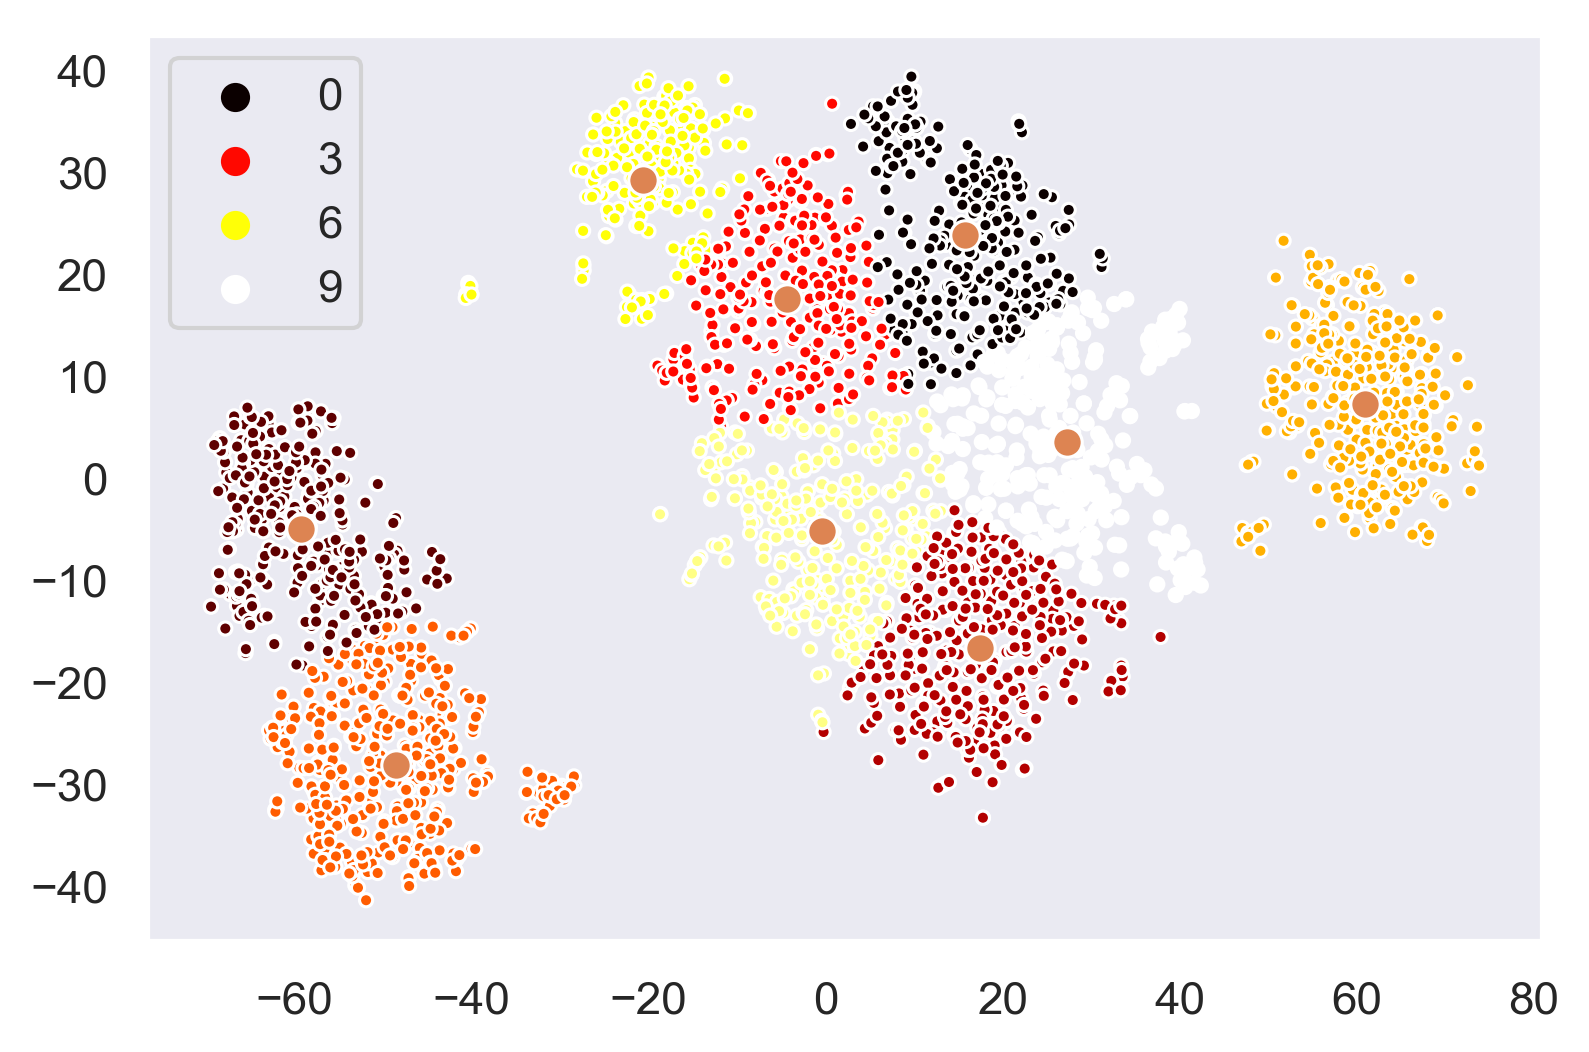

In [47]:
km_tsne = cl.Kmeans(k=9).fit(processed_data_tsne)
u.plot(km_tsne)
u.plot_seaborn(processed_data_tsne, ks=9, methods="++")

We performed umap and tsne. But as umap delivered clearer clusters, we only analysed the data with the clustered umap. 

In [48]:
minimised_data = data.process()[1]

C:\Users\Thorged\Miniconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [49]:
minimised_data.shape

(2643, 13006)

In [ ]:
minimised_data["Cluster"] = km_umap.labels_

Here we used the reduced (as explained ealier) data was which was not normalised. To all the cells we display its assigned cluster. 

In [ ]:
comparer_data = minimised_data[minimised_data.Cluster ==0].mean(axis = 0)
final_comparer = pd.DataFrame(comparer_data).T
for i in range(8):
    minimised_data[minimised_data.Cluster == i+1].mean(axis = 0)
    final_comparer = final_comparer.append(pd.DataFrame(minimised_data[minimised_data.Cluster == i+1].mean(axis = 0)).T)
final_comparer = final_comparer.set_index("Cluster")

In [ ]:
gene_names = final_comparer.T.index

In [ ]:
final_comparer

AL627309.1  RP11-206L10.2  LINC00115     NOC2L    KLHL17   PLEKHN1  \
Cluster                                                                       
0.0        0.004301       0.000000   0.004301  0.116129  0.002151  0.002151   
1.0        0.012788       0.005115   0.007673  0.076726  0.002558  0.005115   
2.0        0.005051       0.000000   0.010101  0.146465  0.005051  0.005051   
3.0        0.000000       0.006024   0.009036  0.108434  0.000000  0.000000   
4.0        0.003571       0.000000   0.010714  0.139286  0.007143  0.000000   
5.0        0.000000       0.002740   0.005479  0.104110  0.005479  0.000000   
6.0        0.000000       0.000000   0.000000  0.000000  0.000000  0.000000   
7.0        0.000000       0.000000   0.009934  0.089404  0.003311  0.003311   
8.0        0.000000       0.000000   0.000000  0.110368  0.000000  0.006689   

             HES4  RP11-54O7.11     ISG15      AGRN  ...   MT-ND4L    MT-ND4  \
Cluster                                              ...                       
0.0      0.010753      0.000000  0.716129  0.000000  ...  0.174194  5.546237   
1.0      0.069054      0.002558  2.265985  0.015345  ...  0.171355  4.769821   
2.0      0.005051      0.000000  0.909091  0.000000  ...  0.141414  4.116162   
3.0      0.012048      0.006024  0.484940  0.000000  ...  0.144578  4.608434   
4.0      0.617857      0.003571  3.182143  0.003571  ...  0.175000  6.110714   
5.0      0.002740      0.000000  0.402740  0.000000  ...  0.178082  4.824658   
6.0      0.000000      0.000000  0.090909  0.000000  ...  0.090909  0.818182   
7.0      0.000000      0.000000  0.850993  0.003311  ...  0.145695  4.476821   
8.0      0.003344      0.000000  1.173913  0.000000  ...  0.183946  5.618729   

           MT-ND5    MT-ND6    MT-CYB  AC145212.1  AL592183.1  AL354822.1  \
Cluster                                                                     
0.0      0.905376  0.144086  4.658065    0.002151    0.154839    0.002151   
1.0      1.076726  0.143223  4.501279    0.007673    0.112532    0.005115   
2.0      0.651515  0.111111  3.181818    0.005051    0.121212    0.000000   
3.0      0.554217  0.060241  3.457831    0.006024    0.174699    0.006024   
4.0      1.357143  0.110714  4.942857    0.021429    0.110714    0.007143   
5.0      0.619178  0.082192  4.230137    0.005479    0.147945    0.002740   
6.0      0.272727  0.000000  1.727273    0.090909    0.000000    0.000000   
7.0      0.748344  0.059603  4.139073    0.000000    0.135762    0.000000   
8.0      1.003344  0.173913  4.903010    0.006689    0.127090    0.000000   

          PNRC2-1  SRSF10-1  
Cluster                      
0.0      0.045161  0.045161  
1.0      0.033248  0.007673  
2.0      0.010101  0.030303  
3.0      0.027108  0.024096  
4.0      0.039286  0.035714  
5.0      0.052055  0.019178  
6.0      0.000000  0.000000  
7.0      0.066225  0.013245  
8.0      0.066890  0.036789  

[9 rows x 13006 columns]

This shows for every gene how much it was expressed on average in each cluster. 

In [ ]:
for i in range(9):
    print(str(final_comparer[final_comparer.index == i].T.nlargest(n=10,columns=i))+ "\n")

Cluster        0.0
MALAT1   65.206452
RPL10    47.277419
B2M      44.668817
RPL13    43.501075
RPL13A   42.406452
TMSB4X   41.369892
RPS6     37.664516
RPS2     34.161290
RPS18    32.286022
RPS3     30.956989

Cluster        1.0
FTL      70.511509
TMSB4X   57.352941
LYZ      55.373402
FTH1     47.457801
S100A9   35.544757
B2M      33.094629
RPL10    32.132992
MALAT1   26.613811
ACTB     26.521739
RPL13    25.069054

Cluster        2.0
B2M      72.934343
MALAT1   62.338384
TMSB4X   39.929293
NKG7     21.752525
ACTB     20.737374
GNLY     17.732323
RPL10    17.308081
HLA-C    15.777778
RPL13A   14.863636
RPL13    13.095960

Cluster        3.0
MALAT1   51.045181
RPL13A   29.930723
RPL10    28.292169
CD74     27.611446
B2M      27.355422
RPL13    26.656627
RPS2     21.816265
TMSB4X   21.581325
RPS6     20.451807
RPS18    19.939759

Cluster         4.0
FTL      120.542857
FTH1      92.739286
TMSB4X    87.846429
B2M       52.885714
MALAT1    41.585714
ACTB      39.021429
RPL10     32.017857


Next we show the top 10 of genes expressed in each cluster. As you can see, some genes were expressed in each cluster mostly. Genes like MALAT1, B2M, RPL10 and TMSB4X. 

MALAT1 - Metastasis Associated Lung Adenocarcinoma Transcript 1 is an RNA Gene, and is affiliated with the non coding RNA class. 

B2M - Beta-2-Microglobulin encodes a serum protein found in association with the MHCI heavy chain on the surface of nearly all nucleated cells.

RPL10 - Ribosomal Protein L10 encodes a ribosomal protein that is a component of the 60S ribosome subunit.

TMSB4X - Thymosin Beta 4 X-Linked encodes an actin sequestering protein which plays a role in regulation of actin polymerization. The protein is also involved in cell proliferation, migration, and differentiation. This gene escapes X inactivation and has a homolog on chromosome Y.

In [ ]:
final_comparer[["IL7R", "CD14", "LYZ", "MS4A1", "CD8A", "GNLY", "NKG7", "FCGR3A", "MS4A7", "FCER1A", "CST3", "PPBP"]]

IL7R      CD14        LYZ     MS4A1      CD8A       GNLY  \
Cluster                                                                 
0.0      1.916129  0.021505   0.795699  0.083871  0.197849   0.167742   
1.0      0.161125  1.800512  55.373402  0.053708  0.023018   0.196931   
2.0      0.237374  0.005051   0.595960  0.070707  0.323232  17.732323   
3.0      0.117470  0.003012   0.614458  2.093373  0.021084   0.081325   
4.0      0.142857  0.482143  16.021429  0.082143  0.025000   0.132143   
5.0      1.306849  0.010959   0.605479  0.063014  0.186301   0.147945   
6.0      0.090909  0.000000   0.545455  0.000000  0.000000   0.000000   
7.0      1.162252  0.026490   0.546358  0.049669  0.602649   0.715232   
8.0      1.782609  0.010033   0.842809  0.220736  0.204013   0.785953   

              NKG7    FCGR3A     MS4A7    FCER1A       CST3       PPBP  
Cluster                                                                 
0.0       0.326882  0.055914  0.021505  0.032258   0.253763   0.017204  
1.0       0.304348  0.112532  0.324808  0.680307  16.554987   0.066496  
2.0      21.752525  2.136364  0.010101  0.015152   0.267677   0.000000  
3.0       0.093373  0.036145  0.060241  0.009036   0.259036   0.015060  
4.0       0.457143  4.914286  1.907143  0.003571  17.235714   0.289286  
5.0       0.230137  0.041096  0.019178  0.008219   0.169863   0.010959  
6.0       0.000000  0.000000  0.000000  0.000000   1.636364  44.181818  
7.0       5.947020  0.231788  0.009934  0.013245   0.192053   0.056291  
8.0       1.341137  0.180602  0.056856  0.006689   0.364548   0.100334

IL7R (Interleukin 7 Receptor) - The protein encoded by this gene is a receptor for interleukin 7 (IL7). Interleukin-7 receptor is expressed on various cell types, including **naive and memory T cells** and many others. -> mostly in Cluster **8,3**,7,5

CD14 (CD14 Molecule) - The protein encoded by this gene is a surface antigen that is preferentially expressed on **monocytes/macrophages**. It cooperates with other proteins to mediate the innate immune response to bacterial lipopolysaccharide. -> Cluster **4**

LYZ (Lysozyme) - Lysozymes have primarily a bacteriolytic function; those in tissues and body fluids are associated with the **monocyte-macrophage** system and enhance the activity of immunoagents. -> Cluster **4**, 1

MS4A1 (Membrane Spanning 4-Domains A1) - B-lymphocyte-specific membrane protein that plays a role in the regulation of cellular calcium influx necessary for the development, differentiation, and activation of **B-lymphocytes** -> Cluster **2**

CD8A (CD8a Molecule) - The CD8 antigen is a cell surface glycoprotein found on most **cytotoxic T lymphocytes** that mediates efficient cell-cell interactions within the immune system. -> Cluster **7, 0**

GNLY (Granulysin) - This antimicrobial protein that kills intracellular pathogens is present in cytotoxic granules of **cytotoxic T lymphocytes and natural killer cells** -> Cluster 0

NKG7 (**Natural Killer Cell** Granule Protein 7) -> Cluster **0**

FCGR3A (Fc Fragment Of IgG Receptor IIIa) - The FCGR3A gene encodes for the receptor important for antibody-dependent natural killer cell-mediated cytotoxicity. FcγRIIIA is expressed on **NK cells, monocytes, and macrophages**. -> Cluster **1**

MS4A7 (Membrane Spanning 4-Domains A7) - This gene encodes a member of the membrane-spanning 4A gene family, members of which are characterized by common structural features and similar intron/exon splice boundaries and display unique expression patterns in **hematopoietic cells and nonlymphoid tissues**. -> Cluster **1**

FCER1A (Fc Fragment Of IgE Receptor Ia) - Binds to the Fc region of immunoglobulins epsilon. High affinity receptor. Responsible for initiating the allergic response. Binding of allergen to receptor-bound IgE leads to cell activation and the release of mediators (such as histamine) responsible for the manifestations of allergy. The same receptor also induces the secretion of important lymphokines. -> Cluster **4**

CST3 (Cystatin C) - As an inhibitor of cysteine proteinases, this protein is thought to serve an important physiological role as a local regulator of this enzyme activity. -> Cluster **1,4**

PPBP (Pro-Platelet Basic Protein) - The protein encoded by this gene is a platelet-derived growth factor that belongs to the CXC chemokine family. This growth factor is a potent chemoattractant and activator of neutrophils. -> Cluster **6**

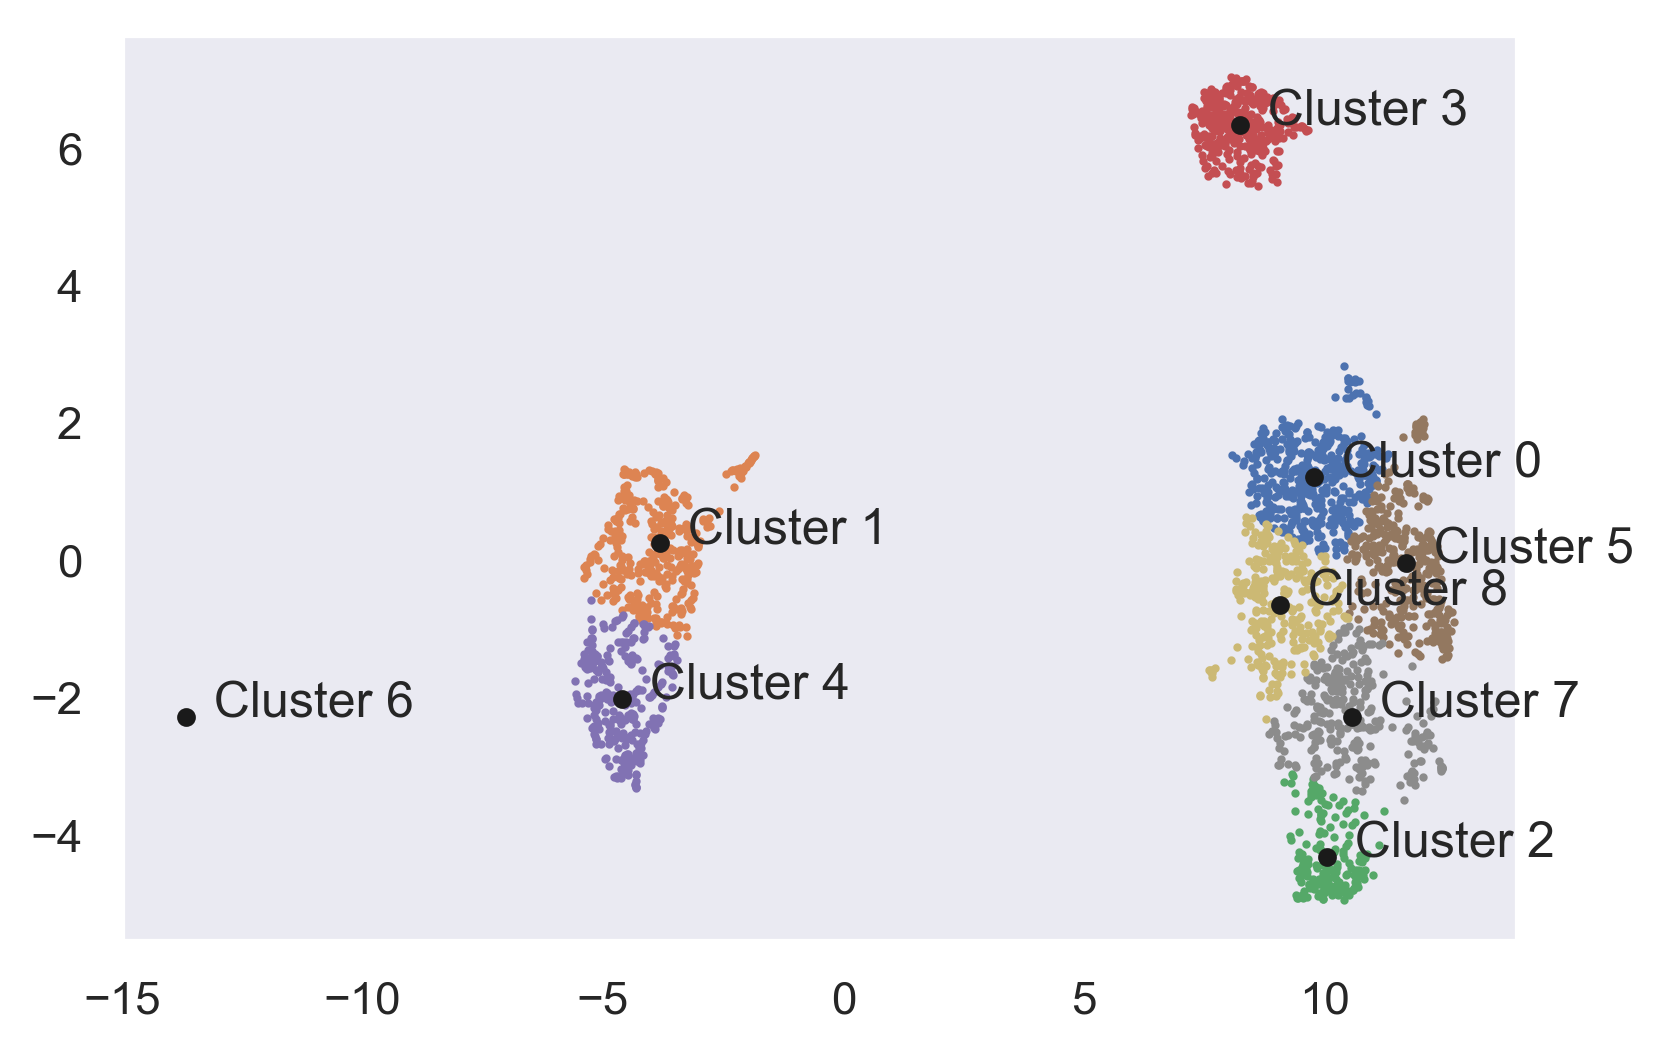

In [ ]:
u.plot(km_umap)

In [ ]:
final_comparer_red = final_comparer.copy()
for i in range (9):
    final_comparer_red.iloc[[i]] = final_comparer.iloc[[i]]-final_comparer.mean()

In [ ]:
final_comparer_red

AL627309.1  RP11-206L10.2  LINC00115     NOC2L    KLHL17   PLEKHN1  \
Cluster                                                                       
0.0        0.001444      -0.001542  -0.002059  0.017138 -0.000704 -0.000329   
1.0        0.009931       0.003573   0.001313 -0.022265 -0.000297  0.002635   
2.0        0.002194      -0.001542   0.003741  0.047473  0.002196  0.002571   
3.0       -0.002857       0.004482   0.002676  0.009443 -0.002855 -0.002480   
4.0        0.000715      -0.001542   0.004354  0.040295  0.004288 -0.002480   
5.0       -0.002857       0.001198  -0.000880  0.005118  0.002625 -0.002480   
6.0       -0.002857      -0.001542  -0.006360 -0.098991 -0.002855 -0.002480   
7.0       -0.002857      -0.001542   0.003574 -0.009587  0.000457  0.000832   
8.0       -0.002857      -0.001542  -0.006360  0.011377 -0.002855  0.004209   

             HES4  RP11-54O7.11     ISG15      AGRN  ...   MT-ND4L    MT-ND4  \
Cluster                                              ...                       
0.0     -0.069341     -0.001350 -0.403520 -0.002470  ...  0.018063  1.002930   
1.0     -0.011040      0.001207  1.146335  0.012875  ...  0.015225  0.226515   
2.0     -0.075044     -0.001350 -0.210558 -0.002470  ... -0.014716 -0.427145   
3.0     -0.068046      0.004674 -0.634709 -0.002470  ... -0.011552  0.065127   
4.0      0.537763      0.002221  2.062494  0.001102  ...  0.018869  1.567408   
5.0     -0.077354     -0.001350 -0.716909 -0.002470  ...  0.021952  0.281351   
6.0     -0.080094     -0.001350 -1.028740 -0.002470  ... -0.065221 -3.725124   
7.0     -0.080094     -0.001350 -0.268656  0.000841  ... -0.010435 -0.066485   
8.0     -0.076750     -0.001350  0.054264 -0.002470  ...  0.027816  1.075423   

           MT-ND5    MT-ND6    MT-CYB  AC145212.1  AL592183.1  AL354822.1  \
Cluster                                                                     
0.0      0.106646  0.045744  0.686804   -0.014005    0.034306   -0.000424   
1.0      0.277996  0.044880  0.530018   -0.008483   -0.008001    0.002540   
2.0     -0.147215  0.012769 -0.789442   -0.011105    0.000680   -0.002575   
3.0     -0.244513 -0.038102 -0.513429   -0.010132    0.054166    0.003449   
4.0      0.558413  0.012372  0.971597    0.005273   -0.009818    0.004568   
5.0     -0.179552 -0.016151  0.258877   -0.010677    0.027413    0.000165   
6.0     -0.526003 -0.098342 -2.243988    0.074753   -0.120533   -0.002575   
7.0     -0.050386 -0.038740  0.167813   -0.016156    0.015229   -0.002575   
8.0      0.204614  0.075571  0.931750   -0.009467    0.006558   -0.002575   

          PNRC2-1  SRSF10-1  
Cluster                      
0.0      0.007375  0.021588  
1.0     -0.004538 -0.015901  
2.0     -0.027685  0.006730  
3.0     -0.010678  0.000523  
4.0      0.001500  0.012141  
5.0      0.014269 -0.004395  
6.0     -0.037786 -0.023573  
7.0      0.028439 -0.010328  
8.0      0.029104  0.013216  

[9 rows x 13006 columns]

In [ ]:
for i in range(9):
    print(str(final_comparer_red[final_comparer_red.index == i].T.nlargest(n=10,columns=i))+ "\n")

Cluster        0.0
RPL13    19.200067
RPL10    19.042340
RPS6     17.893689
RPL13A   17.861791
RPS18    14.748719
RPS3     14.729148
RPL3     14.085555
RPS2     13.455802
RPS12    13.441736
RPL32    12.042390

Cluster        1.0
LYZ      46.935507
FTL      44.411837
S100A9   30.665667
FTH1     26.635152
S100A8   15.888975
CST3     12.451209
HLA-DRA   9.350063
CD74      9.080292
S100A4    8.845586
TYROBP    8.829456

Cluster        2.0
B2M      27.550518
NKG7     18.368907
GNLY     15.514591
MALAT1    8.602954
HLA-C     7.019775
GZMB      6.912317
HLA-A     5.550261
CCL5      4.727206
PRF1      3.636274
FGFBP2    3.538469

Cluster         3.0
CD74      19.919360
HLA-DRA   12.686341
RPL13A     5.386062
HLA-DPB1   4.689453
RPL18A     4.343268
CD79A      3.668267
CD37       3.480096
HLA-DPA1   3.190306
HLA-DRB1   3.186442
RPS23      2.993054

Cluster        4.0
FTL      94.443186
FTH1     71.916638
TMSB4X   38.518131
ACTB     18.681780
S100A4   15.253250
CST3     13.131936
MT-CO1   12.1995

## Creating GIFs

To show how kmeans actually clusters we created a gif that shows the clustering over a few iterations. the *Gifcreator* is a utility function based on our wwdk_++ kmeans implementation. It is expanded by a script that saves a picture of the current state each run and stitches them together at the end.

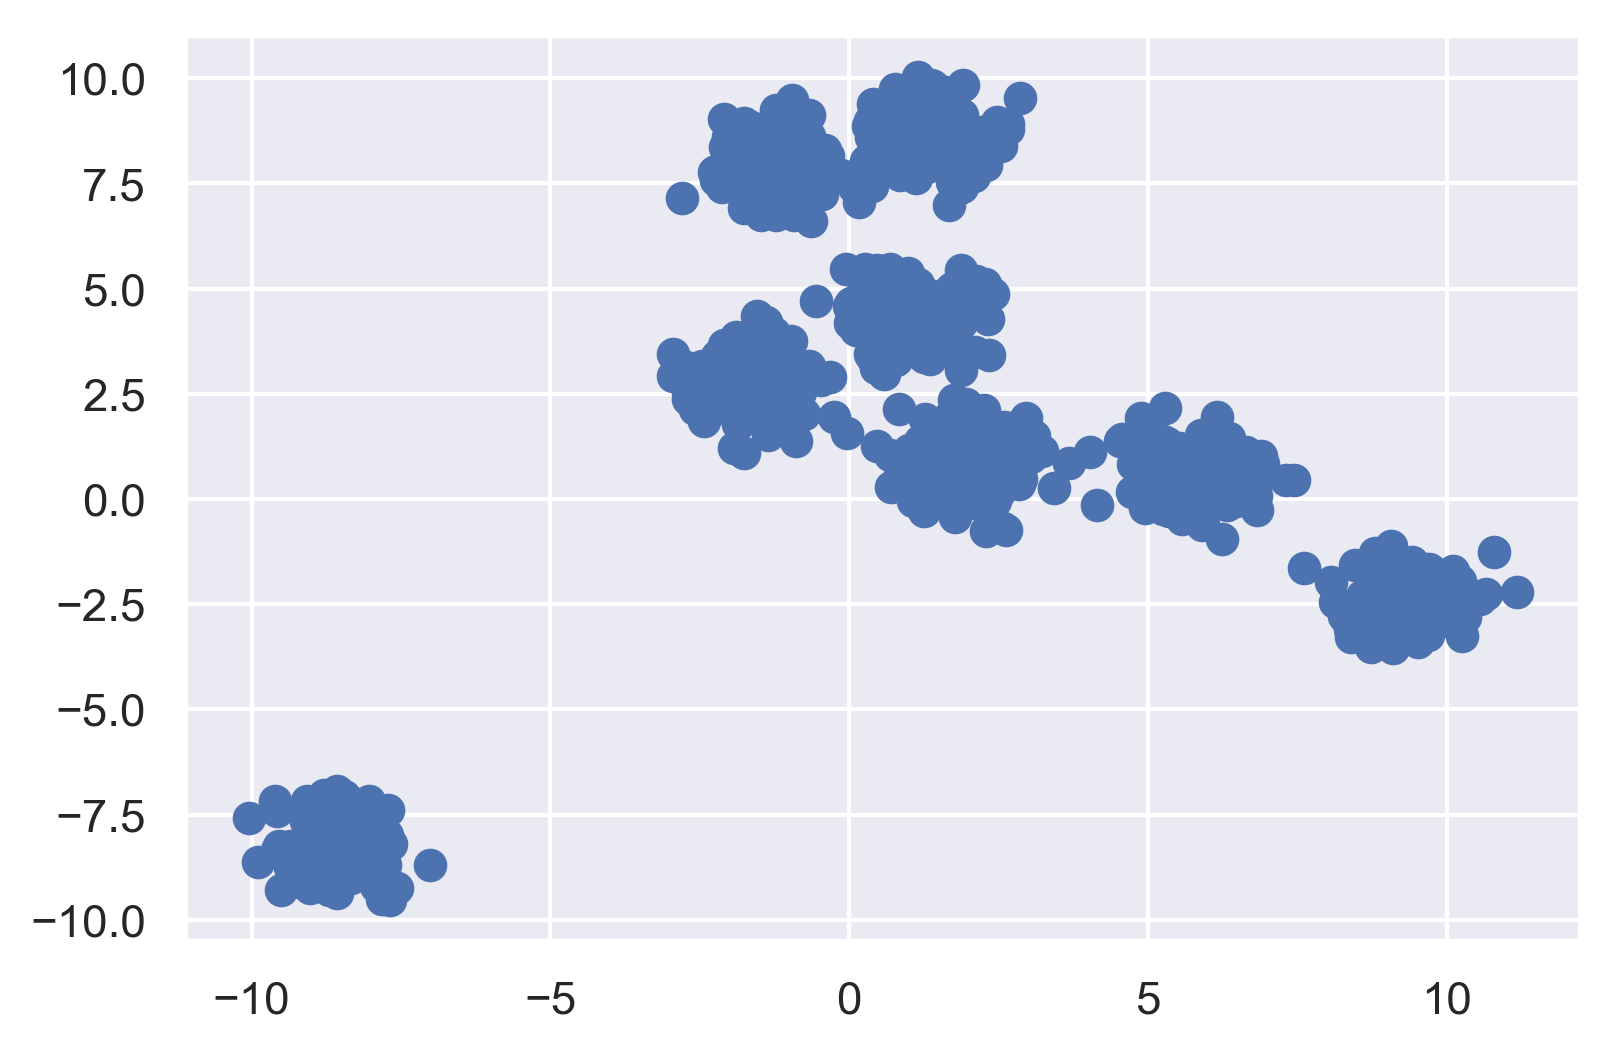

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#generate data
X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
gifs = u.Gifcreator()
gifs.create_gif(X)

Init: 0
Init: 1
Init: 2
Init: 3
Init: 4
Init: 5
Init: 6
Init: 7
Init: 8
Init: 9


![SegmentLocal](./kmeans.gif "segment")